# Goal

This notebook checks model generalization performance on other dsets.

**With gratitude to**:
- https://github.com/mattiaspaul/OBELISK
-  https://github.com/kbressem/faimed3d/blob/main/examples/3d_segmentation.md

In [1]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

import seaborn as sns

cuda:0


In [2]:
%load_ext autoreload
%autoreload 2

# INFERENCE DATALOADER PARAMS
num_workers = 1

# ITEMS

from pathlib import Path
from helpers.items_constants import *

import SimpleITK as sitk
import pandas as pd

dsets_src    = f"{data_src}/PitMRdata"

# key,val = dset_name, path to top level dir
dset_dict = {
    "ABIDE"                  : f"{dsets_src}/ABIDE",
    "ABVIB"                  : f"{dsets_src}/ABVIB/ABVIB",
    "ADNI1_Complete_1Yr_1.5T": f"{dsets_src}/ADNI/ADNI1_Complete_1Yr_1.5T/ADNI",
    "AIBL"                   : f"{dsets_src}/AIBL/AIBL",
    "ICMB"                   : f"{dsets_src}/ICMB/ICBM",
    "PPMI"                   : f"{dsets_src}/PPMI/PPMI",
}

ppmi  = [i for i in cross_lbl_items if dset_dict["PPMI"] in i[0]]
icmb = [i for i in cross_lbl_items if "ICMB" in i[1]]
adni = [i for i in cross_lbl_items if "ADNI1_full" in i[1]]
aibl = [i for i in cross_lbl_items if "AIBL" in i[1]]
abvib = [i for i in cross_lbl_items if "ABVIB" in i[1]]

# print(len(ppmi))
# print(len(icmb))
# print(len(adni))
# print(len(aibl))
# print(len(abvib))
# print(len(test_items), len(valid_items), len(train_items))
print(len(cross_lbl_items))
print(len(ppmi)+len(icmb)+len(adni)+len(aibl)+len(abvib))
print(len(all_test_lbl_items))
print(len(cross_lbl_items)+len(test_items))

# Items as dict 
from pathlib import Path
from helpers.items_constants import *

#items  = all_test_lbl_items
items = all_test_lbl_items #ppmi, icmb, adni, aibl, abvib, test_items
itemsd = getd(items)

# print(f"n = {len(itemsd)}, test items = {len(test_items)}, other dsets = {len(cross_lbl_items)}")
# print(f"first item", itemsd[0])

import os
import shutil
import tempfile
import time
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import torch

# print_config()

Full lbl items: 335
Removed 2 weird, new total lbl items: 333
train, valid, test 201 66 66 total 333
Cross label items:  418
All label items:  751 (abide (333) + cross_lbl (418))
Test label items:  484 (test (66) + cross_lbl (418))
418
418
484
484


In [3]:
def is_recent(model_fn):
    dates = [f"Aug_0{x}"  for x in range(3,10)]
    dates += [f"Aug_1{x}" for x in range(0,10)]
    dates += [f"Aug_2{x}" for x in range(0,10)]
    dates += [f"Aug_3{x}" for x in range(0,10)]
    dates += [f"Sep_0{x}" for x in range(0,10)]
    return any([date in str(model_fn) for date in dates])

In [4]:
from helpers.general            import get_param, rm_prefix
from helpers.model_loss_choices import get_model, get_loss

model_fns = sorted(Path(run_src).iterdir(), key=os.path.getmtime, reverse=True)

done = [str(model_fn) 
        for model_fn in model_fns 
        if os.path.isfile(f"{str(model_fn)}/post_lcc_df.pkl") and is_recent(model_fn)
       ]
#print(*rm_prefix(done, prefix=run_src, do_sort=True), sep="\n")
print(f"DONE: {len(done)}")

post_df_dict = {}

for done_fn in done:
    model_name = Path(done_fn).name
    #print(model_name)
    model_src = f"{run_src}/{model_name}"
    check_post_df  = pd.read_pickle(f"{model_src}/post_lcc_df.pkl")
    check_pre_df   = pd.read_pickle(f"{model_src}/pre_lcc_df.pkl")
    #check_stats_df = pd.read_pickle(f"{model_src}/stats_df.pkl")
    
    #check_stats_df = check_stats_df.style.set_caption(f"{model_name}")

    post_df_dict[model_name] = check_post_df
    
    if len(check_post_df) != len(itemsd):
        print(done_fn)
        print("Len", len(check_post_df))
        print("*" * 50)
    #display(check_post_df)
    #display(check_pre_df)
    #display(check_stats_df)

DONE: 308


In [5]:
# os.listdir("/gpfs/data/oermannlab/private_data/DeepPit/runs/model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628029376_Tue_Aug_03_2021_hr_18_min_22/")

In [6]:
print(*list(post_df_dict.keys()), sep="\n")

model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629303640_Wed_Aug_18_2021_hr_12_min_20
model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629304756_Wed_Aug_18_2021_hr_12_min_39
model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629291874_Wed_Aug_18_2021_hr_09_min_04
model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629299404_Wed_Aug_18_2021_hr_11_min_10
model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629296118_Wed_Aug_18_2021_hr_10_min_15
model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629288639_Wed_Aug_18_2021_hr_08_min_10
model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629297229_Wed_Aug_18_2021_hr_10_min_33
model_UNETR_loss_B

In [7]:
from helpers.general import get_param_default
import re


def rename(fn):
    model_name2 = Path(fn).name
    model_type2 = get_param(model_name2, "model_", "_loss")

    if "loss_bs" in model_name:
        loss_type2  = get_param(model_name2, "loss_", "_bs")
    else:
        loss_type2  = get_param(model_name2, "loss_", "_full_res")

    full_res2   = get_param_default(model_name2, "full_res_", "_pixdim", 96)
    pixdim2     = get_param_default(model_name2, "pixdim_", "_do_simple", 1.5)
    do_simple2  = get_param_default(model_name2, "do_simple_", "_do_flip", False)
    do_flip2    = get_param_default(model_name2, "do_flip_", "_bs", True)
    
    # convert to bool
    do_simple2 = do_simple2 == "True"
    do_flip2   = do_flip2   == "True"
#     if do_flip2 == "False" and do_simple2 == "False":
#         print("hi", fn)
        
    dice = np.median(post_df_dict[fn]["dice"])
    date = re.search("_(Aug_[\d]{2})", fn).groups(0)[0]
    return {"model":model_type2, "loss":loss_type2, "simple": do_simple2, "full_res":full_res2, "dice_median":dice, "date": date, "fn": fn}

info_df = pd.DataFrame([rename(fn) for fn in post_df_dict.keys()]).sort_values(by=["model", "full_res", "loss", "date"], ignore_index=True)

In [8]:
is_recent(info_df["date"])

True

In [9]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

import re

def get_stem(f):
    i = f.index("_do_flip")
    return f[:i]

print(get_stem("model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40"))

def get_recent_df(df):
    return df[[is_recent(date) for date in df["date"].values]]

recent_info_df = get_recent_df(info_df)
recent_info_df['check'] = recent_info_df.fn.map(get_stem)

recent_info_df.sort_values(by=["dice_median"], ascending=False)

model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False


model       loss  simple  full_res  dice_median    date  \
181         UNET3D  DICE_loss    True        96     0.812126  Aug_17   
178         UNET3D  DICE_loss    True        96     0.812119  Aug_16   
187         UNET3D  DICE_loss    True        96     0.811738  Aug_17   
42         CONDSEG  DICE_loss    True        96     0.810267  Aug_16   
199         UNET3D  DICE_loss    True        96     0.809571  Aug_18   
10         CONDSEG   BCE_loss    True        96     0.809562  Aug_09   
25         CONDSEG  DICE_loss    True        96     0.807365  Aug_06   
23         CONDSEG  DICE_loss    True        96     0.807331  Aug_05   
8          CONDSEG   BCE_loss    True        96     0.807316  Aug_09   
197         UNET3D  DICE_loss    True        96     0.807160  Aug_18   
146         UNET3D   BCE_loss    True        96     0.806442  Aug_16   
153         UNET3D   BCE_loss    True        96     0.806342  Aug_17   
180         UNET3D  DICE_loss    True        96     0.806254  Aug_17   
177         UNET3D  DICE_loss    True        96     0.805792  Aug_16   
193         UNET3D  DICE_loss    True        96     0.805273  Aug_18   
157         UNET3D   BCE_loss    True        96     0.804939  Aug_17   
164         UNET3D   BCE_loss    True        96     0.804850  Aug_18   
14         CONDSEG   BCE_loss    True        96     0.804610  Aug_12   
29         CONDSEG  DICE_loss    True        96     0.804178  Aug_08   
35         CONDSEG  DICE_loss    True        96     0.804059  Aug_11   
195         UNET3D  DICE_loss    True        96     0.803478  Aug_18   
171         UNET3D  DICE_loss    True        96     0.803431  Aug_03   
141         UNET3D   BCE_loss    True        96     0.803420  Aug_03   
139         UNET3D   BCE_loss    True        96     0.802638  Aug_03   
160         UNET3D   BCE_loss    True        96     0.802428  Aug_17   
41         CONDSEG  DICE_loss    True        96     0.802336  Aug_15   
151         UNET3D   BCE_loss    True        96     0.801593  Aug_17   
168         UNET3D   BCE_loss    True        96     0.801529  Aug_18   
174         UNET3D  DICE_loss    True        96     0.801415  Aug_07   
305           VNET  DICE_loss    True        96     0.801343  Aug_16   
167         UNET3D   BCE_loss    True        96     0.801237  Aug_18   
33         CONDSEG  DICE_loss    True        96     0.801177  Aug_09   
179         UNET3D  DICE_loss    True        96     0.800916  Aug_17   
306           VNET  DICE_loss    True        96     0.800836  Aug_16   
6          CONDSEG   BCE_loss    True        96     0.800804  Aug_08   
192         UNET3D  DICE_loss    True        96     0.800700  Aug_18   
184         UNET3D  DICE_loss    True        96     0.800489  Aug_17   
19         CONDSEG   BCE_loss    True        96     0.800028  Aug_15   
156         UNET3D   BCE_loss    True        96     0.799904  Aug_17   
289           VNET  DICE_loss    True        96     0.799763  Aug_06   
176         UNET3D  DICE_loss    True        96     0.799566  Aug_16   
16         CONDSEG   BCE_loss    True        96     0.799430  Aug_13   
162         UNET3D   BCE_loss    True        96     0.799368  Aug_18   
196         UNET3D  DICE_loss    True        96     0.799026  Aug_18   
149         UNET3D   BCE_loss    True        96     0.798866  Aug_17   
182         UNET3D  DICE_loss    True        96     0.797839  Aug_17   
36         CONDSEG  DICE_loss    True        96     0.797408  Aug_12   
158         UNET3D   BCE_loss    True        96     0.797125  Aug_17   
294           VNET  DICE_loss    True        96     0.797067  Aug_09   
172         UNET3D  DICE_loss    True        96     0.796993  Aug_06   
297           VNET  DICE_loss    True        96     0.796496  Aug_10   
0          CONDSEG   BCE_loss    True        96     0.796483  Aug_04   
150         UNET3D   BCE_loss    True        96     0.796453  Aug_17   
288           VNET  DICE_loss    True        96     0.796322  Aug_03   
189         UNET3D  DICE_loss    True        96     0

In [10]:
# get average of each
simple_types = [True]
model_types = ["UNET3D", "VNET", "CONDSEG", "OBELISKHYBRID", "UNETR"]
loss_types  = ["BCE_loss", "DICE_loss"]

full_res_types = [[96], [96], [96], [96,144], [96]]
model_types = list(zip(model_types, full_res_types))
print(list(model_types))

combinations = [(model_type, loss_type, full_res_type, simple_type) 
                for model_type, full_res_types in model_types
                for full_res_type in full_res_types
                for loss_type in loss_types
                for simple_type in simple_types
               ]

print(len(combinations), *combinations, sep="\n")

for model_type, loss_type, full_res_type, simple_type in combinations:
    combination_df = info_df[
        (info_df["model"]==model_type) & \
        (info_df["full_res"]==full_res_type) & \
        (info_df["loss"] ==loss_type) & \
        (info_df["simple"]==simple_type)
    ]
    print(model_type, loss_type, full_res_type, simple_type, len(combination_df))

    display(combination_df)

[('UNET3D', [96]), ('VNET', [96]), ('CONDSEG', [96]), ('OBELISKHYBRID', [96, 144]), ('UNETR', [96])]
12
('UNET3D', 'BCE_loss', 96, True)
('UNET3D', 'DICE_loss', 96, True)
('VNET', 'BCE_loss', 96, True)
('VNET', 'DICE_loss', 96, True)
('CONDSEG', 'BCE_loss', 96, True)
('CONDSEG', 'DICE_loss', 96, True)
('OBELISKHYBRID', 'BCE_loss', 96, True)
('OBELISKHYBRID', 'DICE_loss', 96, True)
('OBELISKHYBRID', 'BCE_loss', 144, True)
('OBELISKHYBRID', 'DICE_loss', 144, True)
('UNETR', 'BCE_loss', 96, True)
('UNETR', 'DICE_loss', 96, True)
UNET3D BCE_loss 96 True 28


model      loss  simple  full_res  dice_median    date  \
139  UNET3D  BCE_loss    True        96     0.802638  Aug_03   
141  UNET3D  BCE_loss    True        96     0.803420  Aug_03   
142  UNET3D  BCE_loss    True        96     0.785938  Aug_06   
144  UNET3D  BCE_loss    True        96     0.768688  Aug_07   
145  UNET3D  BCE_loss    True        96     0.792897  Aug_16   
146  UNET3D  BCE_loss    True        96     0.806442  Aug_16   
147  UNET3D  BCE_loss    True        96     0.786000  Aug_16   
148  UNET3D  BCE_loss    True        96     0.790392  Aug_17   
149  UNET3D  BCE_loss    True        96     0.798866  Aug_17   
150  UNET3D  BCE_loss    True        96     0.796453  Aug_17   
151  UNET3D  BCE_loss    True        96     0.801593  Aug_17   
152  UNET3D  BCE_loss    True        96     0.791715  Aug_17   
153  UNET3D  BCE_loss    True        96     0.806342  Aug_17   
154  UNET3D  BCE_loss    True        96     0.768127  Aug_17   
155  UNET3D  BCE_loss    True        96     0.789304  Aug_17   
156  UNET3D  BCE_loss    True        96     0.799904  Aug_17   
157  UNET3D  BCE_loss    True        96     0.804939  Aug_17   
158  UNET3D  BCE_loss    True        96     0.797125  Aug_17   
159  UNET3D  BCE_loss    True        96     0.778987  Aug_17   
160  UNET3D  BCE_loss    True        96     0.802428  Aug_17   
161  UNET3D  BCE_loss    True        96     0.790670  Aug_18   
162  UNET3D  BCE_loss    True        96     0.799368  Aug_18   
163  UNET3D  BCE_loss    True        96     0.795377  Aug_18   
164  UNET3D  BCE_loss    True        96     0.804850  Aug_18   
165  UNET3D  BCE_loss    True        96     0.767856  Aug_18   
166  UNET3D  BCE_loss    True        96     0.786383  Aug_18   
167  UNET3D  BCE_loss    True        96     0.801237  Aug_18   
168  UNET3D  BCE_loss    True        96     0.801529  Aug_18   

                                                                                                                                            fn  
139  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18  
141  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07  
142  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
144  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
145  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629170637_Mon_Aug_16_2021_hr_23_min_23  
146  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629172742_Mon_Aug_16_2021_hr_23_min_59  
147  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629165465_Mon_Aug_16_2021_hr_21_min_57  
148  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629226110_Tue_Aug_17_2021_hr_14_min_48  
149  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629229222_Tue_Aug_17_2021_hr_15_min_40  
150  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629221885_Tue_Aug_17_2021_hr_13_min_38  
151  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629236636_Tue_Aug_17_2021_hr_17_min_43  
152  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629233254_Tue_Aug_17_2021_hr_16_min_47  
153  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629216286_Tue_Aug_17_2021_hr_12_min_04  
154  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629219361_Tue_A

UNET3D DICE_loss 96 True 28


model       loss  simple  full_res  dice_median    date  \
169  UNET3D  DICE_loss    True        96     0.790288  Aug_03   
171  UNET3D  DICE_loss    True        96     0.803431  Aug_03   
172  UNET3D  DICE_loss    True        96     0.796993  Aug_06   
174  UNET3D  DICE_loss    True        96     0.801415  Aug_07   
176  UNET3D  DICE_loss    True        96     0.799566  Aug_16   
177  UNET3D  DICE_loss    True        96     0.805792  Aug_16   
178  UNET3D  DICE_loss    True        96     0.812119  Aug_16   
179  UNET3D  DICE_loss    True        96     0.800916  Aug_17   
180  UNET3D  DICE_loss    True        96     0.806254  Aug_17   
181  UNET3D  DICE_loss    True        96     0.812126  Aug_17   
182  UNET3D  DICE_loss    True        96     0.797839  Aug_17   
183  UNET3D  DICE_loss    True        96     0.793769  Aug_17   
184  UNET3D  DICE_loss    True        96     0.800489  Aug_17   
185  UNET3D  DICE_loss    True        96     0.787036  Aug_17   
186  UNET3D  DICE_loss    True        96     0.765073  Aug_17   
187  UNET3D  DICE_loss    True        96     0.811738  Aug_17   
188  UNET3D  DICE_loss    True        96     0.793928  Aug_17   
189  UNET3D  DICE_loss    True        96     0.795739  Aug_17   
190  UNET3D  DICE_loss    True        96     0.791516  Aug_17   
191  UNET3D  DICE_loss    True        96     0.795503  Aug_17   
192  UNET3D  DICE_loss    True        96     0.800700  Aug_18   
193  UNET3D  DICE_loss    True        96     0.805273  Aug_18   
194  UNET3D  DICE_loss    True        96     0.787130  Aug_18   
195  UNET3D  DICE_loss    True        96     0.803478  Aug_18   
196  UNET3D  DICE_loss    True        96     0.799026  Aug_18   
197  UNET3D  DICE_loss    True        96     0.807160  Aug_18   
198  UNET3D  DICE_loss    True        96     0.787920  Aug_18   
199  UNET3D  DICE_loss    True        96     0.809571  Aug_18   

                                                                                                                                             fn  
169  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18  
171  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07  
172  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
174  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
176  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629164698_Mon_Aug_16_2021_hr_21_min_44  
177  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629171663_Mon_Aug_16_2021_hr_23_min_41  
178  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629166971_Mon_Aug_16_2021_hr_22_min_22  
179  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629236438_Tue_Aug_17_2021_hr_17_min_40  
180  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629228997_Tue_Aug_17_2021_hr_15_min_36  
181  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629222436_Tue_Aug_17_2021_hr_13_min_47  
182  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629229790_Tue_Aug_17_2021_hr_15_min_49  
183  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629209639_Tue_Aug_17_2021_hr_10_min_13  
184  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629215849_Tue_Aug_17_2021_hr_11_min_57  
185  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_fl

VNET BCE_loss 96 True 13


model      loss  simple  full_res  dice_median    date  \
264  VNET  BCE_loss    True        96     0.785755  Aug_03   
266  VNET  BCE_loss    True        96     0.740044  Aug_03   
267  VNET  BCE_loss    True        96     0.727689  Aug_06   
268  VNET  BCE_loss    True        96     0.764931  Aug_06   
270  VNET  BCE_loss    True        96     0.650538  Aug_08   
272  VNET  BCE_loss    True        96     0.773758  Aug_08   
273  VNET  BCE_loss    True        96     0.775248  Aug_09   
275  VNET  BCE_loss    True        96     0.761180  Aug_10   
276  VNET  BCE_loss    True        96     0.762076  Aug_11   
279  VNET  BCE_loss    True        96     0.774055  Aug_12   
280  VNET  BCE_loss    True        96     0.742778  Aug_13   
283  VNET  BCE_loss    True        96     0.788475  Aug_16   
284  VNET  BCE_loss    True        96     0.564942  Aug_16   

                                                                                                                                          fn  
264  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10  
266  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20  
267  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295674_Fri_Aug_06_2021_hr_20_min_21  
268  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628294473_Fri_Aug_06_2021_hr_20_min_01  
270  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628465251_Sun_Aug_08_2021_hr_19_min_27  
272  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628397477_Sun_Aug_08_2021_hr_00_min_37  
273  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628508827_Mon_Aug_09_2021_hr_07_min_33  
275  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628578641_Tue_Aug_10_2021_hr_02_min_57  
276  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628677940_Wed_Aug_11_2021_hr_06_min_32  
279  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628770574_Thu_Aug_12_2021_hr_08_min_16  
280  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628893338_Fri_Aug_13_2021_hr_18_min_22  
283  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629149774_Mon_Aug_16_2021_hr_17_min_36  
284  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629100582_Mon_Aug_16_2021_hr_03_min_56

VNET DICE_loss 96 True 12


model       loss  simple  full_res  dice_median    date  \
286  VNET  DICE_loss    True        96     0.772861  Aug_03   
288  VNET  DICE_loss    True        96     0.796322  Aug_03   
289  VNET  DICE_loss    True        96     0.799763  Aug_06   
291  VNET  DICE_loss    True        96     0.780401  Aug_08   
293  VNET  DICE_loss    True        96     0.794395  Aug_08   
294  VNET  DICE_loss    True        96     0.797067  Aug_09   
297  VNET  DICE_loss    True        96     0.796496  Aug_10   
299  VNET  DICE_loss    True        96     0.763691  Aug_11   
300  VNET  DICE_loss    True        96     0.767558  Aug_12   
303  VNET  DICE_loss    True        96     0.794411  Aug_13   
305  VNET  DICE_loss    True        96     0.801343  Aug_16   
306  VNET  DICE_loss    True        96     0.800836  Aug_16   

                                                                                                                                           fn  
286  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978137_Tue_Aug_03_2021_hr_04_min_08  
288  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22  
289  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
291  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628463798_Sun_Aug_08_2021_hr_19_min_03  
293  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628396669_Sun_Aug_08_2021_hr_00_min_24  
294  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628504864_Mon_Aug_09_2021_hr_06_min_27  
297  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628577004_Tue_Aug_10_2021_hr_02_min_30  
299  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628676468_Wed_Aug_11_2021_hr_06_min_07  
300  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628767575_Thu_Aug_12_2021_hr_07_min_26  
303  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628891115_Fri_Aug_13_2021_hr_17_min_45  
305  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629149092_Mon_Aug_16_2021_hr_17_min_24  
306  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629099608_Mon_Aug_16_2021_hr_03_min_40

CONDSEG BCE_loss 96 True 12


model      loss  simple  full_res  dice_median    date  \
0   CONDSEG  BCE_loss    True        96     0.796483  Aug_04   
2   CONDSEG  BCE_loss    True        96     0.793649  Aug_05   
3   CONDSEG  BCE_loss    True        96     0.791001  Aug_06   
6   CONDSEG  BCE_loss    True        96     0.800804  Aug_08   
7   CONDSEG  BCE_loss    True        96     0.752597  Aug_08   
8   CONDSEG  BCE_loss    True        96     0.807316  Aug_09   
10  CONDSEG  BCE_loss    True        96     0.809562  Aug_09   
12  CONDSEG  BCE_loss    True        96     0.792124  Aug_11   
14  CONDSEG  BCE_loss    True        96     0.804610  Aug_12   
16  CONDSEG  BCE_loss    True        96     0.799430  Aug_13   
19  CONDSEG  BCE_loss    True        96     0.800028  Aug_15   
21  CONDSEG  BCE_loss    True        96     0.784824  Aug_16   

                                                                                                                                            fn  
0   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26  
2   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43  
3   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12  
6   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426611_Sun_Aug_08_2021_hr_08_min_43  
7   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628447015_Sun_Aug_08_2021_hr_14_min_23  
8   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628562656_Mon_Aug_09_2021_hr_22_min_30  
10  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628490587_Mon_Aug_09_2021_hr_02_min_29  
12  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628659632_Wed_Aug_11_2021_hr_01_min_27  
14  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628753398_Thu_Aug_12_2021_hr_03_min_29  
16  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628877896_Fri_Aug_13_2021_hr_14_min_04  
19  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629083882_Sun_Aug_15_2021_hr_23_min_18  
21  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629133603_Mon_Aug_16_2021_hr_13_min_06

CONDSEG DICE_loss 96 True 12


model       loss  simple  full_res  dice_median    date  \
22  CONDSEG  DICE_loss    True        96     0.792563  Aug_04   
23  CONDSEG  DICE_loss    True        96     0.807331  Aug_05   
25  CONDSEG  DICE_loss    True        96     0.807365  Aug_06   
28  CONDSEG  DICE_loss    True        96     0.793182  Aug_08   
29  CONDSEG  DICE_loss    True        96     0.804178  Aug_08   
31  CONDSEG  DICE_loss    True        96     0.795175  Aug_09   
33  CONDSEG  DICE_loss    True        96     0.801177  Aug_09   
35  CONDSEG  DICE_loss    True        96     0.804059  Aug_11   
36  CONDSEG  DICE_loss    True        96     0.797408  Aug_12   
39  CONDSEG  DICE_loss    True        96     0.791441  Aug_13   
41  CONDSEG  DICE_loss    True        96     0.802336  Aug_15   
42  CONDSEG  DICE_loss    True        96     0.810267  Aug_16   

                                                                                                                                             fn  
22  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26  
23  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628200038_Thu_Aug_05_2021_hr_17_min_47  
25  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
28  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628446380_Sun_Aug_08_2021_hr_14_min_13  
29  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426610_Sun_Aug_08_2021_hr_08_min_43  
31  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628487258_Mon_Aug_09_2021_hr_01_min_34  
33  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628560951_Mon_Aug_09_2021_hr_22_min_02  
35  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628658906_Wed_Aug_11_2021_hr_01_min_15  
36  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628747362_Thu_Aug_12_2021_hr_01_min_49  
39  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628875564_Fri_Aug_13_2021_hr_13_min_26  
41  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629083222_Sun_Aug_15_2021_hr_23_min_07  
42  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629132841_Mon_Aug_16_2021_hr_12_min_54

OBELISKHYBRID BCE_loss 96 True 14


model      loss  simple  full_res  dice_median    date  \
44  OBELISKHYBRID  BCE_loss    True        96     0.745846  Aug_03   
45  OBELISKHYBRID  BCE_loss    True        96     0.733194  Aug_03   
47  OBELISKHYBRID  BCE_loss    True        96     0.772950  Aug_06   
48  OBELISKHYBRID  BCE_loss    True        96     0.769259  Aug_06   
50  OBELISKHYBRID  BCE_loss    True        96     0.751218  Aug_08   
51  OBELISKHYBRID  BCE_loss    True        96     0.708806  Aug_08   
53  OBELISKHYBRID  BCE_loss    True        96     0.748433  Aug_08   
55  OBELISKHYBRID  BCE_loss    True        96     0.767981  Aug_09   
56  OBELISKHYBRID  BCE_loss    True        96     0.753334  Aug_10   
59  OBELISKHYBRID  BCE_loss    True        96     0.746840  Aug_11   
60  OBELISKHYBRID  BCE_loss    True        96     0.708529  Aug_12   
62  OBELISKHYBRID  BCE_loss    True        96     0.775867  Aug_13   
65  OBELISKHYBRID  BCE_loss    True        96     0.707876  Aug_16   
67  OBELISKHYBRID  BCE_loss    True        96     0.717251  Aug_16   

                                                                                                                                                  fn  
44  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07  
45  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14  
47  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303428_Fri_Aug_06_2021_hr_22_min_30  
48  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303483_Fri_Aug_06_2021_hr_22_min_31  
50  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628437322_Sun_Aug_08_2021_hr_11_min_42  
51  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628457592_Sun_Aug_08_2021_hr_17_min_19  
53  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628405192_Sun_Aug_08_2021_hr_02_min_46  
55  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628500855_Mon_Aug_09_2021_hr_05_min_20  
56  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628571935_Tue_Aug_10_2021_hr_01_min_05  
59  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669942_Wed_Aug_11_2021_hr_04_min_19  
60  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628763259_Thu_Aug_12_2021_hr_06_min_14  
62  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628886761_Fri_Aug_13_2021_hr_16_min_32  
65  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629143024_Mon_Aug_16_2021_hr_15_min_43  
67  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629093050_Mon_Aug_16_2021_hr_01_min_50

OBELISKHYBRID DICE_loss 96 True 13


model       loss  simple  full_res  dice_median    date  \
68  OBELISKHYBRID  DICE_loss    True        96     0.771656  Aug_03   
70  OBELISKHYBRID  DICE_loss    True        96     0.758502  Aug_03   
71  OBELISKHYBRID  DICE_loss    True        96     0.753821  Aug_06   
74  OBELISKHYBRID  DICE_loss    True        96     0.774854  Aug_08   
75  OBELISKHYBRID  DICE_loss    True        96     0.777713  Aug_08   
77  OBELISKHYBRID  DICE_loss    True        96     0.769337  Aug_08   
78  OBELISKHYBRID  DICE_loss    True        96     0.768157  Aug_09   
80  OBELISKHYBRID  DICE_loss    True        96     0.762836  Aug_10   
83  OBELISKHYBRID  DICE_loss    True        96     0.775439  Aug_11   
84  OBELISKHYBRID  DICE_loss    True        96     0.766418  Aug_12   
86  OBELISKHYBRID  DICE_loss    True        96     0.767165  Aug_13   
88  OBELISKHYBRID  DICE_loss    True        96     0.767374  Aug_16   
91  OBELISKHYBRID  DICE_loss    True        96     0.786095  Aug_16   

                                                                                                                                                   fn  
68  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04  
70  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14  
71  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628306188_Fri_Aug_06_2021_hr_23_min_16  
74  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628456589_Sun_Aug_08_2021_hr_17_min_03  
75  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628436691_Sun_Aug_08_2021_hr_11_min_31  
77  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628404361_Sun_Aug_08_2021_hr_02_min_32  
78  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628497551_Mon_Aug_09_2021_hr_04_min_25  
80  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628570351_Tue_Aug_10_2021_hr_00_min_39  
83  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669259_Wed_Aug_11_2021_hr_04_min_07  
84  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628758737_Thu_Aug_12_2021_hr_04_min_58  
86  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628884651_Fri_Aug_13_2021_hr_15_min_57  
88  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629142309_Mon_Aug_16_2021_hr_15_min_31  
91  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629092363_Mon_Aug_16_2021_hr_01_min_39

OBELISKHYBRID BCE_loss 144 True 14


model      loss  simple  full_res  dice_median    date  \
93   OBELISKHYBRID  BCE_loss    True       144     0.756251  Aug_04   
94   OBELISKHYBRID  BCE_loss    True       144     0.753952  Aug_07   
95   OBELISKHYBRID  BCE_loss    True       144     0.731050  Aug_07   
96   OBELISKHYBRID  BCE_loss    True       144     0.762264  Aug_08   
98   OBELISKHYBRID  BCE_loss    True       144     0.713573  Aug_08   
101  OBELISKHYBRID  BCE_loss    True       144     0.734763  Aug_10   
103  OBELISKHYBRID  BCE_loss    True       144     0.757085  Aug_11   
105  OBELISKHYBRID  BCE_loss    True       144     0.653986  Aug_12   
108  OBELISKHYBRID  BCE_loss    True       144     0.751772  Aug_13   
109  OBELISKHYBRID  BCE_loss    True       144     0.726768  Aug_16   
111  OBELISKHYBRID  BCE_loss    True       144     0.743227  Aug_16   
113  OBELISKHYBRID  BCE_loss    True       144     0.748205  Aug_17   
114  OBELISKHYBRID  BCE_loss    True       144     0.750636  Aug_17   
115  OBELISKHYBRID  BCE_loss    True       144     0.759131  Aug_18   

                                                                                                                                                    fn  
93   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117760_Wed_Aug_04_2021_hr_18_min_56  
94   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628312574_Sat_Aug_07_2021_hr_01_min_02  
95   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628313534_Sat_Aug_07_2021_hr_01_min_18  
96   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628473226_Sun_Aug_08_2021_hr_21_min_40  
98   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628413134_Sun_Aug_08_2021_hr_04_min_58  
101  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628587053_Tue_Aug_10_2021_hr_05_min_17  
103  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628685587_Wed_Aug_11_2021_hr_08_min_39  
105  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628778945_Thu_Aug_12_2021_hr_10_min_35  
108  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628900461_Fri_Aug_13_2021_hr_20_min_21  
109  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156950_Mon_Aug_16_2021_hr_19_min_35  
111  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629108802_Mon_Aug_16_2021_hr_06_min_13  
113  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629208156_Tue_Aug_17_2021_hr_09_min_49  
114  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629255652_Tue_Aug_17_2021_hr_23_min_00  
115  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629304756_Wed_Aug_18_2021_hr_12_min_39

OBELISKHYBRID DICE_loss 144 True 14


model       loss  simple  full_res  dice_median    date  \
117  OBELISKHYBRID  DICE_loss    True       144     0.765073  Aug_04   
118  OBELISKHYBRID  DICE_loss    True       144     0.766466  Aug_07   
119  OBELISKHYBRID  DICE_loss    True       144     0.760028  Aug_07   
120  OBELISKHYBRID  DICE_loss    True       144     0.747579  Aug_08   
123  OBELISKHYBRID  DICE_loss    True       144     0.761995  Aug_08   
125  OBELISKHYBRID  DICE_loss    True       144     0.777538  Aug_10   
126  OBELISKHYBRID  DICE_loss    True       144     0.758661  Aug_11   
128  OBELISKHYBRID  DICE_loss    True       144     0.767547  Aug_12   
130  OBELISKHYBRID  DICE_loss    True       144     0.757089  Aug_13   
133  OBELISKHYBRID  DICE_loss    True       144     0.766752  Aug_16   
134  OBELISKHYBRID  DICE_loss    True       144     0.756645  Aug_16   
136  OBELISKHYBRID  DICE_loss    True       144     0.762032  Aug_17   
137  OBELISKHYBRID  DICE_loss    True       144     0.776155  Aug_17   
138  OBELISKHYBRID  DICE_loss    True       144     0.775335  Aug_18   

                                                                                                                                                     fn  
117  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57  
118  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310872_Sat_Aug_07_2021_hr_00_min_34  
119  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310908_Sat_Aug_07_2021_hr_00_min_35  
120  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628471601_Sun_Aug_08_2021_hr_21_min_13  
123  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628411740_Sun_Aug_08_2021_hr_04_min_35  
125  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628584593_Tue_Aug_10_2021_hr_04_min_36  
126  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628684204_Wed_Aug_11_2021_hr_08_min_16  
128  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628775349_Thu_Aug_12_2021_hr_09_min_35  
130  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628898159_Fri_Aug_13_2021_hr_19_min_42  
133  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156273_Mon_Aug_16_2021_hr_19_min_24  
134  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629107257_Mon_Aug_16_2021_hr_05_min_47  
136  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629207743_Tue_Aug_17_2021_hr_09_min_42  
137  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629252150_Tue_Aug_17_2021_hr_22_min_02  
138  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629303640_Wed_Aug_18_2021_hr_12_min_20

UNETR BCE_loss 96 True 20


model      loss  simple  full_res  dice_median    date  \
200  UNETR  BCE_loss    True        96     0.779851  Aug_03   
204  UNETR  BCE_loss    True        96     0.789979  Aug_09   
207  UNETR  BCE_loss    True        96     0.792383  Aug_09   
210  UNETR  BCE_loss    True        96     0.689947  Aug_10   
212  UNETR  BCE_loss    True        96     0.560294  Aug_12   
214  UNETR  BCE_loss    True        96     0.787508  Aug_13   
216  UNETR  BCE_loss    True        96     0.766832  Aug_15   
218  UNETR  BCE_loss    True        96     0.787197  Aug_16   
219  UNETR  BCE_loss    True        96     0.732608  Aug_17   
220  UNETR  BCE_loss    True        96     0.786106  Aug_17   
221  UNETR  BCE_loss    True        96     0.743466  Aug_17   
222  UNETR  BCE_loss    True        96     0.756860  Aug_17   
223  UNETR  BCE_loss    True        96     0.749178  Aug_17   
224  UNETR  BCE_loss    True        96     0.769782  Aug_17   
225  UNETR  BCE_loss    True        96     0.642351  Aug_17   
226  UNETR  BCE_loss    True        96     0.787164  Aug_17   
227  UNETR  BCE_loss    True        96     0.786680  Aug_18   
228  UNETR  BCE_loss    True        96     0.767582  Aug_18   
229  UNETR  BCE_loss    True        96     0.787704  Aug_18   
230  UNETR  BCE_loss    True        96     0.000000  Aug_18   

                                                                                                                                            fn  
200  model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628028739_Tue_Aug_03_2021_hr_18_min_12  
204   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628555041_Mon_Aug_09_2021_hr_20_min_24  
207   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628483131_Mon_Aug_09_2021_hr_00_min_25  
210   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
212   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628745179_Thu_Aug_12_2021_hr_01_min_12  
214   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628871376_Fri_Aug_13_2021_hr_12_min_16  
216   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
218   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
219   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629240687_Tue_Aug_17_2021_hr_18_min_51  
220   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629248221_Tue_Aug_17_2021_hr_20_min_57  
221   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629244004_Tue_Aug_17_2021_hr_19_min_46  
222   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629201930_Tue_Aug_17_2021_hr_08_min_05  
223   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629206168_Tue_Aug_17_2021_hr_09_min_16  
224   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629251405_Tue_Aug_17_2021_hr_21_min_50  
225   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629195116_Tue_Aug_17_2021_hr_06_min_11  
226   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629199445_Tue_Aug_17_2021_hr_07_min_24  
227   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629297229_Wed_Aug_18_2021_hr_10_min_33  
228   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_d

UNETR DICE_loss 96 True 20


model       loss  simple  full_res  dice_median    date  \
231  UNETR  DICE_loss    True        96     0.754401  Aug_03   
236  UNETR  DICE_loss    True        96     0.748108  Aug_08   
239  UNETR  DICE_loss    True        96     0.744082  Aug_09   
242  UNETR  DICE_loss    True        96     0.749193  Aug_10   
243  UNETR  DICE_loss    True        96     0.722675  Aug_11   
247  UNETR  DICE_loss    True        96     0.764112  Aug_13   
248  UNETR  DICE_loss    True        96     0.729396  Aug_15   
251  UNETR  DICE_loss    True        96     0.761630  Aug_16   
252  UNETR  DICE_loss    True        96     0.770428  Aug_17   
253  UNETR  DICE_loss    True        96     0.749787  Aug_17   
254  UNETR  DICE_loss    True        96     0.730545  Aug_17   
255  UNETR  DICE_loss    True        96     0.740107  Aug_17   
256  UNETR  DICE_loss    True        96     0.741119  Aug_17   
257  UNETR  DICE_loss    True        96     0.764722  Aug_17   
258  UNETR  DICE_loss    True        96     0.731872  Aug_17   
259  UNETR  DICE_loss    True        96     0.755736  Aug_17   
260  UNETR  DICE_loss    True        96     0.744882  Aug_18   
261  UNETR  DICE_loss    True        96     0.740888  Aug_18   
262  UNETR  DICE_loss    True        96     0.748858  Aug_18   
263  UNETR  DICE_loss    True        96     0.740005  Aug_18   

                                                                                                                                             fn  
231  model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28  
236   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628480080_Sun_Aug_08_2021_hr_23_min_34  
239   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628554005_Mon_Aug_09_2021_hr_20_min_06  
242   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
243   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628734301_Wed_Aug_11_2021_hr_22_min_11  
247   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628868978_Fri_Aug_13_2021_hr_11_min_36  
248   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
251   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
252   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629244770_Tue_Aug_17_2021_hr_19_min_59  
253   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629251343_Tue_Aug_17_2021_hr_21_min_49  
254   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629237215_Tue_Aug_17_2021_hr_17_min_53  
255   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629243842_Tue_Aug_17_2021_hr_19_min_44  
256   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629202954_Tue_Aug_17_2021_hr_08_min_22  
257   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629200943_Tue_Aug_17_2021_hr_07_min_49  
258   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629196608_Tue_Aug_17_2021_hr_06_min_36  
259   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629194050_Tue_Aug_17_2021_hr_05_min_54  
260   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629291874_Wed_Aug_18_2021_hr_09_min_04  
261   model_UNETR_loss_DICE_loss

In [11]:
info_df[info_df.index==243]

model       loss  simple  full_res  dice_median    date  \
243  UNETR  DICE_loss    True        96     0.722675  Aug_11   

                                                                                                                                            fn  
243  model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628734301_Wed_Aug_11_2021_hr_22_min_11

In [12]:
info_df.iloc[243]

model                                                                                                                                              UNETR
loss                                                                                                                                           DICE_loss
simple                                                                                                                                              True
full_res                                                                                                                                              96
dice_median                                                                                                                                     0.722675
date                                                                                                                                              Aug_11
fn             model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do

In [13]:
info_df.index[
        (info_df["model"]==model_type) & \
        (info_df["full_res"]==full_res_type) & \
        (info_df["loss"] ==loss_type) & \
        (info_df["simple"]==simple_type)
        ].values

array([231, 236, 239, 242, 243, 247, 248, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263])

In [14]:
# get set of 10 from each
set_of_10_idxs = []

for model_type, loss_type, full_res_type, simple_type in combinations:
    l = list(info_df.index[
        (info_df["model"]==model_type) & \
        (info_df["full_res"]==full_res_type) & \
        (info_df["loss"] ==loss_type) & \
        (info_df["simple"]==simple_type)
    ].values[:10])
    
    print(l)
    display(info_df[
        (info_df["model"]==model_type) & \
        (info_df["full_res"]==full_res_type) & \
        (info_df["loss"] ==loss_type) & \
        (info_df["simple"]==simple_type)
    ])
    
    display(info_df.iloc[l])
    
    print(len(l)) # *l, sep=" ")
    set_of_10_idxs += l
    print(model_type, loss_type, full_res_type, simple_type)

print(len(set_of_10_idxs))

[139, 141, 142, 144, 145, 146, 147, 148, 149, 150]


model      loss  simple  full_res  dice_median    date  \
139  UNET3D  BCE_loss    True        96     0.802638  Aug_03   
141  UNET3D  BCE_loss    True        96     0.803420  Aug_03   
142  UNET3D  BCE_loss    True        96     0.785938  Aug_06   
144  UNET3D  BCE_loss    True        96     0.768688  Aug_07   
145  UNET3D  BCE_loss    True        96     0.792897  Aug_16   
146  UNET3D  BCE_loss    True        96     0.806442  Aug_16   
147  UNET3D  BCE_loss    True        96     0.786000  Aug_16   
148  UNET3D  BCE_loss    True        96     0.790392  Aug_17   
149  UNET3D  BCE_loss    True        96     0.798866  Aug_17   
150  UNET3D  BCE_loss    True        96     0.796453  Aug_17   
151  UNET3D  BCE_loss    True        96     0.801593  Aug_17   
152  UNET3D  BCE_loss    True        96     0.791715  Aug_17   
153  UNET3D  BCE_loss    True        96     0.806342  Aug_17   
154  UNET3D  BCE_loss    True        96     0.768127  Aug_17   
155  UNET3D  BCE_loss    True        96     0.789304  Aug_17   
156  UNET3D  BCE_loss    True        96     0.799904  Aug_17   
157  UNET3D  BCE_loss    True        96     0.804939  Aug_17   
158  UNET3D  BCE_loss    True        96     0.797125  Aug_17   
159  UNET3D  BCE_loss    True        96     0.778987  Aug_17   
160  UNET3D  BCE_loss    True        96     0.802428  Aug_17   
161  UNET3D  BCE_loss    True        96     0.790670  Aug_18   
162  UNET3D  BCE_loss    True        96     0.799368  Aug_18   
163  UNET3D  BCE_loss    True        96     0.795377  Aug_18   
164  UNET3D  BCE_loss    True        96     0.804850  Aug_18   
165  UNET3D  BCE_loss    True        96     0.767856  Aug_18   
166  UNET3D  BCE_loss    True        96     0.786383  Aug_18   
167  UNET3D  BCE_loss    True        96     0.801237  Aug_18   
168  UNET3D  BCE_loss    True        96     0.801529  Aug_18   

                                                                                                                                            fn  
139  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18  
141  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07  
142  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
144  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
145  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629170637_Mon_Aug_16_2021_hr_23_min_23  
146  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629172742_Mon_Aug_16_2021_hr_23_min_59  
147  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629165465_Mon_Aug_16_2021_hr_21_min_57  
148  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629226110_Tue_Aug_17_2021_hr_14_min_48  
149  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629229222_Tue_Aug_17_2021_hr_15_min_40  
150  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629221885_Tue_Aug_17_2021_hr_13_min_38  
151  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629236636_Tue_Aug_17_2021_hr_17_min_43  
152  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629233254_Tue_Aug_17_2021_hr_16_min_47  
153  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629216286_Tue_Aug_17_2021_hr_12_min_04  
154  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629219361_Tue_A

model      loss  simple  full_res  dice_median    date  \
139  UNET3D  BCE_loss    True        96     0.802638  Aug_03   
141  UNET3D  BCE_loss    True        96     0.803420  Aug_03   
142  UNET3D  BCE_loss    True        96     0.785938  Aug_06   
144  UNET3D  BCE_loss    True        96     0.768688  Aug_07   
145  UNET3D  BCE_loss    True        96     0.792897  Aug_16   
146  UNET3D  BCE_loss    True        96     0.806442  Aug_16   
147  UNET3D  BCE_loss    True        96     0.786000  Aug_16   
148  UNET3D  BCE_loss    True        96     0.790392  Aug_17   
149  UNET3D  BCE_loss    True        96     0.798866  Aug_17   
150  UNET3D  BCE_loss    True        96     0.796453  Aug_17   

                                                                                                                                            fn  
139  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18  
141  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07  
142  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
144  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
145  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629170637_Mon_Aug_16_2021_hr_23_min_23  
146  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629172742_Mon_Aug_16_2021_hr_23_min_59  
147  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629165465_Mon_Aug_16_2021_hr_21_min_57  
148  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629226110_Tue_Aug_17_2021_hr_14_min_48  
149  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629229222_Tue_Aug_17_2021_hr_15_min_40  
150  model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629221885_Tue_Aug_17_2021_hr_13_min_38

10
UNET3D BCE_loss 96 True
[169, 171, 172, 174, 176, 177, 178, 179, 180, 181]


model       loss  simple  full_res  dice_median    date  \
169  UNET3D  DICE_loss    True        96     0.790288  Aug_03   
171  UNET3D  DICE_loss    True        96     0.803431  Aug_03   
172  UNET3D  DICE_loss    True        96     0.796993  Aug_06   
174  UNET3D  DICE_loss    True        96     0.801415  Aug_07   
176  UNET3D  DICE_loss    True        96     0.799566  Aug_16   
177  UNET3D  DICE_loss    True        96     0.805792  Aug_16   
178  UNET3D  DICE_loss    True        96     0.812119  Aug_16   
179  UNET3D  DICE_loss    True        96     0.800916  Aug_17   
180  UNET3D  DICE_loss    True        96     0.806254  Aug_17   
181  UNET3D  DICE_loss    True        96     0.812126  Aug_17   
182  UNET3D  DICE_loss    True        96     0.797839  Aug_17   
183  UNET3D  DICE_loss    True        96     0.793769  Aug_17   
184  UNET3D  DICE_loss    True        96     0.800489  Aug_17   
185  UNET3D  DICE_loss    True        96     0.787036  Aug_17   
186  UNET3D  DICE_loss    True        96     0.765073  Aug_17   
187  UNET3D  DICE_loss    True        96     0.811738  Aug_17   
188  UNET3D  DICE_loss    True        96     0.793928  Aug_17   
189  UNET3D  DICE_loss    True        96     0.795739  Aug_17   
190  UNET3D  DICE_loss    True        96     0.791516  Aug_17   
191  UNET3D  DICE_loss    True        96     0.795503  Aug_17   
192  UNET3D  DICE_loss    True        96     0.800700  Aug_18   
193  UNET3D  DICE_loss    True        96     0.805273  Aug_18   
194  UNET3D  DICE_loss    True        96     0.787130  Aug_18   
195  UNET3D  DICE_loss    True        96     0.803478  Aug_18   
196  UNET3D  DICE_loss    True        96     0.799026  Aug_18   
197  UNET3D  DICE_loss    True        96     0.807160  Aug_18   
198  UNET3D  DICE_loss    True        96     0.787920  Aug_18   
199  UNET3D  DICE_loss    True        96     0.809571  Aug_18   

                                                                                                                                             fn  
169  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18  
171  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07  
172  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
174  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
176  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629164698_Mon_Aug_16_2021_hr_21_min_44  
177  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629171663_Mon_Aug_16_2021_hr_23_min_41  
178  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629166971_Mon_Aug_16_2021_hr_22_min_22  
179  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629236438_Tue_Aug_17_2021_hr_17_min_40  
180  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629228997_Tue_Aug_17_2021_hr_15_min_36  
181  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629222436_Tue_Aug_17_2021_hr_13_min_47  
182  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629229790_Tue_Aug_17_2021_hr_15_min_49  
183  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629209639_Tue_Aug_17_2021_hr_10_min_13  
184  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629215849_Tue_Aug_17_2021_hr_11_min_57  
185  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_fl

model       loss  simple  full_res  dice_median    date  \
169  UNET3D  DICE_loss    True        96     0.790288  Aug_03   
171  UNET3D  DICE_loss    True        96     0.803431  Aug_03   
172  UNET3D  DICE_loss    True        96     0.796993  Aug_06   
174  UNET3D  DICE_loss    True        96     0.801415  Aug_07   
176  UNET3D  DICE_loss    True        96     0.799566  Aug_16   
177  UNET3D  DICE_loss    True        96     0.805792  Aug_16   
178  UNET3D  DICE_loss    True        96     0.812119  Aug_16   
179  UNET3D  DICE_loss    True        96     0.800916  Aug_17   
180  UNET3D  DICE_loss    True        96     0.806254  Aug_17   
181  UNET3D  DICE_loss    True        96     0.812126  Aug_17   

                                                                                                                                             fn  
169  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18  
171  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07  
172  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29  
174  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26  
176  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629164698_Mon_Aug_16_2021_hr_21_min_44  
177  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629171663_Mon_Aug_16_2021_hr_23_min_41  
178  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629166971_Mon_Aug_16_2021_hr_22_min_22  
179  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629236438_Tue_Aug_17_2021_hr_17_min_40  
180  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629228997_Tue_Aug_17_2021_hr_15_min_36  
181  model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629222436_Tue_Aug_17_2021_hr_13_min_47

10
UNET3D DICE_loss 96 True
[264, 266, 267, 268, 270, 272, 273, 275, 276, 279]


model      loss  simple  full_res  dice_median    date  \
264  VNET  BCE_loss    True        96     0.785755  Aug_03   
266  VNET  BCE_loss    True        96     0.740044  Aug_03   
267  VNET  BCE_loss    True        96     0.727689  Aug_06   
268  VNET  BCE_loss    True        96     0.764931  Aug_06   
270  VNET  BCE_loss    True        96     0.650538  Aug_08   
272  VNET  BCE_loss    True        96     0.773758  Aug_08   
273  VNET  BCE_loss    True        96     0.775248  Aug_09   
275  VNET  BCE_loss    True        96     0.761180  Aug_10   
276  VNET  BCE_loss    True        96     0.762076  Aug_11   
279  VNET  BCE_loss    True        96     0.774055  Aug_12   
280  VNET  BCE_loss    True        96     0.742778  Aug_13   
283  VNET  BCE_loss    True        96     0.788475  Aug_16   
284  VNET  BCE_loss    True        96     0.564942  Aug_16   

                                                                                                                                          fn  
264  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10  
266  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20  
267  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295674_Fri_Aug_06_2021_hr_20_min_21  
268  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628294473_Fri_Aug_06_2021_hr_20_min_01  
270  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628465251_Sun_Aug_08_2021_hr_19_min_27  
272  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628397477_Sun_Aug_08_2021_hr_00_min_37  
273  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628508827_Mon_Aug_09_2021_hr_07_min_33  
275  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628578641_Tue_Aug_10_2021_hr_02_min_57  
276  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628677940_Wed_Aug_11_2021_hr_06_min_32  
279  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628770574_Thu_Aug_12_2021_hr_08_min_16  
280  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628893338_Fri_Aug_13_2021_hr_18_min_22  
283  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629149774_Mon_Aug_16_2021_hr_17_min_36  
284  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629100582_Mon_Aug_16_2021_hr_03_min_56

model      loss  simple  full_res  dice_median    date  \
264  VNET  BCE_loss    True        96     0.785755  Aug_03   
266  VNET  BCE_loss    True        96     0.740044  Aug_03   
267  VNET  BCE_loss    True        96     0.727689  Aug_06   
268  VNET  BCE_loss    True        96     0.764931  Aug_06   
270  VNET  BCE_loss    True        96     0.650538  Aug_08   
272  VNET  BCE_loss    True        96     0.773758  Aug_08   
273  VNET  BCE_loss    True        96     0.775248  Aug_09   
275  VNET  BCE_loss    True        96     0.761180  Aug_10   
276  VNET  BCE_loss    True        96     0.762076  Aug_11   
279  VNET  BCE_loss    True        96     0.774055  Aug_12   

                                                                                                                                          fn  
264  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10  
266  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20  
267  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295674_Fri_Aug_06_2021_hr_20_min_21  
268  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628294473_Fri_Aug_06_2021_hr_20_min_01  
270  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628465251_Sun_Aug_08_2021_hr_19_min_27  
272  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628397477_Sun_Aug_08_2021_hr_00_min_37  
273  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628508827_Mon_Aug_09_2021_hr_07_min_33  
275  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628578641_Tue_Aug_10_2021_hr_02_min_57  
276  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628677940_Wed_Aug_11_2021_hr_06_min_32  
279  model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628770574_Thu_Aug_12_2021_hr_08_min_16

10
VNET BCE_loss 96 True
[286, 288, 289, 291, 293, 294, 297, 299, 300, 303]


model       loss  simple  full_res  dice_median    date  \
286  VNET  DICE_loss    True        96     0.772861  Aug_03   
288  VNET  DICE_loss    True        96     0.796322  Aug_03   
289  VNET  DICE_loss    True        96     0.799763  Aug_06   
291  VNET  DICE_loss    True        96     0.780401  Aug_08   
293  VNET  DICE_loss    True        96     0.794395  Aug_08   
294  VNET  DICE_loss    True        96     0.797067  Aug_09   
297  VNET  DICE_loss    True        96     0.796496  Aug_10   
299  VNET  DICE_loss    True        96     0.763691  Aug_11   
300  VNET  DICE_loss    True        96     0.767558  Aug_12   
303  VNET  DICE_loss    True        96     0.794411  Aug_13   
305  VNET  DICE_loss    True        96     0.801343  Aug_16   
306  VNET  DICE_loss    True        96     0.800836  Aug_16   

                                                                                                                                           fn  
286  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978137_Tue_Aug_03_2021_hr_04_min_08  
288  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22  
289  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
291  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628463798_Sun_Aug_08_2021_hr_19_min_03  
293  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628396669_Sun_Aug_08_2021_hr_00_min_24  
294  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628504864_Mon_Aug_09_2021_hr_06_min_27  
297  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628577004_Tue_Aug_10_2021_hr_02_min_30  
299  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628676468_Wed_Aug_11_2021_hr_06_min_07  
300  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628767575_Thu_Aug_12_2021_hr_07_min_26  
303  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628891115_Fri_Aug_13_2021_hr_17_min_45  
305  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629149092_Mon_Aug_16_2021_hr_17_min_24  
306  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629099608_Mon_Aug_16_2021_hr_03_min_40

model       loss  simple  full_res  dice_median    date  \
286  VNET  DICE_loss    True        96     0.772861  Aug_03   
288  VNET  DICE_loss    True        96     0.796322  Aug_03   
289  VNET  DICE_loss    True        96     0.799763  Aug_06   
291  VNET  DICE_loss    True        96     0.780401  Aug_08   
293  VNET  DICE_loss    True        96     0.794395  Aug_08   
294  VNET  DICE_loss    True        96     0.797067  Aug_09   
297  VNET  DICE_loss    True        96     0.796496  Aug_10   
299  VNET  DICE_loss    True        96     0.763691  Aug_11   
300  VNET  DICE_loss    True        96     0.767558  Aug_12   
303  VNET  DICE_loss    True        96     0.794411  Aug_13   

                                                                                                                                           fn  
286  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978137_Tue_Aug_03_2021_hr_04_min_08  
288  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22  
289  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
291  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628463798_Sun_Aug_08_2021_hr_19_min_03  
293  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628396669_Sun_Aug_08_2021_hr_00_min_24  
294  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628504864_Mon_Aug_09_2021_hr_06_min_27  
297  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628577004_Tue_Aug_10_2021_hr_02_min_30  
299  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628676468_Wed_Aug_11_2021_hr_06_min_07  
300  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628767575_Thu_Aug_12_2021_hr_07_min_26  
303  model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628891115_Fri_Aug_13_2021_hr_17_min_45

10
VNET DICE_loss 96 True
[0, 2, 3, 6, 7, 8, 10, 12, 14, 16]


model      loss  simple  full_res  dice_median    date  \
0   CONDSEG  BCE_loss    True        96     0.796483  Aug_04   
2   CONDSEG  BCE_loss    True        96     0.793649  Aug_05   
3   CONDSEG  BCE_loss    True        96     0.791001  Aug_06   
6   CONDSEG  BCE_loss    True        96     0.800804  Aug_08   
7   CONDSEG  BCE_loss    True        96     0.752597  Aug_08   
8   CONDSEG  BCE_loss    True        96     0.807316  Aug_09   
10  CONDSEG  BCE_loss    True        96     0.809562  Aug_09   
12  CONDSEG  BCE_loss    True        96     0.792124  Aug_11   
14  CONDSEG  BCE_loss    True        96     0.804610  Aug_12   
16  CONDSEG  BCE_loss    True        96     0.799430  Aug_13   
19  CONDSEG  BCE_loss    True        96     0.800028  Aug_15   
21  CONDSEG  BCE_loss    True        96     0.784824  Aug_16   

                                                                                                                                            fn  
0   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26  
2   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43  
3   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12  
6   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426611_Sun_Aug_08_2021_hr_08_min_43  
7   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628447015_Sun_Aug_08_2021_hr_14_min_23  
8   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628562656_Mon_Aug_09_2021_hr_22_min_30  
10  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628490587_Mon_Aug_09_2021_hr_02_min_29  
12  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628659632_Wed_Aug_11_2021_hr_01_min_27  
14  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628753398_Thu_Aug_12_2021_hr_03_min_29  
16  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628877896_Fri_Aug_13_2021_hr_14_min_04  
19  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629083882_Sun_Aug_15_2021_hr_23_min_18  
21  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629133603_Mon_Aug_16_2021_hr_13_min_06

model      loss  simple  full_res  dice_median    date  \
0   CONDSEG  BCE_loss    True        96     0.796483  Aug_04   
2   CONDSEG  BCE_loss    True        96     0.793649  Aug_05   
3   CONDSEG  BCE_loss    True        96     0.791001  Aug_06   
6   CONDSEG  BCE_loss    True        96     0.800804  Aug_08   
7   CONDSEG  BCE_loss    True        96     0.752597  Aug_08   
8   CONDSEG  BCE_loss    True        96     0.807316  Aug_09   
10  CONDSEG  BCE_loss    True        96     0.809562  Aug_09   
12  CONDSEG  BCE_loss    True        96     0.792124  Aug_11   
14  CONDSEG  BCE_loss    True        96     0.804610  Aug_12   
16  CONDSEG  BCE_loss    True        96     0.799430  Aug_13   

                                                                                                                                            fn  
0   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26  
2   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43  
3   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12  
6   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426611_Sun_Aug_08_2021_hr_08_min_43  
7   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628447015_Sun_Aug_08_2021_hr_14_min_23  
8   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628562656_Mon_Aug_09_2021_hr_22_min_30  
10  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628490587_Mon_Aug_09_2021_hr_02_min_29  
12  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628659632_Wed_Aug_11_2021_hr_01_min_27  
14  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628753398_Thu_Aug_12_2021_hr_03_min_29  
16  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628877896_Fri_Aug_13_2021_hr_14_min_04

10
CONDSEG BCE_loss 96 True
[22, 23, 25, 28, 29, 31, 33, 35, 36, 39]


model       loss  simple  full_res  dice_median    date  \
22  CONDSEG  DICE_loss    True        96     0.792563  Aug_04   
23  CONDSEG  DICE_loss    True        96     0.807331  Aug_05   
25  CONDSEG  DICE_loss    True        96     0.807365  Aug_06   
28  CONDSEG  DICE_loss    True        96     0.793182  Aug_08   
29  CONDSEG  DICE_loss    True        96     0.804178  Aug_08   
31  CONDSEG  DICE_loss    True        96     0.795175  Aug_09   
33  CONDSEG  DICE_loss    True        96     0.801177  Aug_09   
35  CONDSEG  DICE_loss    True        96     0.804059  Aug_11   
36  CONDSEG  DICE_loss    True        96     0.797408  Aug_12   
39  CONDSEG  DICE_loss    True        96     0.791441  Aug_13   
41  CONDSEG  DICE_loss    True        96     0.802336  Aug_15   
42  CONDSEG  DICE_loss    True        96     0.810267  Aug_16   

                                                                                                                                             fn  
22  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26  
23  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628200038_Thu_Aug_05_2021_hr_17_min_47  
25  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
28  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628446380_Sun_Aug_08_2021_hr_14_min_13  
29  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426610_Sun_Aug_08_2021_hr_08_min_43  
31  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628487258_Mon_Aug_09_2021_hr_01_min_34  
33  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628560951_Mon_Aug_09_2021_hr_22_min_02  
35  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628658906_Wed_Aug_11_2021_hr_01_min_15  
36  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628747362_Thu_Aug_12_2021_hr_01_min_49  
39  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628875564_Fri_Aug_13_2021_hr_13_min_26  
41  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629083222_Sun_Aug_15_2021_hr_23_min_07  
42  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629132841_Mon_Aug_16_2021_hr_12_min_54

model       loss  simple  full_res  dice_median    date  \
22  CONDSEG  DICE_loss    True        96     0.792563  Aug_04   
23  CONDSEG  DICE_loss    True        96     0.807331  Aug_05   
25  CONDSEG  DICE_loss    True        96     0.807365  Aug_06   
28  CONDSEG  DICE_loss    True        96     0.793182  Aug_08   
29  CONDSEG  DICE_loss    True        96     0.804178  Aug_08   
31  CONDSEG  DICE_loss    True        96     0.795175  Aug_09   
33  CONDSEG  DICE_loss    True        96     0.801177  Aug_09   
35  CONDSEG  DICE_loss    True        96     0.804059  Aug_11   
36  CONDSEG  DICE_loss    True        96     0.797408  Aug_12   
39  CONDSEG  DICE_loss    True        96     0.791441  Aug_13   

                                                                                                                                             fn  
22  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26  
23  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628200038_Thu_Aug_05_2021_hr_17_min_47  
25  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628295793_Fri_Aug_06_2021_hr_20_min_23  
28  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628446380_Sun_Aug_08_2021_hr_14_min_13  
29  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628426610_Sun_Aug_08_2021_hr_08_min_43  
31  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628487258_Mon_Aug_09_2021_hr_01_min_34  
33  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628560951_Mon_Aug_09_2021_hr_22_min_02  
35  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628658906_Wed_Aug_11_2021_hr_01_min_15  
36  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628747362_Thu_Aug_12_2021_hr_01_min_49  
39  model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628875564_Fri_Aug_13_2021_hr_13_min_26

10
CONDSEG DICE_loss 96 True
[44, 45, 47, 48, 50, 51, 53, 55, 56, 59]


model      loss  simple  full_res  dice_median    date  \
44  OBELISKHYBRID  BCE_loss    True        96     0.745846  Aug_03   
45  OBELISKHYBRID  BCE_loss    True        96     0.733194  Aug_03   
47  OBELISKHYBRID  BCE_loss    True        96     0.772950  Aug_06   
48  OBELISKHYBRID  BCE_loss    True        96     0.769259  Aug_06   
50  OBELISKHYBRID  BCE_loss    True        96     0.751218  Aug_08   
51  OBELISKHYBRID  BCE_loss    True        96     0.708806  Aug_08   
53  OBELISKHYBRID  BCE_loss    True        96     0.748433  Aug_08   
55  OBELISKHYBRID  BCE_loss    True        96     0.767981  Aug_09   
56  OBELISKHYBRID  BCE_loss    True        96     0.753334  Aug_10   
59  OBELISKHYBRID  BCE_loss    True        96     0.746840  Aug_11   
60  OBELISKHYBRID  BCE_loss    True        96     0.708529  Aug_12   
62  OBELISKHYBRID  BCE_loss    True        96     0.775867  Aug_13   
65  OBELISKHYBRID  BCE_loss    True        96     0.707876  Aug_16   
67  OBELISKHYBRID  BCE_loss    True        96     0.717251  Aug_16   

                                                                                                                                                  fn  
44  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07  
45  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14  
47  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303428_Fri_Aug_06_2021_hr_22_min_30  
48  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303483_Fri_Aug_06_2021_hr_22_min_31  
50  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628437322_Sun_Aug_08_2021_hr_11_min_42  
51  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628457592_Sun_Aug_08_2021_hr_17_min_19  
53  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628405192_Sun_Aug_08_2021_hr_02_min_46  
55  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628500855_Mon_Aug_09_2021_hr_05_min_20  
56  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628571935_Tue_Aug_10_2021_hr_01_min_05  
59  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669942_Wed_Aug_11_2021_hr_04_min_19  
60  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628763259_Thu_Aug_12_2021_hr_06_min_14  
62  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628886761_Fri_Aug_13_2021_hr_16_min_32  
65  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629143024_Mon_Aug_16_2021_hr_15_min_43  
67  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629093050_Mon_Aug_16_2021_hr_01_min_50

model      loss  simple  full_res  dice_median    date  \
44  OBELISKHYBRID  BCE_loss    True        96     0.745846  Aug_03   
45  OBELISKHYBRID  BCE_loss    True        96     0.733194  Aug_03   
47  OBELISKHYBRID  BCE_loss    True        96     0.772950  Aug_06   
48  OBELISKHYBRID  BCE_loss    True        96     0.769259  Aug_06   
50  OBELISKHYBRID  BCE_loss    True        96     0.751218  Aug_08   
51  OBELISKHYBRID  BCE_loss    True        96     0.708806  Aug_08   
53  OBELISKHYBRID  BCE_loss    True        96     0.748433  Aug_08   
55  OBELISKHYBRID  BCE_loss    True        96     0.767981  Aug_09   
56  OBELISKHYBRID  BCE_loss    True        96     0.753334  Aug_10   
59  OBELISKHYBRID  BCE_loss    True        96     0.746840  Aug_11   

                                                                                                                                                  fn  
44  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07  
45  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14  
47  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303428_Fri_Aug_06_2021_hr_22_min_30  
48  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628303483_Fri_Aug_06_2021_hr_22_min_31  
50  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628437322_Sun_Aug_08_2021_hr_11_min_42  
51  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628457592_Sun_Aug_08_2021_hr_17_min_19  
53  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628405192_Sun_Aug_08_2021_hr_02_min_46  
55  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628500855_Mon_Aug_09_2021_hr_05_min_20  
56  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628571935_Tue_Aug_10_2021_hr_01_min_05  
59  model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669942_Wed_Aug_11_2021_hr_04_min_19

10
OBELISKHYBRID BCE_loss 96 True
[68, 70, 71, 74, 75, 77, 78, 80, 83, 84]


model       loss  simple  full_res  dice_median    date  \
68  OBELISKHYBRID  DICE_loss    True        96     0.771656  Aug_03   
70  OBELISKHYBRID  DICE_loss    True        96     0.758502  Aug_03   
71  OBELISKHYBRID  DICE_loss    True        96     0.753821  Aug_06   
74  OBELISKHYBRID  DICE_loss    True        96     0.774854  Aug_08   
75  OBELISKHYBRID  DICE_loss    True        96     0.777713  Aug_08   
77  OBELISKHYBRID  DICE_loss    True        96     0.769337  Aug_08   
78  OBELISKHYBRID  DICE_loss    True        96     0.768157  Aug_09   
80  OBELISKHYBRID  DICE_loss    True        96     0.762836  Aug_10   
83  OBELISKHYBRID  DICE_loss    True        96     0.775439  Aug_11   
84  OBELISKHYBRID  DICE_loss    True        96     0.766418  Aug_12   
86  OBELISKHYBRID  DICE_loss    True        96     0.767165  Aug_13   
88  OBELISKHYBRID  DICE_loss    True        96     0.767374  Aug_16   
91  OBELISKHYBRID  DICE_loss    True        96     0.786095  Aug_16   

                                                                                                                                                   fn  
68  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04  
70  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14  
71  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628306188_Fri_Aug_06_2021_hr_23_min_16  
74  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628456589_Sun_Aug_08_2021_hr_17_min_03  
75  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628436691_Sun_Aug_08_2021_hr_11_min_31  
77  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628404361_Sun_Aug_08_2021_hr_02_min_32  
78  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628497551_Mon_Aug_09_2021_hr_04_min_25  
80  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628570351_Tue_Aug_10_2021_hr_00_min_39  
83  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669259_Wed_Aug_11_2021_hr_04_min_07  
84  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628758737_Thu_Aug_12_2021_hr_04_min_58  
86  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628884651_Fri_Aug_13_2021_hr_15_min_57  
88  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629142309_Mon_Aug_16_2021_hr_15_min_31  
91  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629092363_Mon_Aug_16_2021_hr_01_min_39

model       loss  simple  full_res  dice_median    date  \
68  OBELISKHYBRID  DICE_loss    True        96     0.771656  Aug_03   
70  OBELISKHYBRID  DICE_loss    True        96     0.758502  Aug_03   
71  OBELISKHYBRID  DICE_loss    True        96     0.753821  Aug_06   
74  OBELISKHYBRID  DICE_loss    True        96     0.774854  Aug_08   
75  OBELISKHYBRID  DICE_loss    True        96     0.777713  Aug_08   
77  OBELISKHYBRID  DICE_loss    True        96     0.769337  Aug_08   
78  OBELISKHYBRID  DICE_loss    True        96     0.768157  Aug_09   
80  OBELISKHYBRID  DICE_loss    True        96     0.762836  Aug_10   
83  OBELISKHYBRID  DICE_loss    True        96     0.775439  Aug_11   
84  OBELISKHYBRID  DICE_loss    True        96     0.766418  Aug_12   

                                                                                                                                                   fn  
68  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04  
70  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14  
71  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628306188_Fri_Aug_06_2021_hr_23_min_16  
74  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628456589_Sun_Aug_08_2021_hr_17_min_03  
75  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628436691_Sun_Aug_08_2021_hr_11_min_31  
77  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628404361_Sun_Aug_08_2021_hr_02_min_32  
78  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628497551_Mon_Aug_09_2021_hr_04_min_25  
80  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628570351_Tue_Aug_10_2021_hr_00_min_39  
83  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628669259_Wed_Aug_11_2021_hr_04_min_07  
84  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628758737_Thu_Aug_12_2021_hr_04_min_58

10
OBELISKHYBRID DICE_loss 96 True
[93, 94, 95, 96, 98, 101, 103, 105, 108, 109]


model      loss  simple  full_res  dice_median    date  \
93   OBELISKHYBRID  BCE_loss    True       144     0.756251  Aug_04   
94   OBELISKHYBRID  BCE_loss    True       144     0.753952  Aug_07   
95   OBELISKHYBRID  BCE_loss    True       144     0.731050  Aug_07   
96   OBELISKHYBRID  BCE_loss    True       144     0.762264  Aug_08   
98   OBELISKHYBRID  BCE_loss    True       144     0.713573  Aug_08   
101  OBELISKHYBRID  BCE_loss    True       144     0.734763  Aug_10   
103  OBELISKHYBRID  BCE_loss    True       144     0.757085  Aug_11   
105  OBELISKHYBRID  BCE_loss    True       144     0.653986  Aug_12   
108  OBELISKHYBRID  BCE_loss    True       144     0.751772  Aug_13   
109  OBELISKHYBRID  BCE_loss    True       144     0.726768  Aug_16   
111  OBELISKHYBRID  BCE_loss    True       144     0.743227  Aug_16   
113  OBELISKHYBRID  BCE_loss    True       144     0.748205  Aug_17   
114  OBELISKHYBRID  BCE_loss    True       144     0.750636  Aug_17   
115  OBELISKHYBRID  BCE_loss    True       144     0.759131  Aug_18   

                                                                                                                                                    fn  
93   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117760_Wed_Aug_04_2021_hr_18_min_56  
94   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628312574_Sat_Aug_07_2021_hr_01_min_02  
95   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628313534_Sat_Aug_07_2021_hr_01_min_18  
96   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628473226_Sun_Aug_08_2021_hr_21_min_40  
98   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628413134_Sun_Aug_08_2021_hr_04_min_58  
101  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628587053_Tue_Aug_10_2021_hr_05_min_17  
103  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628685587_Wed_Aug_11_2021_hr_08_min_39  
105  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628778945_Thu_Aug_12_2021_hr_10_min_35  
108  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628900461_Fri_Aug_13_2021_hr_20_min_21  
109  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156950_Mon_Aug_16_2021_hr_19_min_35  
111  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629108802_Mon_Aug_16_2021_hr_06_min_13  
113  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629208156_Tue_Aug_17_2021_hr_09_min_49  
114  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629255652_Tue_Aug_17_2021_hr_23_min_00  
115  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629304756_Wed_Aug_18_2021_hr_12_min_39

model      loss  simple  full_res  dice_median    date  \
93   OBELISKHYBRID  BCE_loss    True       144     0.756251  Aug_04   
94   OBELISKHYBRID  BCE_loss    True       144     0.753952  Aug_07   
95   OBELISKHYBRID  BCE_loss    True       144     0.731050  Aug_07   
96   OBELISKHYBRID  BCE_loss    True       144     0.762264  Aug_08   
98   OBELISKHYBRID  BCE_loss    True       144     0.713573  Aug_08   
101  OBELISKHYBRID  BCE_loss    True       144     0.734763  Aug_10   
103  OBELISKHYBRID  BCE_loss    True       144     0.757085  Aug_11   
105  OBELISKHYBRID  BCE_loss    True       144     0.653986  Aug_12   
108  OBELISKHYBRID  BCE_loss    True       144     0.751772  Aug_13   
109  OBELISKHYBRID  BCE_loss    True       144     0.726768  Aug_16   

                                                                                                                                                    fn  
93   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117760_Wed_Aug_04_2021_hr_18_min_56  
94   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628312574_Sat_Aug_07_2021_hr_01_min_02  
95   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628313534_Sat_Aug_07_2021_hr_01_min_18  
96   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628473226_Sun_Aug_08_2021_hr_21_min_40  
98   model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628413134_Sun_Aug_08_2021_hr_04_min_58  
101  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628587053_Tue_Aug_10_2021_hr_05_min_17  
103  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628685587_Wed_Aug_11_2021_hr_08_min_39  
105  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628778945_Thu_Aug_12_2021_hr_10_min_35  
108  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628900461_Fri_Aug_13_2021_hr_20_min_21  
109  model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156950_Mon_Aug_16_2021_hr_19_min_35

10
OBELISKHYBRID BCE_loss 144 True
[117, 118, 119, 120, 123, 125, 126, 128, 130, 133]


model       loss  simple  full_res  dice_median    date  \
117  OBELISKHYBRID  DICE_loss    True       144     0.765073  Aug_04   
118  OBELISKHYBRID  DICE_loss    True       144     0.766466  Aug_07   
119  OBELISKHYBRID  DICE_loss    True       144     0.760028  Aug_07   
120  OBELISKHYBRID  DICE_loss    True       144     0.747579  Aug_08   
123  OBELISKHYBRID  DICE_loss    True       144     0.761995  Aug_08   
125  OBELISKHYBRID  DICE_loss    True       144     0.777538  Aug_10   
126  OBELISKHYBRID  DICE_loss    True       144     0.758661  Aug_11   
128  OBELISKHYBRID  DICE_loss    True       144     0.767547  Aug_12   
130  OBELISKHYBRID  DICE_loss    True       144     0.757089  Aug_13   
133  OBELISKHYBRID  DICE_loss    True       144     0.766752  Aug_16   
134  OBELISKHYBRID  DICE_loss    True       144     0.756645  Aug_16   
136  OBELISKHYBRID  DICE_loss    True       144     0.762032  Aug_17   
137  OBELISKHYBRID  DICE_loss    True       144     0.776155  Aug_17   
138  OBELISKHYBRID  DICE_loss    True       144     0.775335  Aug_18   

                                                                                                                                                     fn  
117  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57  
118  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310872_Sat_Aug_07_2021_hr_00_min_34  
119  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310908_Sat_Aug_07_2021_hr_00_min_35  
120  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628471601_Sun_Aug_08_2021_hr_21_min_13  
123  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628411740_Sun_Aug_08_2021_hr_04_min_35  
125  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628584593_Tue_Aug_10_2021_hr_04_min_36  
126  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628684204_Wed_Aug_11_2021_hr_08_min_16  
128  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628775349_Thu_Aug_12_2021_hr_09_min_35  
130  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628898159_Fri_Aug_13_2021_hr_19_min_42  
133  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156273_Mon_Aug_16_2021_hr_19_min_24  
134  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629107257_Mon_Aug_16_2021_hr_05_min_47  
136  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629207743_Tue_Aug_17_2021_hr_09_min_42  
137  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629252150_Tue_Aug_17_2021_hr_22_min_02  
138  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629303640_Wed_Aug_18_2021_hr_12_min_20

model       loss  simple  full_res  dice_median    date  \
117  OBELISKHYBRID  DICE_loss    True       144     0.765073  Aug_04   
118  OBELISKHYBRID  DICE_loss    True       144     0.766466  Aug_07   
119  OBELISKHYBRID  DICE_loss    True       144     0.760028  Aug_07   
120  OBELISKHYBRID  DICE_loss    True       144     0.747579  Aug_08   
123  OBELISKHYBRID  DICE_loss    True       144     0.761995  Aug_08   
125  OBELISKHYBRID  DICE_loss    True       144     0.777538  Aug_10   
126  OBELISKHYBRID  DICE_loss    True       144     0.758661  Aug_11   
128  OBELISKHYBRID  DICE_loss    True       144     0.767547  Aug_12   
130  OBELISKHYBRID  DICE_loss    True       144     0.757089  Aug_13   
133  OBELISKHYBRID  DICE_loss    True       144     0.766752  Aug_16   

                                                                                                                                                     fn  
117  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57  
118  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310872_Sat_Aug_07_2021_hr_00_min_34  
119  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310908_Sat_Aug_07_2021_hr_00_min_35  
120  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628471601_Sun_Aug_08_2021_hr_21_min_13  
123  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628411740_Sun_Aug_08_2021_hr_04_min_35  
125  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628584593_Tue_Aug_10_2021_hr_04_min_36  
126  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628684204_Wed_Aug_11_2021_hr_08_min_16  
128  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628775349_Thu_Aug_12_2021_hr_09_min_35  
130  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628898159_Fri_Aug_13_2021_hr_19_min_42  
133  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629156273_Mon_Aug_16_2021_hr_19_min_24

10
OBELISKHYBRID DICE_loss 144 True
[200, 204, 207, 210, 212, 214, 216, 218, 219, 220]


model      loss  simple  full_res  dice_median    date  \
200  UNETR  BCE_loss    True        96     0.779851  Aug_03   
204  UNETR  BCE_loss    True        96     0.789979  Aug_09   
207  UNETR  BCE_loss    True        96     0.792383  Aug_09   
210  UNETR  BCE_loss    True        96     0.689947  Aug_10   
212  UNETR  BCE_loss    True        96     0.560294  Aug_12   
214  UNETR  BCE_loss    True        96     0.787508  Aug_13   
216  UNETR  BCE_loss    True        96     0.766832  Aug_15   
218  UNETR  BCE_loss    True        96     0.787197  Aug_16   
219  UNETR  BCE_loss    True        96     0.732608  Aug_17   
220  UNETR  BCE_loss    True        96     0.786106  Aug_17   
221  UNETR  BCE_loss    True        96     0.743466  Aug_17   
222  UNETR  BCE_loss    True        96     0.756860  Aug_17   
223  UNETR  BCE_loss    True        96     0.749178  Aug_17   
224  UNETR  BCE_loss    True        96     0.769782  Aug_17   
225  UNETR  BCE_loss    True        96     0.642351  Aug_17   
226  UNETR  BCE_loss    True        96     0.787164  Aug_17   
227  UNETR  BCE_loss    True        96     0.786680  Aug_18   
228  UNETR  BCE_loss    True        96     0.767582  Aug_18   
229  UNETR  BCE_loss    True        96     0.787704  Aug_18   
230  UNETR  BCE_loss    True        96     0.000000  Aug_18   

                                                                                                                                            fn  
200  model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628028739_Tue_Aug_03_2021_hr_18_min_12  
204   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628555041_Mon_Aug_09_2021_hr_20_min_24  
207   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628483131_Mon_Aug_09_2021_hr_00_min_25  
210   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
212   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628745179_Thu_Aug_12_2021_hr_01_min_12  
214   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628871376_Fri_Aug_13_2021_hr_12_min_16  
216   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
218   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
219   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629240687_Tue_Aug_17_2021_hr_18_min_51  
220   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629248221_Tue_Aug_17_2021_hr_20_min_57  
221   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629244004_Tue_Aug_17_2021_hr_19_min_46  
222   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629201930_Tue_Aug_17_2021_hr_08_min_05  
223   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629206168_Tue_Aug_17_2021_hr_09_min_16  
224   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629251405_Tue_Aug_17_2021_hr_21_min_50  
225   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629195116_Tue_Aug_17_2021_hr_06_min_11  
226   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629199445_Tue_Aug_17_2021_hr_07_min_24  
227   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629297229_Wed_Aug_18_2021_hr_10_min_33  
228   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_d

model      loss  simple  full_res  dice_median    date  \
200  UNETR  BCE_loss    True        96     0.779851  Aug_03   
204  UNETR  BCE_loss    True        96     0.789979  Aug_09   
207  UNETR  BCE_loss    True        96     0.792383  Aug_09   
210  UNETR  BCE_loss    True        96     0.689947  Aug_10   
212  UNETR  BCE_loss    True        96     0.560294  Aug_12   
214  UNETR  BCE_loss    True        96     0.787508  Aug_13   
216  UNETR  BCE_loss    True        96     0.766832  Aug_15   
218  UNETR  BCE_loss    True        96     0.787197  Aug_16   
219  UNETR  BCE_loss    True        96     0.732608  Aug_17   
220  UNETR  BCE_loss    True        96     0.786106  Aug_17   

                                                                                                                                            fn  
200  model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628028739_Tue_Aug_03_2021_hr_18_min_12  
204   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628555041_Mon_Aug_09_2021_hr_20_min_24  
207   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628483131_Mon_Aug_09_2021_hr_00_min_25  
210   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
212   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628745179_Thu_Aug_12_2021_hr_01_min_12  
214   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628871376_Fri_Aug_13_2021_hr_12_min_16  
216   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
218   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
219   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629240687_Tue_Aug_17_2021_hr_18_min_51  
220   model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629248221_Tue_Aug_17_2021_hr_20_min_57

10
UNETR BCE_loss 96 True
[231, 236, 239, 242, 243, 247, 248, 251, 252, 253]


model       loss  simple  full_res  dice_median    date  \
231  UNETR  DICE_loss    True        96     0.754401  Aug_03   
236  UNETR  DICE_loss    True        96     0.748108  Aug_08   
239  UNETR  DICE_loss    True        96     0.744082  Aug_09   
242  UNETR  DICE_loss    True        96     0.749193  Aug_10   
243  UNETR  DICE_loss    True        96     0.722675  Aug_11   
247  UNETR  DICE_loss    True        96     0.764112  Aug_13   
248  UNETR  DICE_loss    True        96     0.729396  Aug_15   
251  UNETR  DICE_loss    True        96     0.761630  Aug_16   
252  UNETR  DICE_loss    True        96     0.770428  Aug_17   
253  UNETR  DICE_loss    True        96     0.749787  Aug_17   
254  UNETR  DICE_loss    True        96     0.730545  Aug_17   
255  UNETR  DICE_loss    True        96     0.740107  Aug_17   
256  UNETR  DICE_loss    True        96     0.741119  Aug_17   
257  UNETR  DICE_loss    True        96     0.764722  Aug_17   
258  UNETR  DICE_loss    True        96     0.731872  Aug_17   
259  UNETR  DICE_loss    True        96     0.755736  Aug_17   
260  UNETR  DICE_loss    True        96     0.744882  Aug_18   
261  UNETR  DICE_loss    True        96     0.740888  Aug_18   
262  UNETR  DICE_loss    True        96     0.748858  Aug_18   
263  UNETR  DICE_loss    True        96     0.740005  Aug_18   

                                                                                                                                             fn  
231  model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28  
236   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628480080_Sun_Aug_08_2021_hr_23_min_34  
239   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628554005_Mon_Aug_09_2021_hr_20_min_06  
242   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
243   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628734301_Wed_Aug_11_2021_hr_22_min_11  
247   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628868978_Fri_Aug_13_2021_hr_11_min_36  
248   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
251   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
252   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629244770_Tue_Aug_17_2021_hr_19_min_59  
253   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629251343_Tue_Aug_17_2021_hr_21_min_49  
254   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629237215_Tue_Aug_17_2021_hr_17_min_53  
255   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629243842_Tue_Aug_17_2021_hr_19_min_44  
256   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629202954_Tue_Aug_17_2021_hr_08_min_22  
257   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629200943_Tue_Aug_17_2021_hr_07_min_49  
258   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629196608_Tue_Aug_17_2021_hr_06_min_36  
259   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629194050_Tue_Aug_17_2021_hr_05_min_54  
260   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629291874_Wed_Aug_18_2021_hr_09_min_04  
261   model_UNETR_loss_DICE_loss

model       loss  simple  full_res  dice_median    date  \
231  UNETR  DICE_loss    True        96     0.754401  Aug_03   
236  UNETR  DICE_loss    True        96     0.748108  Aug_08   
239  UNETR  DICE_loss    True        96     0.744082  Aug_09   
242  UNETR  DICE_loss    True        96     0.749193  Aug_10   
243  UNETR  DICE_loss    True        96     0.722675  Aug_11   
247  UNETR  DICE_loss    True        96     0.764112  Aug_13   
248  UNETR  DICE_loss    True        96     0.729396  Aug_15   
251  UNETR  DICE_loss    True        96     0.761630  Aug_16   
252  UNETR  DICE_loss    True        96     0.770428  Aug_17   
253  UNETR  DICE_loss    True        96     0.749787  Aug_17   

                                                                                                                                             fn  
231  model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28  
236   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628480080_Sun_Aug_08_2021_hr_23_min_34  
239   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628554005_Mon_Aug_09_2021_hr_20_min_06  
242   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11  
243   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628734301_Wed_Aug_11_2021_hr_22_min_11  
247   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628868978_Fri_Aug_13_2021_hr_11_min_36  
248   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629075842_Sun_Aug_15_2021_hr_21_min_04  
251   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629126369_Mon_Aug_16_2021_hr_11_min_06  
252   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629244770_Tue_Aug_17_2021_hr_19_min_59  
253   model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629251343_Tue_Aug_17_2021_hr_21_min_49

10
UNETR DICE_loss 96 True
120


In [15]:
info10_df = info_df.iloc[set_of_10_idxs] #.sort_values(by=["model", "full_res", "loss", "date"])

In [16]:
len(info10_df)

120

In [17]:
list(info10_df.fn.values)

['model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629170637_Mon_Aug_16_2021_hr_23_min_23',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629172742_Mon_Aug_16_2021_hr_23_min_59',
 'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1629165465_Mon_Aug_16_2021_hr_21_min_57',
 'mode

In [18]:
info10_df

model       loss  simple  full_res  dice_median    date  \
139         UNET3D   BCE_loss    True        96     0.802638  Aug_03   
141         UNET3D   BCE_loss    True        96     0.803420  Aug_03   
142         UNET3D   BCE_loss    True        96     0.785938  Aug_06   
144         UNET3D   BCE_loss    True        96     0.768688  Aug_07   
145         UNET3D   BCE_loss    True        96     0.792897  Aug_16   
146         UNET3D   BCE_loss    True        96     0.806442  Aug_16   
147         UNET3D   BCE_loss    True        96     0.786000  Aug_16   
148         UNET3D   BCE_loss    True        96     0.790392  Aug_17   
149         UNET3D   BCE_loss    True        96     0.798866  Aug_17   
150         UNET3D   BCE_loss    True        96     0.796453  Aug_17   
169         UNET3D  DICE_loss    True        96     0.790288  Aug_03   
171         UNET3D  DICE_loss    True        96     0.803431  Aug_03   
172         UNET3D  DICE_loss    True        96     0.796993  Aug_06   
174         UNET3D  DICE_loss    True        96     0.801415  Aug_07   
176         UNET3D  DICE_loss    True        96     0.799566  Aug_16   
177         UNET3D  DICE_loss    True        96     0.805792  Aug_16   
178         UNET3D  DICE_loss    True        96     0.812119  Aug_16   
179         UNET3D  DICE_loss    True        96     0.800916  Aug_17   
180         UNET3D  DICE_loss    True        96     0.806254  Aug_17   
181         UNET3D  DICE_loss    True        96     0.812126  Aug_17   
264           VNET   BCE_loss    True        96     0.785755  Aug_03   
266           VNET   BCE_loss    True        96     0.740044  Aug_03   
267           VNET   BCE_loss    True        96     0.727689  Aug_06   
268           VNET   BCE_loss    True        96     0.764931  Aug_06   
270           VNET   BCE_loss    True        96     0.650538  Aug_08   
272           VNET   BCE_loss    True        96     0.773758  Aug_08   
273           VNET   BCE_loss    True        96     0.775248  Aug_09   
275           VNET   BCE_loss    True        96     0.761180  Aug_10   
276           VNET   BCE_loss    True        96     0.762076  Aug_11   
279           VNET   BCE_loss    True        96     0.774055  Aug_12   
286           VNET  DICE_loss    True        96     0.772861  Aug_03   
288           VNET  DICE_loss    True        96     0.796322  Aug_03   
289           VNET  DICE_loss    True        96     0.799763  Aug_06   
291           VNET  DICE_loss    True        96     0.780401  Aug_08   
293           VNET  DICE_loss    True        96     0.794395  Aug_08   
294           VNET  DICE_loss    True        96     0.797067  Aug_09   
297           VNET  DICE_loss    True        96     0.796496  Aug_10   
299           VNET  DICE_loss    True        96     0.763691  Aug_11   
300           VNET  DICE_loss    True        96     0.767558  Aug_12   
303           VNET  DICE_loss    True        96     0.794411  Aug_13   
0          CONDSEG   BCE_loss    True        96     0.796483  Aug_04   
2          CONDSEG   BCE_loss    True        96     0.793649  Aug_05   
3          CONDSEG   BCE_loss    True        96     0.791001  Aug_06   
6          CONDSEG   BCE_loss    True        96     0.800804  Aug_08   
7          CONDSEG   BCE_loss    True        96     0.752597  Aug_08   
8          CONDSEG   BCE_loss    True        96     0.807316  Aug_09   
10         CONDSEG   BCE_loss    True        96     0.809562  Aug_09   
12         CONDSEG   BCE_loss    True        96     0.792124  Aug_11   
14         CONDSEG   BCE_loss    True        96     0.804610  Aug_12   
16         CONDSEG   BCE_loss    True        96     0.799430  Aug_13   
22         CONDSEG  DICE_loss    True        96     0.792563  Aug_04   
23         CONDSEG  DICE_loss    True        96     0.807331  Aug_05   
25         CONDSEG  DICE_loss    True        96     0.807365  Aug_06   
28         CONDSEG  DICE_loss    True        96     0.793182  Aug_08   
29         CONDSEG  DICE_loss    True        96     0

In [19]:
models_to_ensemble = [
    # UNET BCE, DICE (SIMPLE)
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18",
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26",
    
    # VNET BCE, DICE (SIMPLE)
    "model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628677940_Wed_Aug_11_2021_hr_06_min_32",
    "model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628463798_Sun_Aug_08_2021_hr_19_min_03",
    
    # CONDSEG BCE, DICE (SIMPLE)
    "model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12",
    "model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628658906_Wed_Aug_11_2021_hr_01_min_15",
    
    # OBELISK 96 BCE, DICE (SIMPLE)
    "model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628405192_Sun_Aug_08_2021_hr_02_min_46",
    "model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628436691_Sun_Aug_08_2021_hr_11_min_31",
    
    # OBELISK 144 BCE, DICE (SIMPLE)
    "model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628312574_Sat_Aug_07_2021_hr_01_min_02",
    "model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628310872_Sat_Aug_07_2021_hr_00_min_34",    
    # UNETR
    "model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628745179_Thu_Aug_12_2021_hr_01_min_12",
    "model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628651501_Tue_Aug_10_2021_hr_23_min_11",
]

models_to_ensemble_all = models_to_ensemble

models_to_ensemble_names = ["UNET BCE", "UNET DICE", 
                            "VNET BCE", "VNET DICE", 
                            "CONDSEG BCE", "CONDSEG DICE",
                            "OBELISK 96 BCE", "OBELISK  DICE", 
                            "OBELISK 144 BCE", "OBELISK 144 DICE", 
                            "UENTR BCE", "UNETR DICE", 
                           ]
models_names_dict = dict(zip(models_to_ensemble_names, models_to_ensemble))

my_choice_ensemble = ["UNET BCE", "UNET DICE", 
                            "VNET BCE", "VNET DICE", 
                            "CONDSEG BCE", "CONDSEG DICE",
#                             "OBELISK 96 BCE", "OBELISK  DICE", 
#                             "OBELISK 144 BCE", "OBELISK 144 DICE", 
#                             "UENTR BCE", "UNETR DICE", 
                    ]

models_to_ensemble = [models_names_dict[name] for name in my_choice_ensemble]
print(f"My choice Ensemble {len(models_to_ensemble)}", *models_to_ensemble, sep="\n")

for model in models_to_ensemble:
    if model not in info10_df.fn.values:
        print(model)
    else:
        i = list(info10_df.fn.values).index(model)
        #j = info10_df.iloc[i].index
        #print(i,j)
        print(f"is in", set_of_10_idxs[i])

My choice Ensemble 6
model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18
model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628389599_Sat_Aug_07_2021_hr_22_min_26
model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628677940_Wed_Aug_11_2021_hr_06_min_32
model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628463798_Sun_Aug_08_2021_hr_19_min_03
model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12
model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628658906_Wed_Aug_11_2021_hr_01_min_15
is in 139
is in 174
is in 276
is in 291
is in 3
is in 35


In [20]:
combinations

[('UNET3D', 'BCE_loss', 96, True),
 ('UNET3D', 'DICE_loss', 96, True),
 ('VNET', 'BCE_loss', 96, True),
 ('VNET', 'DICE_loss', 96, True),
 ('CONDSEG', 'BCE_loss', 96, True),
 ('CONDSEG', 'DICE_loss', 96, True),
 ('OBELISKHYBRID', 'BCE_loss', 96, True),
 ('OBELISKHYBRID', 'DICE_loss', 96, True),
 ('OBELISKHYBRID', 'BCE_loss', 144, True),
 ('OBELISKHYBRID', 'DICE_loss', 144, True),
 ('UNETR', 'BCE_loss', 96, True),
 ('UNETR', 'DICE_loss', 96, True)]

In [21]:
j = [(1,2,3),(4,5,6)]
k = [(1,2,3),(9,10,11)]
print([tuple(j1 + k1) for j1,k1 in zip(j,k)])

[(1, 2, 3, 1, 2, 3), (4, 5, 6, 9, 10, 11)]


In [22]:
# 6 models, dice is 2nd in combinations bce/dice: UNET3D, VNET, CONDSEG, OBELISK 96, OBELISK 144, UNETR

# bce only ensemble models UNET, VNET, CONDSEG
all_models  = [(i,i+20,i+40, i+60, i+80, i+100) for i in range(0, 10)]
# dice only ensemble models UNET, VNET, CONDSEG
dice_ensembles = [(i+10,i+30,i+50, i+70, i+90, i+110) for i in range(0, 10)]
# bce+dice ensembles
all_ensembles = [tuple(bce_models + dice_models) for bce_models, dice_models in zip(bce_ensembles, dice_ensembles)]

# convert idxs to model fn idxs
set_of_10_ensembles = bce_ensembles + dice_ensembles + all_ensembles
set_of_10_ensembles = [tuple(set_of_10_idxs[i] for i in tup) for tup in set_of_10_ensembles]

NameError: name 'bce_ensembles' is not defined

In [23]:
# 6 models, dice is 2nd in combinations bce/dice: UNET3D, VNET, CONDSEG, OBELISK 96, OBELISK 144, UNETR

# bce only ensemble models UNET, VNET, CONDSEG
bce_ensembles  = [(i,i+20,i+40) for i in range(0, 10)]
# dice only ensemble models UNET, VNET, CONDSEG
dice_ensembles = [(i+10,i+30,i+50) for i in range(0, 10)]
# bce+dice ensembles
all_ensembles = [tuple(bce_models + dice_models) for bce_models, dice_models in zip(bce_ensembles, dice_ensembles)]

# convert idxs to model fn idxs
set_of_10_ensembles = bce_ensembles + dice_ensembles + all_ensembles
set_of_10_ensembles = [tuple(set_of_10_idxs[i] for i in tup) for tup in set_of_10_ensembles]

In [24]:
print(*list(enumerate(set_of_10_ensembles)), sep="\n")

(0, (139, 264, 0))
(1, (141, 266, 2))
(2, (142, 267, 3))
(3, (144, 268, 6))
(4, (145, 270, 7))
(5, (146, 272, 8))
(6, (147, 273, 10))
(7, (148, 275, 12))
(8, (149, 276, 14))
(9, (150, 279, 16))
(10, (169, 286, 22))
(11, (171, 288, 23))
(12, (172, 289, 25))
(13, (174, 291, 28))
(14, (176, 293, 29))
(15, (177, 294, 31))
(16, (178, 297, 33))
(17, (179, 299, 35))
(18, (180, 300, 36))
(19, (181, 303, 39))
(20, (139, 264, 0, 169, 286, 22))
(21, (141, 266, 2, 171, 288, 23))
(22, (142, 267, 3, 172, 289, 25))
(23, (144, 268, 6, 174, 291, 28))
(24, (145, 270, 7, 176, 293, 29))
(25, (146, 272, 8, 177, 294, 31))
(26, (147, 273, 10, 178, 297, 33))
(27, (148, 275, 12, 179, 299, 35))
(28, (149, 276, 14, 180, 300, 36))
(29, (150, 279, 16, 181, 303, 39))


In [25]:
set_of_10_ensembles_fns = [tuple(info_df.fn.values[i] for i in tup) for tup in set_of_10_ensembles]

In [26]:
set_of_10_ensembles_fns

[('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18',
  'model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10',
  'model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26'),
 ('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07',
  'model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20',
  'model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43'),
 ('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628288968_Fri_Aug_06_2021_hr_18_min_29',

In [27]:
print(*set_of_10_ensembles_fns, sep="*"*50+"\n")

('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18', 'model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10', 'model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26')**************************************************
('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07', 'model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20', 'model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43')**************************************************
('model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do

In [28]:
info10_df.to_pickle("info10_df.pkl")

In [29]:
def rename2(fn):
    model_name2 = Path(fn).name
    model_type2 = get_param(model_name2, "model_", "_loss")

    if "loss_bs" in model_name:
        loss_type2  = get_param(model_name2, "loss_", "_bs")
    else:
        loss_type2  = get_param(model_name2, "loss_", "_full_res")

    full_res2   = get_param_default(model_name2, "full_res_", "_pixdim", 96)
    pixdim2     = get_param_default(model_name2, "pixdim_", "_do_simple", 1.5)
    do_simple2  = get_param_default(model_name2, "do_simple_", "_do_flip", False)
    do_flip2    = get_param_default(model_name2, "do_flip_", "_bs", True)
    
    # convert to bool
    do_simple2 = do_simple2 == "True"
    do_flip2   = do_flip2  == "True"
        
    if model_type2 != "OBELISKHYBRID": 
        s = f"{model_type2}" 
        if not do_simple2: 
            s += " (+aug)"
        return s
    else:
        # {model_type2}
        s = f"OBELISK {full_res2}" 
        if not do_simple2: 
            s += " (+aug)"
        return s

In [30]:
recent_info_df.head()

model      loss  simple  full_res  dice_median    date  \
0  CONDSEG  BCE_loss    True        96     0.796483  Aug_04   
1  CONDSEG  BCE_loss   False        96     0.756501  Aug_05   
2  CONDSEG  BCE_loss    True        96     0.793649  Aug_05   
3  CONDSEG  BCE_loss    True        96     0.791001  Aug_06   
4  CONDSEG  BCE_loss   False        96     0.788934  Aug_08   

                                                                                                                                            fn  \
0   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26   
1  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628202024_Thu_Aug_05_2021_hr_18_min_20   
2   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628199814_Thu_Aug_05_2021_hr_17_min_43   
3   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628302341_Fri_Aug_06_2021_hr_22_min_12   
4  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628436502_Sun_Aug_08_2021_hr_11_min_28   

                                                                check  
0   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True  
1  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False  
2   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True  
3   model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True  
4  model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False

In [31]:
# Viz models to ensemble

metric = "dice" # false_pos

# if output doesn't intersect
#undefined_val = {"false_pos": 0.0, "false_neg": 1.0}

# simple_keys    = [k for k in recent_info_df.fn.values if "do_simple_True" in k]

simple_keys    = [k for k in info10_df.fn.values if "do_simple_True" in k]
bce_plot_keys  = [k for k in simple_keys if "BCE_loss" in k]
dice_plot_keys = [k for k in simple_keys if "DICE_loss" in k]

data = [{"model_type": rename2(fn), "loss_type":  "DICE_loss", f"{metric}_score":val} 
        for i,fn in enumerate(dice_plot_keys) 
        for val in post_df_dict[fn][metric].values
       ] + \
    [{"model_type":  rename2(fn), "loss_type":  "BCE_loss", f"{metric}_score":val} 
        for i,fn in enumerate(bce_plot_keys) 
        for val in post_df_dict[fn][metric].values
       ]

# ensemble_data = \
#     [{"model_type": "ensemble",  "loss_type":  "BCE_loss", f"{metric}_score":val} for val in ensemble_bce_df[metric].values] + \
#     [{"model_type": "ensemble", "loss_type":  "DICE_loss", f"{metric}_score":val} for val in ensemble_dice_df[metric].values] + \
#     [{"model_type": "ensemble",  "loss_type":  "Combined", f"{metric}_score":val} for val in ensemble_all_df[metric].values]

# together_data = pd.DataFrame(data+ensemble_data) 

data_df = pd.DataFrame(data)
#ensemble_data = pd.DataFrame(ensemble_data)

display(data_df.head())

model_type  loss_type  dice_score
0     UNET3D  DICE_loss    0.865710
1     UNET3D  DICE_loss    0.842011
2     UNET3D  DICE_loss    0.866526
3     UNET3D  DICE_loss    0.731509
4     UNET3D  DICE_loss    0.710060

In [32]:
import re
def get_model_id(model_fn):
    """ model ids = time string """
    return re.search("(time_\d+)", model_fn).groups(0)[0]


In [33]:
# filtered_data_df = data_df[data_df["loss_type"]=="BCE_loss"]
bce_data_df = data_df[data_df["loss_type"]=="BCE_loss"]
dice_data_df = data_df[data_df["loss_type"]=="DICE_loss"]

print(len(bce_data_df)/484, len(dice_data_df)/484)

60.0 60.0


In [34]:
# Box-and-whiskers plot of all models next to one another- needs data_df

# fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(24,24))

# # BCE
# filtered_data_df = data_df[data_df["loss"]=="BCE_loss"]
# ax = sns.boxplot(x="model_id", y=f"{metric}_score", data=filtered_data_df, hue="stem", ax=axes[0])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# # DICE
# filtered_data_df = data_df[data_df["loss"]=="DICE_loss"]
# ax = sns.boxplot(x="model_id", y=f"{metric}_score", data=filtered_data_df, hue="stem", ax=axes[1])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

# plt.show()

In [35]:
def rename3(fn):
    model_name2 = Path(fn).name
    model_type2 = get_param(model_name2, "model_", "_loss")

    if "loss_bs" in model_name:
        loss_type2  = get_param(model_name2, "loss_", "_bs")
    else:
        loss_type2  = get_param(model_name2, "loss_", "_full_res")

    full_res2   = get_param_default(model_name2, "full_res_", "_pixdim", 96)
    pixdim2     = get_param_default(model_name2, "pixdim_", "_do_simple", 1.5)
    do_simple2  = get_param_default(model_name2, "do_simple_", "_do_flip", False)
    do_flip2    = get_param_default(model_name2, "do_flip_", "_bs", True)
    
    if model_type2 != "OBELISKHYBRID": 
        return f"{model_type2}_{loss_type2}"
    else:
        return f"{model_type2}_{full_res2}_{loss_type2}"

In [36]:
simple_keys[0]

'model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18'

In [37]:
bce_simple_keys  = [k for k in simple_keys if "BCE_loss" in k]
dice_simple_keys = [k for k in simple_keys if "DICE_loss" in k]

bce_series_dice_data = pd.DataFrame(list(zip(*[list(post_df_dict[fn][metric].values) 
                                          for i,fn in enumerate(bce_simple_keys)])), 
                                columns=[rename3(k) for k in bce_simple_keys])

dice_series_dice_data = pd.DataFrame(list(zip(*[list(post_df_dict[fn][metric].values) 
                                          for i,fn in enumerate(dice_simple_keys)])), 
                                columns=[rename3(k) for k in dice_simple_keys])

all_series_dice_data = pd.DataFrame(list(zip(*[list(post_df_dict[fn][metric].values) 
                                          for i,fn in enumerate(simple_keys)])), 
                                columns=[rename3(k) for k in simple_keys])
display(bce_series_dice_data.head())

UNET3D_BCE_loss  UNET3D_BCE_loss  UNET3D_BCE_loss  UNET3D_BCE_loss  \
0         0.885943         0.875907         0.836782         0.884965   
1         0.850229         0.843949         0.868376         0.850681   
2         0.888354         0.837156         0.881046         0.865581   
3         0.741018         0.773644         0.762986         0.726957   
4         0.742046         0.702590         0.730848         0.733117   

   UNET3D_BCE_loss  UNET3D_BCE_loss  UNET3D_BCE_loss  UNET3D_BCE_loss  \
0         0.863684         0.839018         0.848649         0.868081   
1         0.834470         0.852239         0.857308         0.868619   
2         0.874867         0.864347         0.883225         0.875851   
3         0.760719         0.782181         0.769900         0.762525   
4         0.728804         0.748917         0.738091         0.758446   

   UNET3D_BCE_loss  UNET3D_BCE_loss  ...  UNETR_BCE_loss  UNETR_BCE_loss  \
0         0.779270         0.825492  ...        0.738665        0.813428   
1         0.878558         0.840823  ...        0.771039        0.798704   
2         0.841024         0.847213  ...        0.765375        0.816706   
3         0.765828         0.736872  ...        0.757741        0.769222   
4         0.706553         0.750250  ...        0.753563        0.705674   

   UNETR_BCE_loss  UNETR_BCE_loss  UNETR_BCE_loss  UNETR_BCE_loss  \
0        0.819225        0.718968        0.686428        0.810813   
1        0.771371        0.681264        0.492737        0.819638   
2        0.823921        0.787464        0.520700        0.796425   
3        0.740877        0.557608        0.684075        0.730990   
4        0.709391        0.532719        0.552385        0.724427   

   UNETR_BCE_loss  UNETR_BCE_loss  UNETR_BCE_loss  UNETR_BCE_loss  
0        0.832080        0.824979        0.840682        0.789307  
1        0.792780        0.785126        0.764247        0.839177  
2        0.869196        0.826388        0.838430        0.849452  
3        0.714405        0.713440        0.658788        0.734217  
4        0.713489        0.705215        0.654274        0.785015  

[5 rows x 60 columns]

In [27]:
corr.head()

NameError: name 'corr' is not defined

In [28]:
# corr = series_dice_data.corr()

# Full heatmap, not triangular
# # plot the heatmap
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         yticklabels=corr.columns)

# # upper triangualar
# mask = np.zeros_like(corr)
# mask[np.triu_indices_from(mask)] = True
# with sns.axes_style("white"):
#     f, ax = plt.subplots(figsize=(7, 5))
#     ax = sns.heatmap(corr, mask=mask, square=True, annot=True)

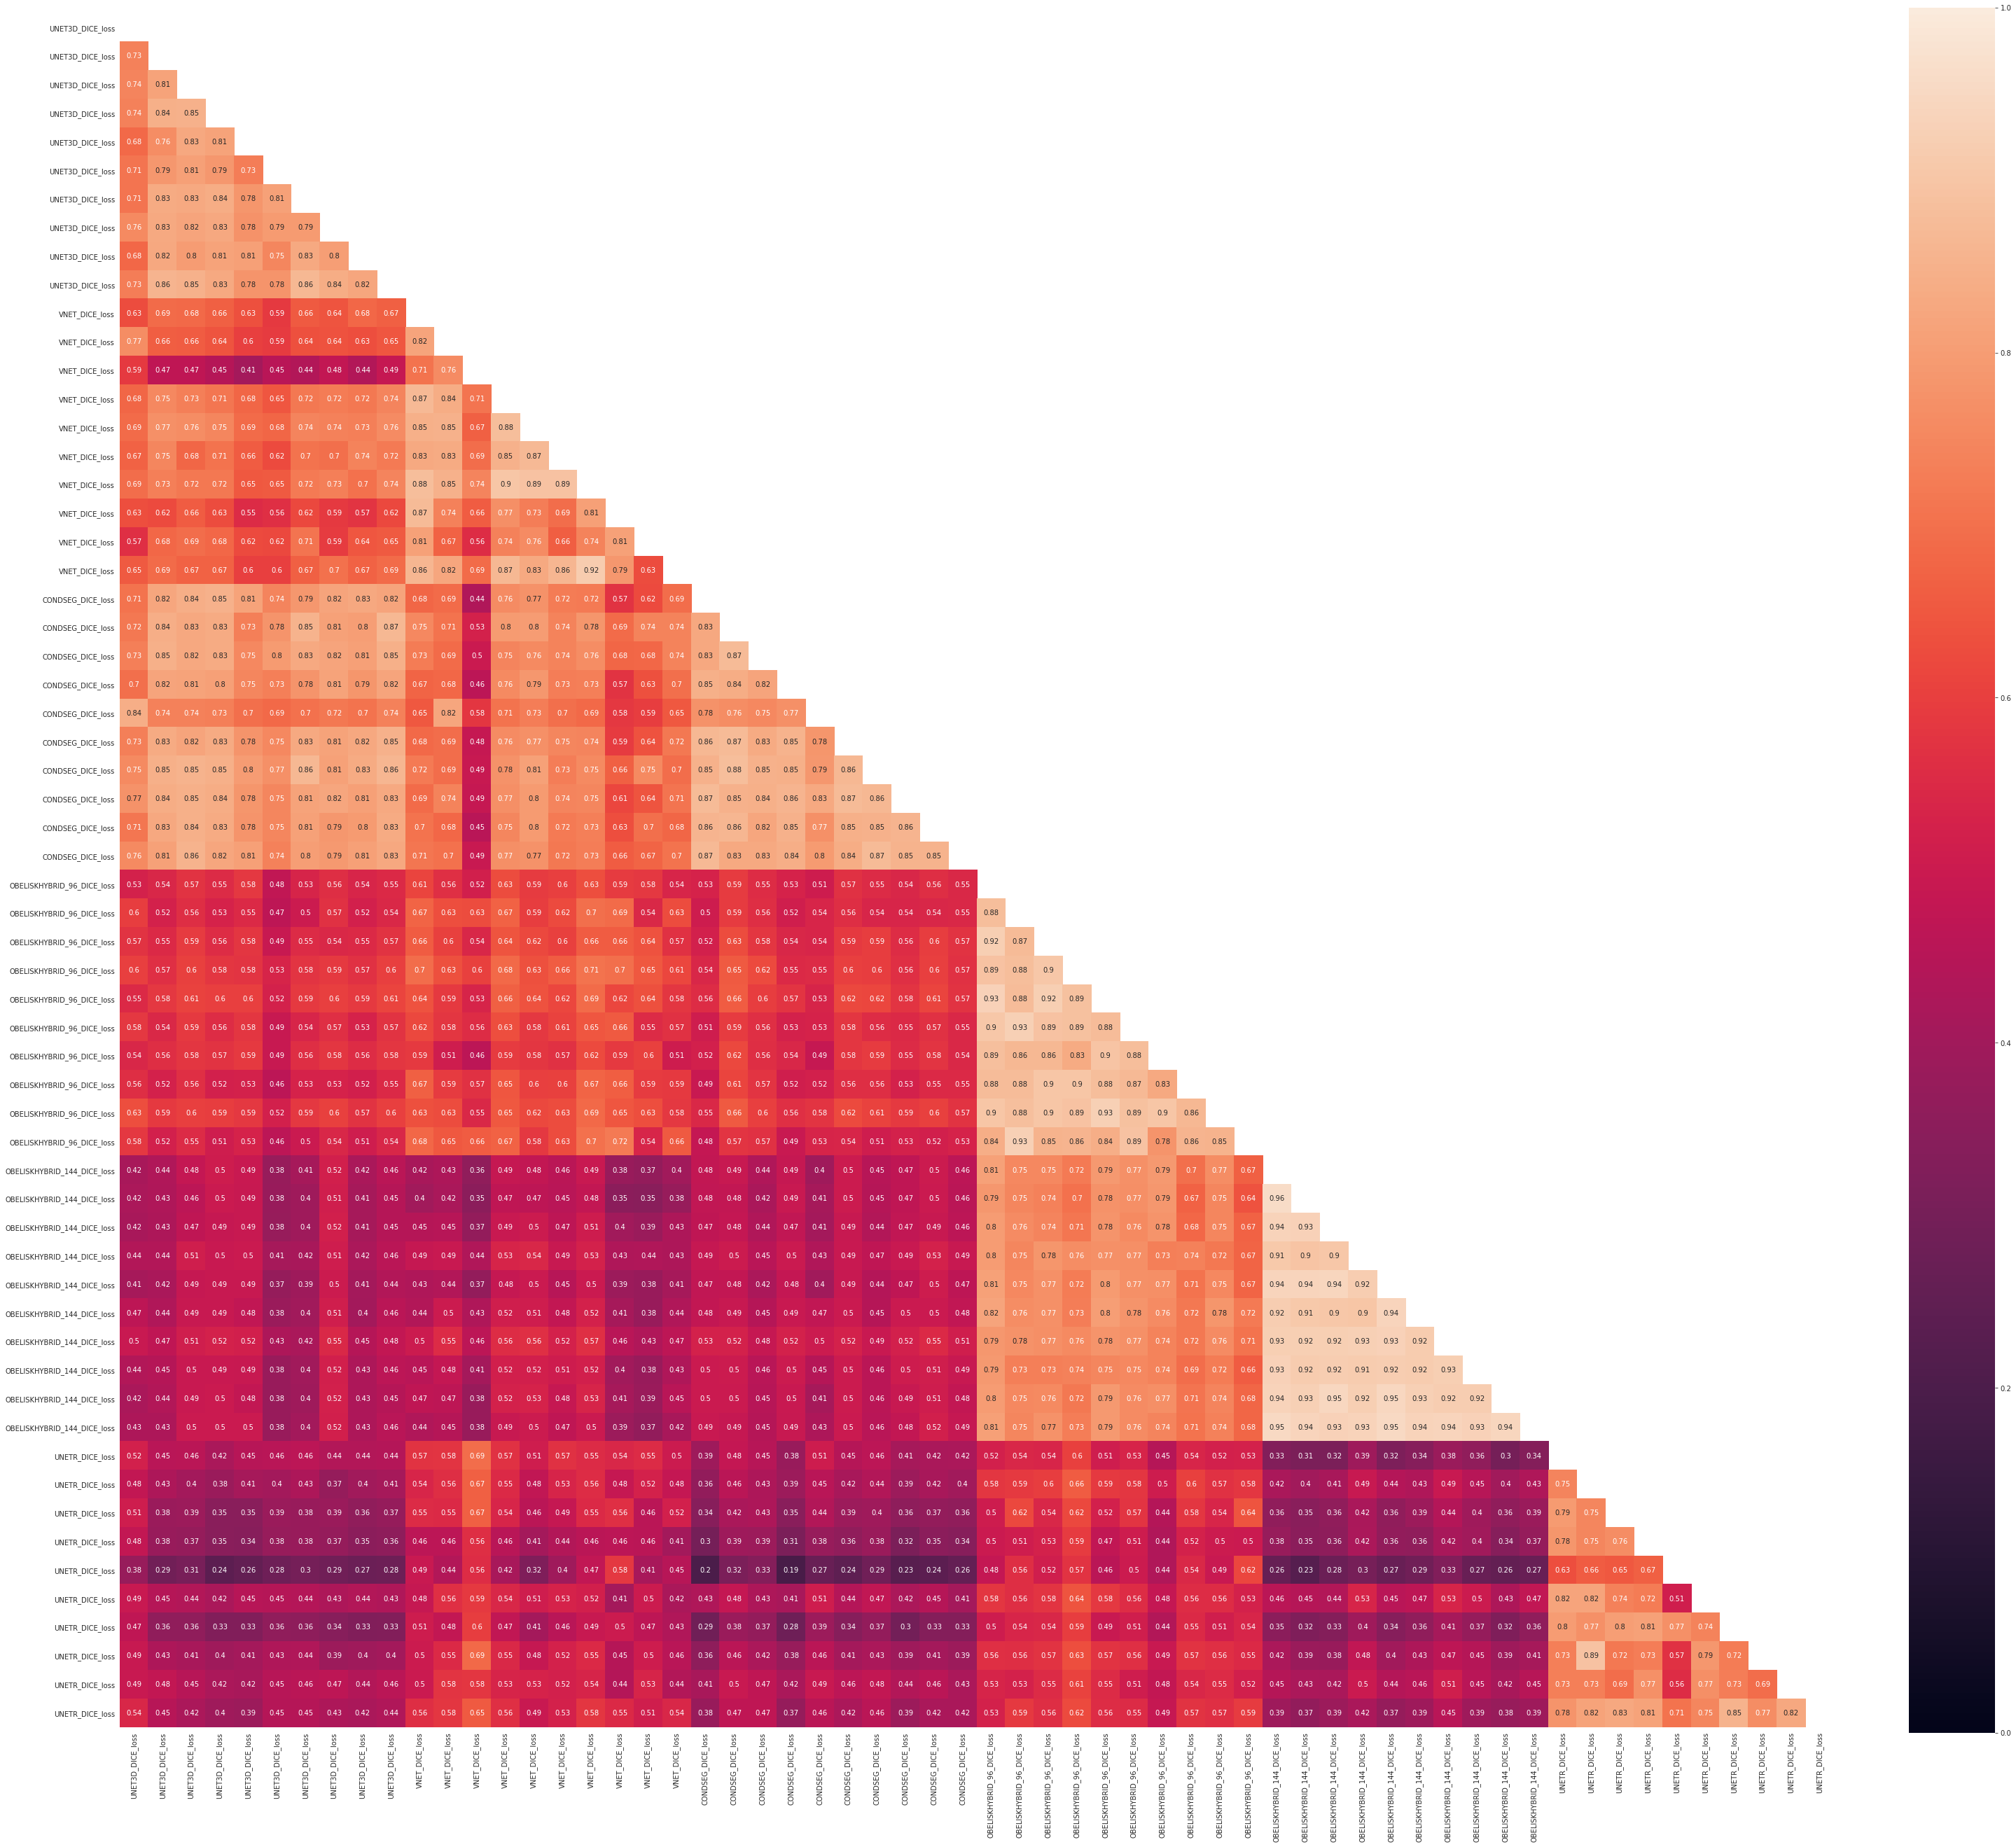

In [42]:
bce_corr = bce_series_dice_data.corr()
dice_corr = dice_series_dice_data.corr()
all_corr = all_series_dice_data.corr()
#####################
corr = dice_corr

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cbar_kws = dict(fraction=0.046, pad=0.04)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(48, 48))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cbar_kws = cbar_kws, vmin=0.0, vmax=1.0)
    #ax.set_xticklabels([]); ax.set_yticklabels([])

In [39]:
f.savefig(f"set_of_60_dice_no_labels.png", bbox_inches='tight', dpi = 300)

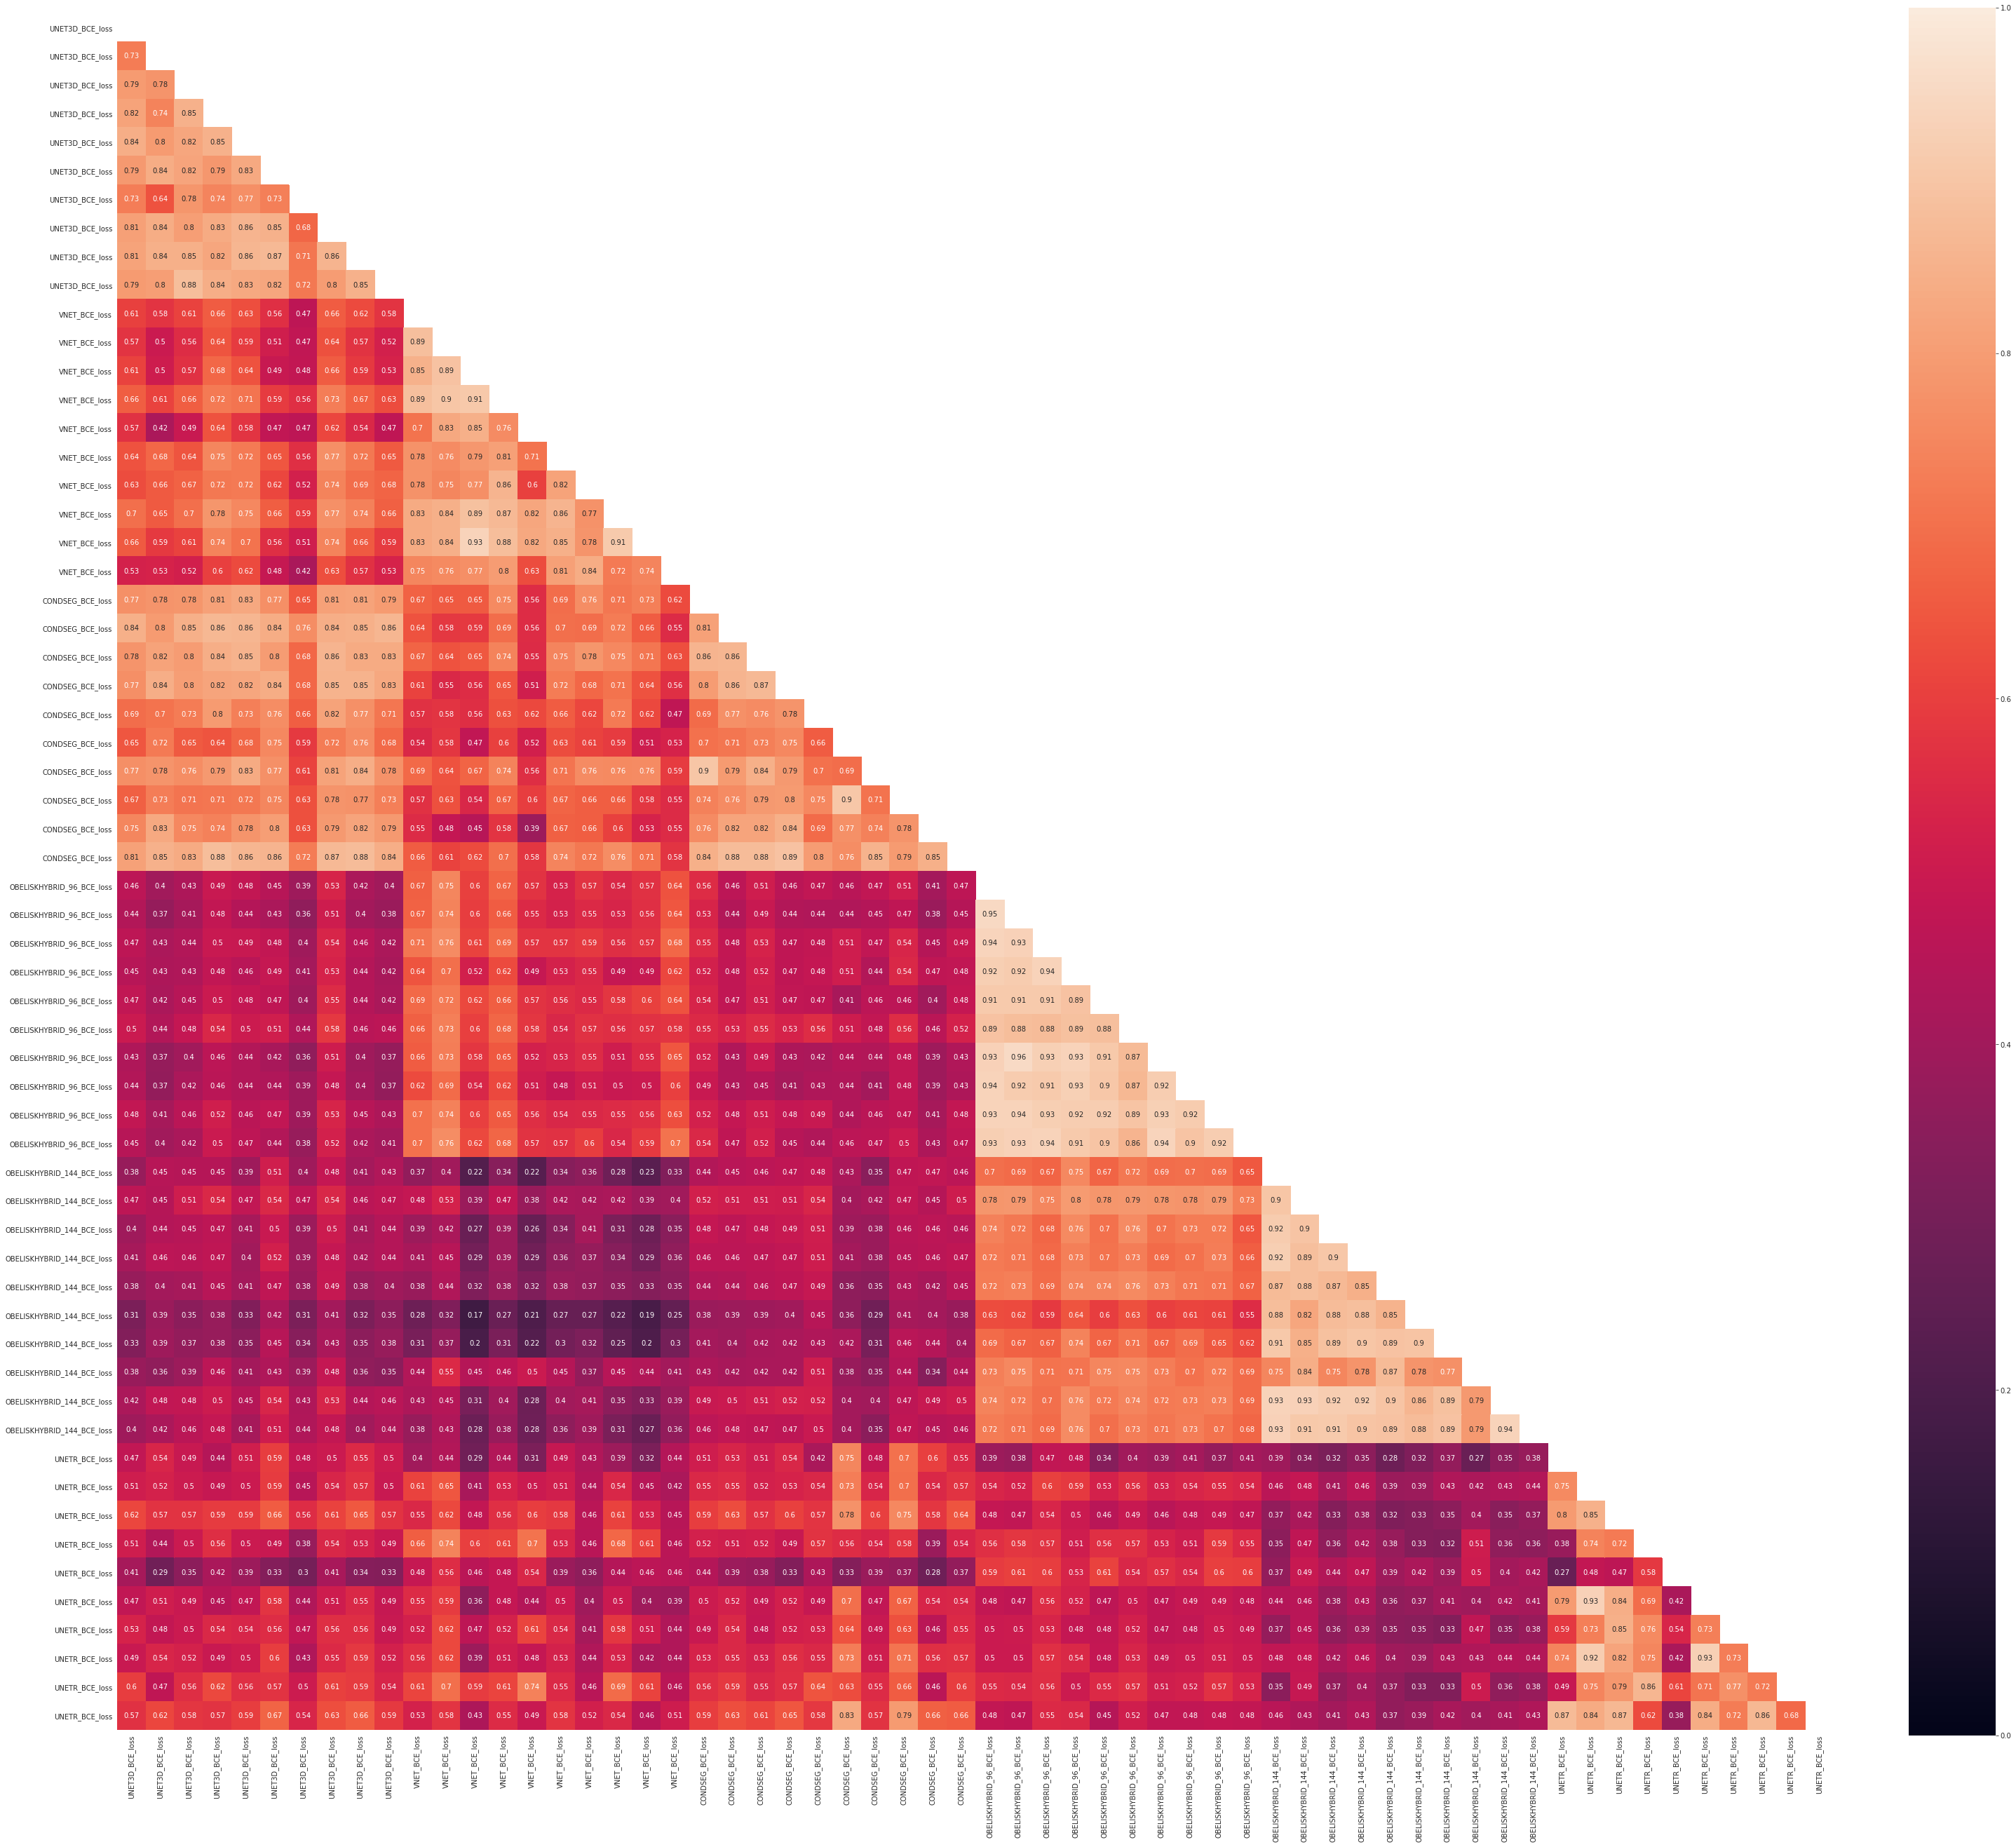

In [44]:
corr = bce_corr

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

cbar_kws = dict(fraction=0.046, pad=0.04)

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(48, 48))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, cbar_kws = cbar_kws, vmin=0.0, vmax=1.0)
    #ax.set_xticklabels([]); ax.set_yticklabels([])

In [41]:
f.savefig(f"set_of_60_bce_no_labels.png", bbox_inches='tight', dpi = 300)

In [40]:
model = "CONDSEG"
[(idx,col) for idx,col in enumerate(corr.columns) if model in col]

[(0, 'CONDSEG_BCE_loss'),
 (1, 'CONDSEG_BCE_loss'),
 (2, 'CONDSEG_BCE_loss'),
 (3, 'CONDSEG_BCE_loss'),
 (4, 'CONDSEG_BCE_loss'),
 (5, 'CONDSEG_BCE_loss'),
 (6, 'CONDSEG_BCE_loss'),
 (7, 'CONDSEG_DICE_loss'),
 (8, 'CONDSEG_DICE_loss'),
 (9, 'CONDSEG_DICE_loss'),
 (10, 'CONDSEG_DICE_loss'),
 (11, 'CONDSEG_DICE_loss'),
 (12, 'CONDSEG_DICE_loss'),
 (13, 'CONDSEG_DICE_loss')]

In [37]:
#print(corr.columns)

model = "CONDSEG"
model_idxs, model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) if model in col])

print(model_idxs, model_cols)
filtCorr = corr.iloc[list(model_idxs), list(model_idxs)]

display(filtCorr)

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11) ('CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss', 'CONDSEG_DICE_loss')


CONDSEG_DICE_loss  CONDSEG_DICE_loss  CONDSEG_DICE_loss  \
CONDSEG_DICE_loss           1.000000           0.825636           0.827775   
CONDSEG_DICE_loss           0.825636           1.000000           0.871203   
CONDSEG_DICE_loss           0.827775           0.871203           1.000000   
CONDSEG_DICE_loss           0.845689           0.839422           0.818146   
CONDSEG_DICE_loss           0.775059           0.762679           0.753093   
CONDSEG_DICE_loss           0.864152           0.873169           0.834908   
CONDSEG_DICE_loss           0.848076           0.882329           0.849070   
CONDSEG_DICE_loss           0.873462           0.848528           0.844710   
CONDSEG_DICE_loss           0.859190           0.860819           0.822532   
CONDSEG_DICE_loss           0.867190           0.828813           0.831216   
CONDSEG_DICE_loss           0.870115           0.829407           0.842523   
CONDSEG_DICE_loss           0.802739           0.810241           0.818124   

                   CONDSEG_DICE_loss  CONDSEG_DICE_loss  CONDSEG_DICE_loss  \
CONDSEG_DICE_loss           0.845689           0.775059           0.864152   
CONDSEG_DICE_loss           0.839422           0.762679           0.873169   
CONDSEG_DICE_loss           0.818146           0.753093           0.834908   
CONDSEG_DICE_loss           1.000000           0.772577           0.854718   
CONDSEG_DICE_loss           0.772577           1.000000           0.784057   
CONDSEG_DICE_loss           0.854718           0.784057           1.000000   
CONDSEG_DICE_loss           0.846145           0.785902           0.864034   
CONDSEG_DICE_loss           0.855837           0.831776           0.873635   
CONDSEG_DICE_loss           0.851347           0.771172           0.846929   
CONDSEG_DICE_loss           0.840222           0.795513           0.836361   
CONDSEG_DICE_loss           0.857772           0.783772           0.851266   
CONDSEG_DICE_loss           0.790573           0.735963           0.810364   

                   CONDSEG_DICE_loss  CONDSEG_DICE_loss  CONDSEG_DICE_loss  \
CONDSEG_DICE_loss           0.848076           0.873462           0.859190   
CONDSEG_DICE_loss           0.882329           0.848528           0.860819   
CONDSEG_DICE_loss           0.849070           0.844710           0.822532   
CONDSEG_DICE_loss           0.846145           0.855837           0.851347   
CONDSEG_DICE_loss           0.785902           0.831776           0.771172   
CONDSEG_DICE_loss           0.864034           0.873635           0.846929   
CONDSEG_DICE_loss           1.000000           0.864294           0.851427   
CONDSEG_DICE_loss           0.864294           1.000000           0.858180   
CONDSEG_DICE_loss           0.851427           0.858180           1.000000   
CONDSEG_DICE_loss           0.872032           0.852759           0.853222   
CONDSEG_DICE_loss           0.861645           0.859477           0.858075   
CONDSEG_DICE_loss           0.817910           0.816506           0.787262   

                   CONDSEG_DICE_loss  CONDSEG_DICE_loss  CONDSEG_DICE_loss  
CONDSEG_DICE_loss           0.867190           0.870115           0.802739  
CONDSEG_DICE_loss           0.828813           0.829407           0.810241  
CONDSEG_DICE_loss           0.831216           0.842523           0.818124  
CONDSEG_DICE_loss           0.840222           0.857772           0.790573  
CONDSEG_DICE_loss           0.795513           0.783772           0.735963  
CONDSEG_DICE_loss           0.836361           0.851266           0.810364  
CONDSEG_DICE_loss           0.872032           0.861645           0.817910  
CONDSEG_DICE_loss           0.852759           0.859477           0.816506  
CONDSEG_DICE_loss           0.853222           0.858075           0.787262  
CONDSEG_DICE_loss           1.000000           0.850975           0.814532  
CONDSEG_DICE_loss           0.850975           1.000000           0.828203  
CONDSEG_DICE_loss           0.814532           0.8

In [40]:
model_types

[('UNET3D', [96]),
 ('VNET', [96]),
 ('CONDSEG', [96]),
 ('OBELISKHYBRID', [96, 144]),
 ('UNETR', [96])]

In [44]:
np.unique(all_corr.columns)

array(['CONDSEG_BCE_loss', 'CONDSEG_DICE_loss',
       'OBELISKHYBRID_144_BCE_loss', 'OBELISKHYBRID_144_DICE_loss',
       'OBELISKHYBRID_96_BCE_loss', 'OBELISKHYBRID_96_DICE_loss',
       'UNET3D_BCE_loss', 'UNET3D_DICE_loss', 'UNETR_BCE_loss',
       'UNETR_DICE_loss', 'VNET_BCE_loss', 'VNET_DICE_loss'], dtype=object)

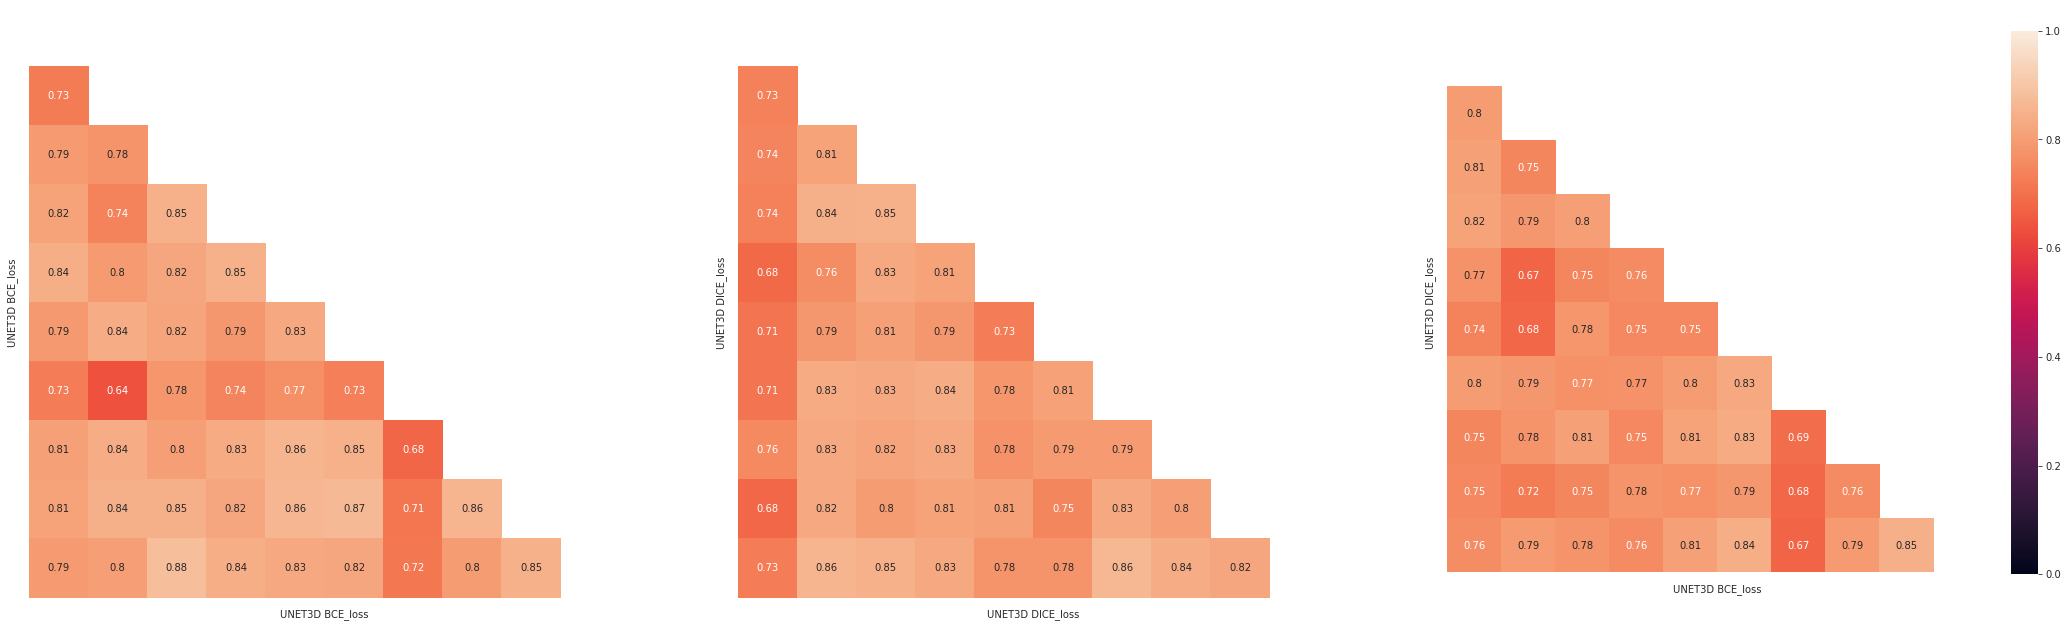

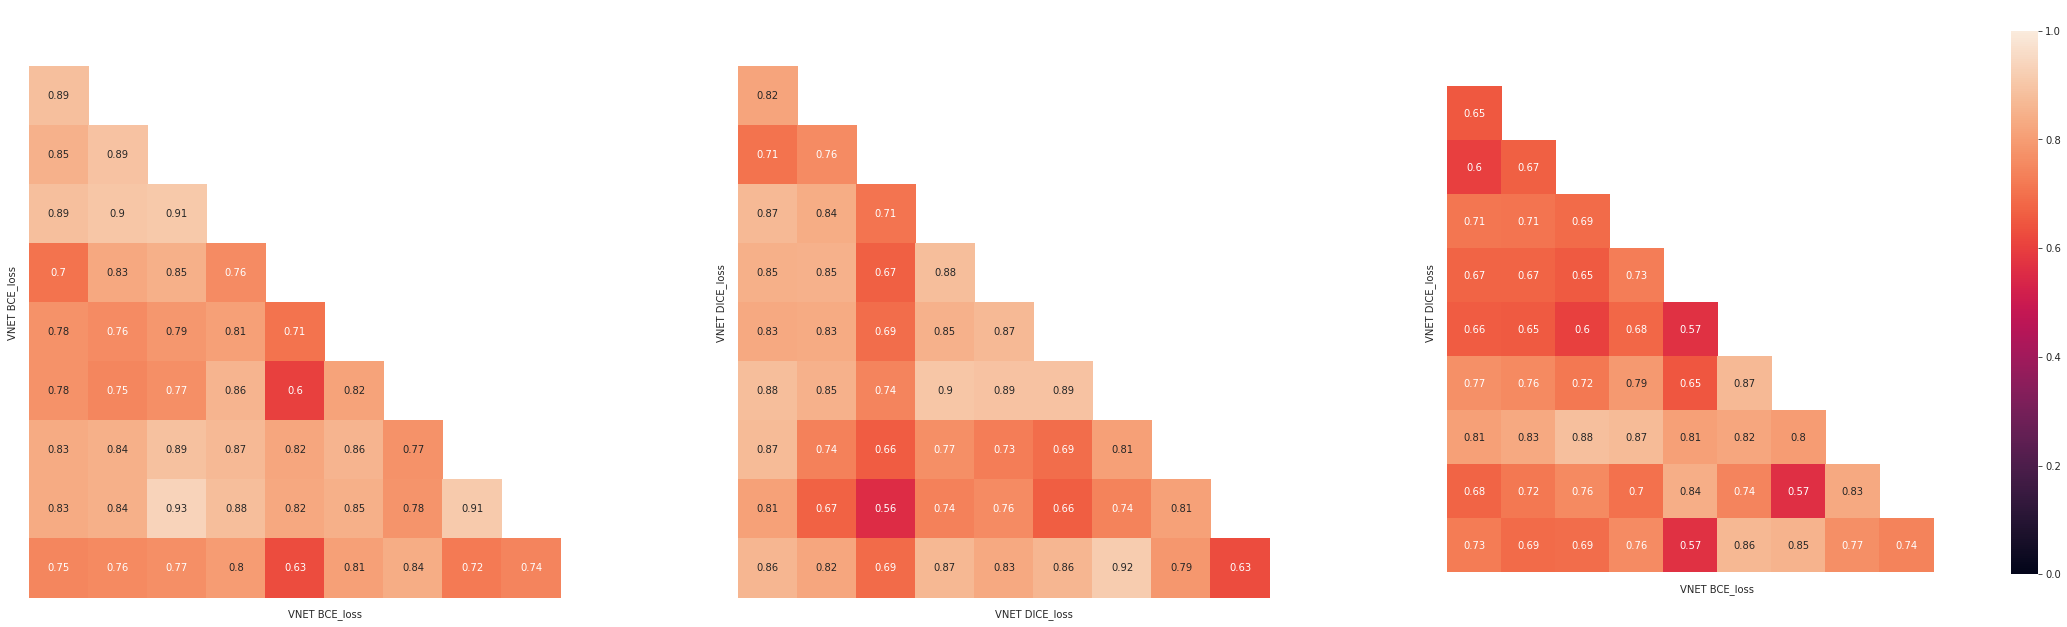

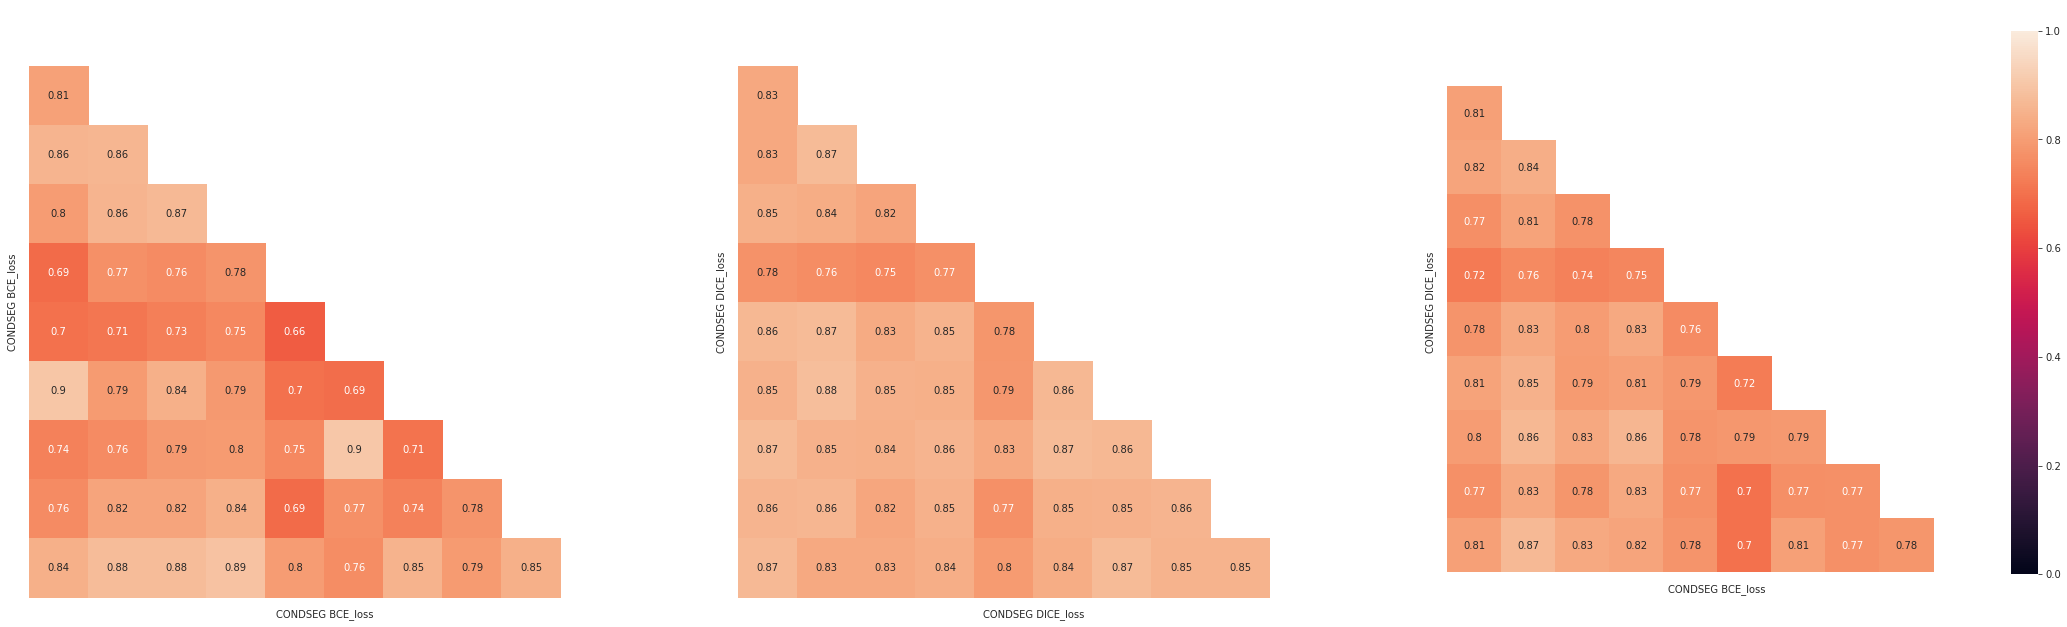

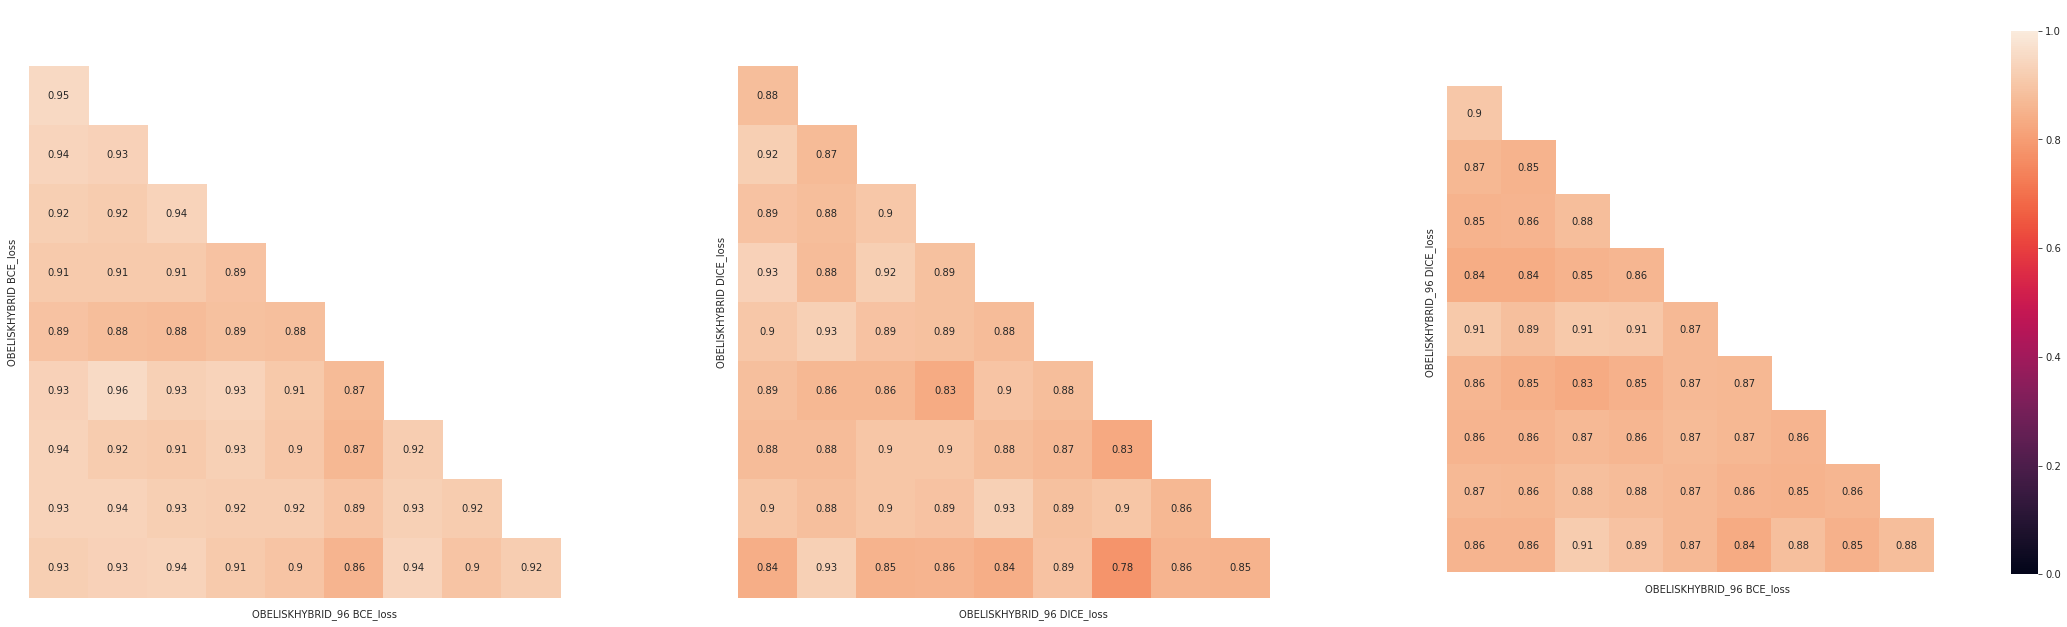

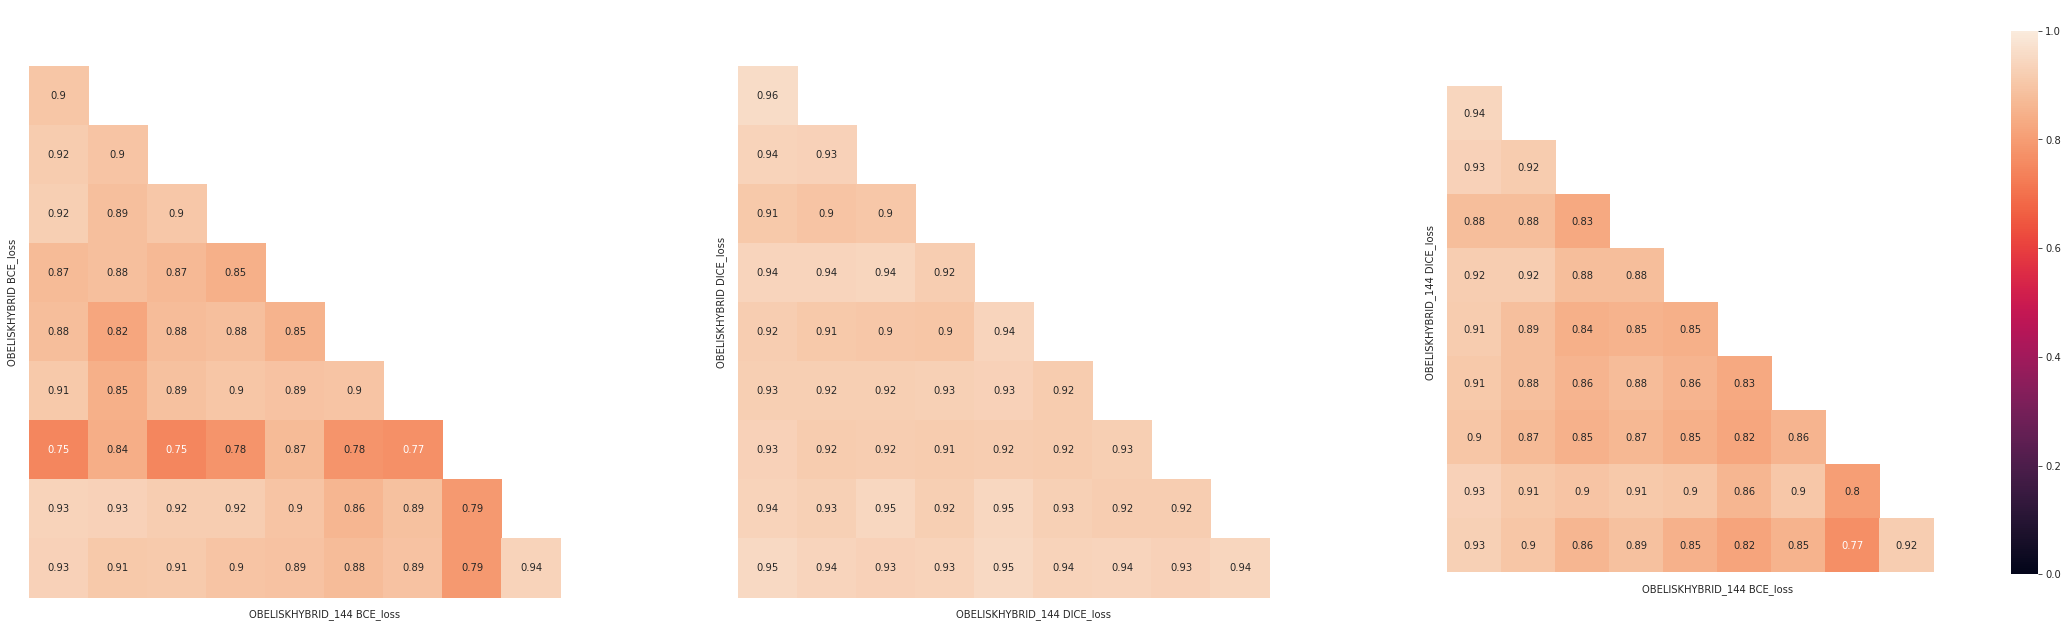

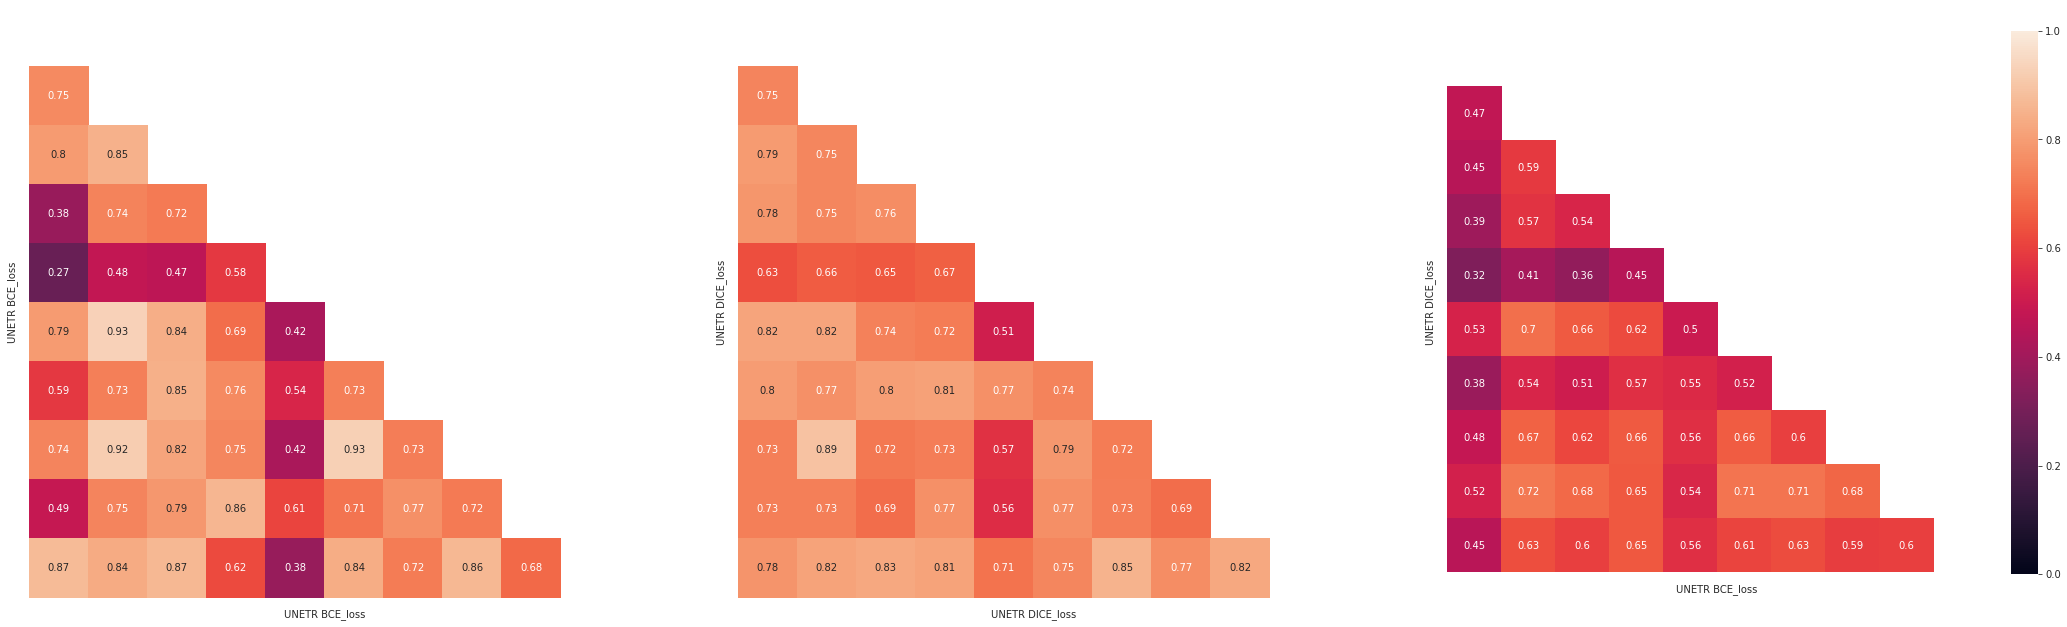

In [55]:
corr = all_corr

for model,res_list in model_types:
    for res in res_list:

        if model == "OBELISKHYBRID":
            model_search_str = f"{model}_{res}"
        else:
            model_search_str = f"{model}"
            
        bce_model_idxs, bce_model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) 
                                               if model_search_str in col and "BCE_loss" in col])

        dice_model_idxs, dice_model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) 
                                               if model_search_str in col and "DICE_loss" in col])
  

        #print(model_idxs, model_cols, len(model_idxs))
        bce_filtCorr  = corr.iloc[list(bce_model_idxs), list(bce_model_idxs)]
        dice_filtCorr  = corr.iloc[list(dice_model_idxs), list(dice_model_idxs)]
        cross_filtCorr = corr.iloc[list(dice_model_idxs), list(bce_model_idxs)]

        cbar_kws=dict(use_gridspec=False, pad=0.01,shrink=0.25)
        cbar_kws = dict(fraction=0.046, pad=0.04)

        mask = np.zeros_like(bce_filtCorr)
        mask[np.triu_indices_from(mask)] = True
        with sns.axes_style("white"):
            f, axes = plt.subplots(nrows=1, ncols=3,figsize=(36, 36))
            im = sns.heatmap(bce_filtCorr, mask=mask, square=True, annot=True, cbar=False, ax=axes[0], vmin=0.0, vmax=1.0)
            im = sns.heatmap(dice_filtCorr, mask=mask, square=True, annot=True, cbar=False, ax=axes[1], vmin=0.0, vmax=1.0)
            im = sns.heatmap(cross_filtCorr, mask=mask, square=True, annot=True, cbar_kws=cbar_kws, ax=axes[2], vmin=0.0, vmax=1.0)

            for ax,lbl in zip(axes, ["BCE_loss", "DICE_loss", "BCE_loss"]):
                ax.set_xticklabels([]); ax.set_yticklabels([])
                ax.set_xlabel(f"{model_search_str} {lbl}"); ax.set_ylabel(f"{model} {lbl}")
            axes[2].set_ylabel(f"{model_search_str} DICE_loss")
            #f.colorbar(im,fraction=0.046, pad=0.04)
        
            f.savefig(f"set_of_60_{model}_{res}_corrs.png", bbox_inches='tight', dpi = 300)

(100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119) ('VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss') 20


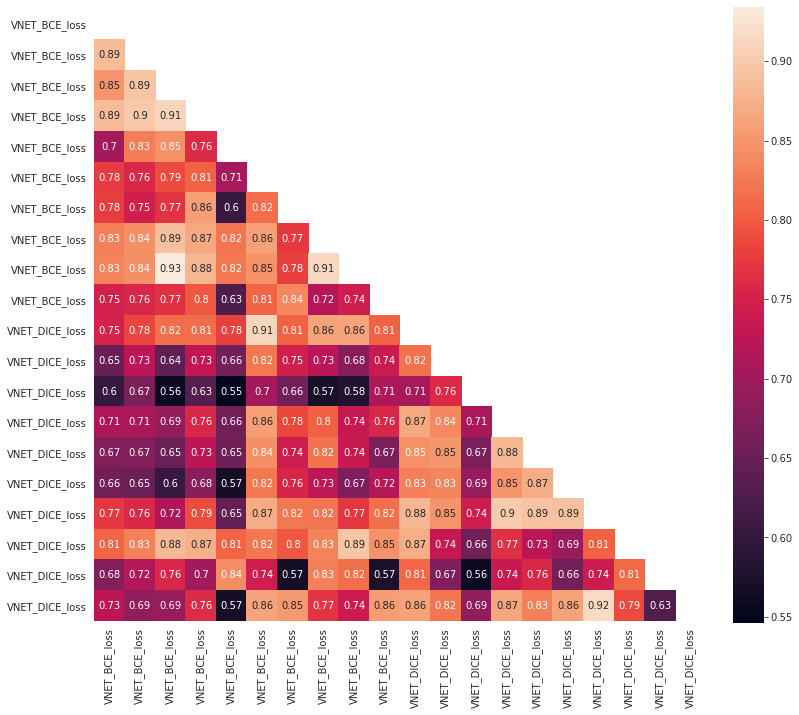

In [110]:
model = "VNET"

corr = all_corr

model_idxs, model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) if model in col])

print(model_idxs, model_cols, len(model_idxs))
filtCorr = corr.iloc[list(model_idxs), list(model_idxs)]

cbar_kws=dict(use_gridspec=False, pad=0.01,shrink=0.25)
cbar_kws = dict(fraction=0.046, pad=0.04)

mask = np.zeros_like(filtCorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    im = sns.heatmap(filtCorr, mask=mask, square=True, annot=True, cbar_kws=cbar_kws)
    #f.colorbar(im,fraction=0.046, pad=0.04)

(57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71) ('VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_BCE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss', 'VNET_DICE_loss')


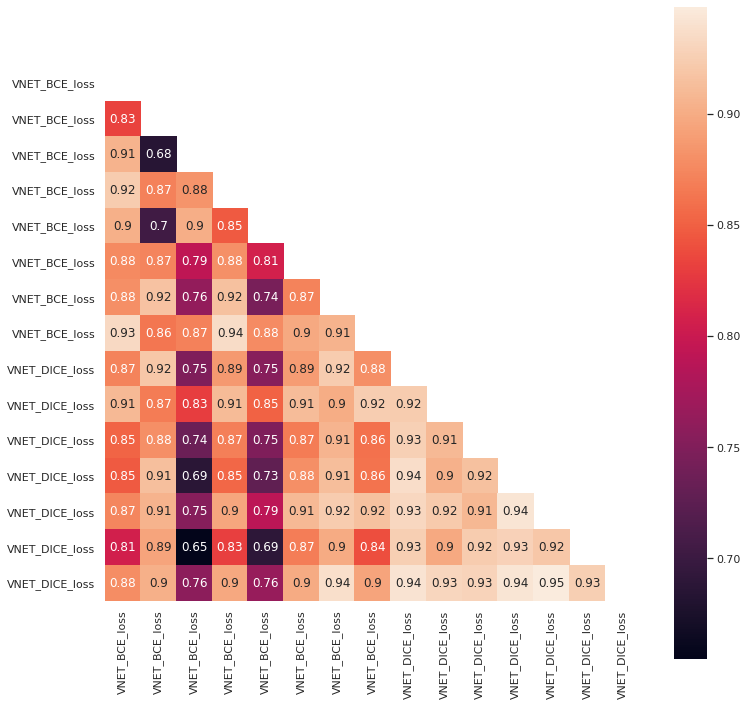

In [59]:
model = "VNET"
model_idxs, model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) if model in col])

print(model_idxs, model_cols)
filtCorr = corr.iloc[list(model_idxs), list(model_idxs)]

mask = np.zeros_like(filtCorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(filtCorr, mask=mask, square=True, annot=True)

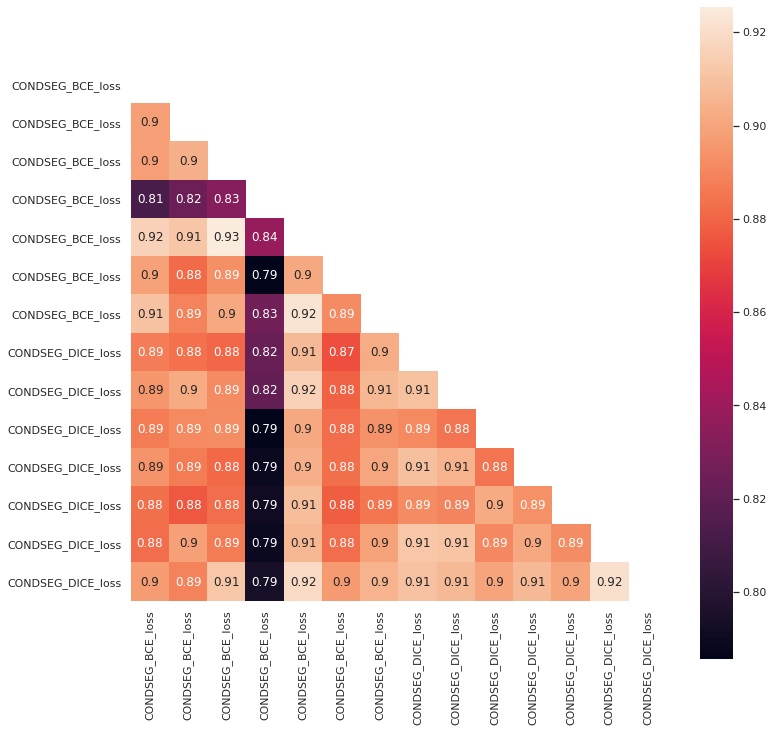

In [53]:
model = "VNET"
model_idxs, model_cols = zip(*[(idx,col) for idx,col in enumerate(corr.columns) if model in col])

print(model_idxs, model_cols)
filtCorr = corr.iloc[list(model_idxs), list(model_idxs)]

mask = np.zeros_like(filtCorr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(12, 12))
    ax = sns.heatmap(filtCorr, mask=mask, square=True, annot=True)

In [11]:
# unique
unique_cols = ['model', 'loss', 'simple', 'res']
a_df=info_df.drop_duplicates(unique_cols)
a_df

In [72]:
import re

def get_stem(f):
    i = f.index("_do_flip")
    return f[:i]

print(get_stem("model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40"))

model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False


In [24]:
recent_info_df['check'] = recent_info_df.fn.map(get_stem)

In [25]:
a_df=recent_info_df.drop_duplicates(['check'])

a_df_recent = get_recent_df(a_df)

In [26]:
len(a_df_recent)

24

In [27]:
a_df_recent

model       loss  simple  full_res  dice_median    date  \
143        CONDSEG   BCE_loss    True        96     0.796483  Aug_04   
179        CONDSEG   BCE_loss   False        96     0.756501  Aug_05   
140        CONDSEG  DICE_loss    True        96     0.792563  Aug_04   
183        CONDSEG  DICE_loss   False        96     0.787517  Aug_05   
133  OBELISKHYBRID   BCE_loss    True        96     0.745846  Aug_03   
172  OBELISKHYBRID   BCE_loss   False        96     0.722231  Aug_03   
132  OBELISKHYBRID  DICE_loss    True        96     0.771656  Aug_03   
176  OBELISKHYBRID  DICE_loss   False        96     0.730973  Aug_03   
38   OBELISKHYBRID   BCE_loss   False       144     0.714238  Aug_03   
37   OBELISKHYBRID   BCE_loss    True       144     0.756251  Aug_04   
36   OBELISKHYBRID  DICE_loss   False       144     0.730392  Aug_03   
32   OBELISKHYBRID  DICE_loss    True       144     0.765073  Aug_04   
141         UNET3D   BCE_loss    True        96     0.802638  Aug_03   
181         UNET3D   BCE_loss   False        96     0.783902  Aug_03   
142         UNET3D  DICE_loss    True        96     0.790288  Aug_03   
187         UNET3D  DICE_loss   False        96     0.773353  Aug_03   
139          UNETR   BCE_loss    True        96     0.779851  Aug_03   
138          UNETR   BCE_loss   False        96     0.577561  Aug_04   
136          UNETR  DICE_loss    True        96     0.754401  Aug_03   
137          UNETR  DICE_loss   False        96     0.584023  Aug_03   
98            VNET   BCE_loss    True        96     0.785755  Aug_03   
113           VNET   BCE_loss   False        96     0.598616  Aug_03   
97            VNET  DICE_loss    True        96     0.772861  Aug_03   
115           VNET  DICE_loss   False        96     0.752772  Aug_03   

                                                                                                                                                      fn  \
143           model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26   
179          model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628202024_Thu_Aug_05_2021_hr_18_min_20   
140          model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26   
183         model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628200115_Thu_Aug_05_2021_hr_17_min_48   
133     model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07   
172    model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011517_Tue_Aug_03_2021_hr_13_min_25   
132    model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04   
176   model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011517_Tue_Aug_03_2021_hr_13_min_25   
38    model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628028627_Tue_Aug_03_2021_hr_18_min_10   
37     model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117760_Wed_Aug_04_2021_hr_18_min_56   
36   model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628029376_Tue_Aug_03_2021_hr_18_min_22   
32    model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57   
141            model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18   
181           model_UNET3D_l

In [77]:
len(a_df)

24

In [78]:
unique_combinations, unique_idxs = np.unique(a_df.check.values, return_index=True)

In [79]:
len(unique_idxs)

24

In [80]:
unique_combinations

array(['model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False',
       'model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True',
       'model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False',
       'model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True',
       'model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_False',
       'model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True',
       'model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False',
       'model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True',
       'model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_False',
       'model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True',
       'model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False',
       'model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True',
       'model_UNET3D_los

In [81]:
# #info_df["simple"]
# #info_df = info_df.astype({'model': 'string', 'loss': 'string', 'date': 'string', 'fn': 'string', 'simple': 'bool'})

# unique_cols = ['model', 'loss', 'simple', 'res']

# a_df=info_df.drop_duplicates(unique_cols)
# a_df.sort_values(by=["dice_median"], ascending=False)

In [82]:
len(a_df)

24

In [84]:
a_df.sort_values(by=["model", "full_res",  "loss", "simple"], ascending=False)

model       loss  simple  full_res  dice_median    date  \
101           VNET  DICE_loss    True        96     0.790150  Aug_03   
99            VNET  DICE_loss   False        96     0.776276  Aug_03   
98            VNET   BCE_loss    True        96     0.769612  Aug_03   
97            VNET   BCE_loss   False        96     0.742594  Aug_03   
108          UNETR  DICE_loss    True        96     0.715899  Aug_03   
107          UNETR  DICE_loss   False        96     0.590909  Aug_03   
109          UNETR   BCE_loss    True        96     0.719779  Aug_03   
110          UNETR   BCE_loss   False        96     0.596723  Aug_04   
96          UNET3D  DICE_loss    True        96     0.801770  Aug_03   
125         UNET3D  DICE_loss   False        96     0.751888  Aug_03   
124         UNET3D   BCE_loss    True        96     0.793643  Aug_03   
123         UNET3D   BCE_loss   False        96     0.758320  Aug_03   
103  OBELISKHYBRID  DICE_loss    True       144     0.765073  Aug_04   
105  OBELISKHYBRID  DICE_loss   False       144     0.730392  Aug_03   
104  OBELISKHYBRID   BCE_loss    True       144     0.756251  Aug_04   
106  OBELISKHYBRID   BCE_loss   False       144     0.714238  Aug_03   
118  OBELISKHYBRID  DICE_loss    True        96     0.768885  Aug_03   
119  OBELISKHYBRID  DICE_loss   False        96     0.761874  Aug_03   
116  OBELISKHYBRID   BCE_loss    True        96     0.727850  Aug_03   
121  OBELISKHYBRID   BCE_loss   False        96     0.705151  Aug_03   
111        CONDSEG  DICE_loss    True        96     0.794206  Aug_04   
115        CONDSEG  DICE_loss   False        96     0.783355  Aug_05   
114        CONDSEG   BCE_loss    True        96     0.787557  Aug_04   
112        CONDSEG   BCE_loss   False        96     0.752401  Aug_05   

                                                                                                                                                      fn  \
101             model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22   
99             model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628010897_Tue_Aug_03_2021_hr_13_min_14   
98               model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978855_Tue_Aug_03_2021_hr_04_min_20   
97              model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011463_Tue_Aug_03_2021_hr_13_min_24   
108           model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28   
107           model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628014748_Tue_Aug_03_2021_hr_14_min_19   
109            model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628028739_Tue_Aug_03_2021_hr_18_min_12   
110            model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628124575_Wed_Aug_04_2021_hr_20_min_49   
96            model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18   
125          model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24   
124            model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18   
123           model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40   
103   model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57   
105  model_OBELISKHYBRID_los

len BCE 6 dice 6


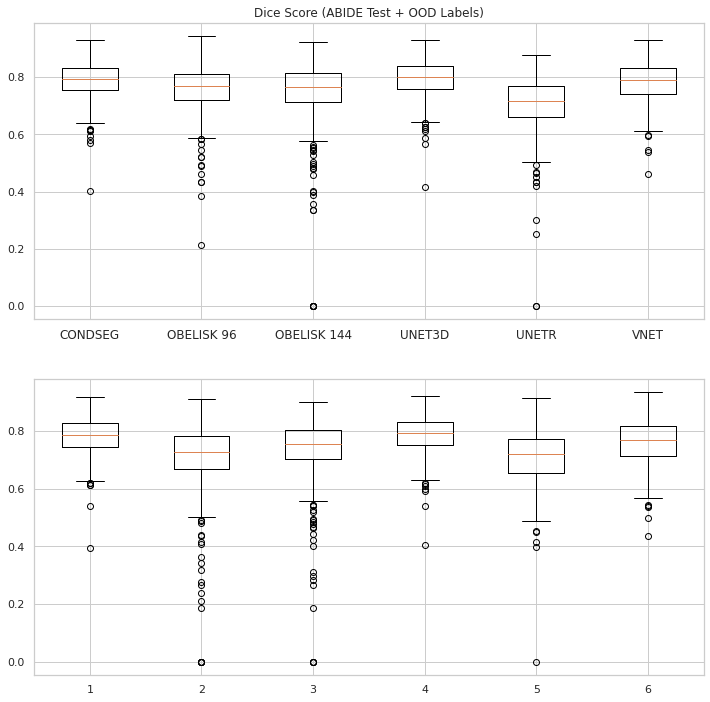

In [85]:
# bce seperate from dice

simple_keys    = [k for k in a_df_recent.fn.values if "do_simple_True" in k]
bce_plot_keys  = [k for k in simple_keys if "BCE_loss" in k]
dice_plot_keys = [k for k in simple_keys if "DICE_loss" in k]

print(f"len BCE", len(bce_plot_keys), "dice", len(dice_plot_keys))

bce_xtickNames  = [rename2(fn) for fn in bce_plot_keys]
dice_xtickNames = [rename2(fn) for fn in dice_plot_keys]

bce_data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in bce_plot_keys]
dice_data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in dice_plot_keys]


fig, ax = plt.subplots(2,1,figsize=(12,12)) #  sharex='col', sharey='row'
ax[0].set_title('Dice Score (ABIDE Test + OOD Labels)')
#ax.set_title('VNET: BCE (simple and all) vs DICE')
ax[0].boxplot(dice_data)
ax[0].set_xticklabels(dice_xtickNames, rotation=0, fontsize=12)

ax[1].boxplot(bce_data)
plt.show()

In [86]:
# plot_keys = a_df_recent.fn.values
# xtickNames = [rename2(fn) for fn in plot_keys]
# data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
# fig, ax = plt.subplots(figsize=(12,12))
# ax.set_title('Dice Score (ABIDE Test + OOD Labels)')
# #ax.set_title('VNET: BCE (simple and all) vs DICE')
# ax.boxplot(data)
# ax.set_xticklabels(xtickNames, rotation=90, fontsize=12)

# plt.show()

In [87]:
import seaborn as sns
sns.set_theme(style="whitegrid")

In [88]:
for fn in models_to_ensemble:
    print(post_df_dict[fn]["false_pos"].max())

NameError: name 'models_to_ensemble' is not defined

In [32]:
fn

'model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07'

In [33]:
df = post_df_dict[fn]
display(df.iloc[df["false_pos"].idxmax()])

dice                                                                                                                                                                                                           0
false_neg                                                                                                                                                                                                      1
false_pos                                                                                                                                                                                           1.79769e+308
hausdorff_dist                                                                                                                                                                                               NaN
image             /gpfs/data/oermannlab/private_data/DeepPit/PitMRdata/ADNI/ADNI1_Complete_1Yr_1.5T/ADNI/127_S_0259/MPR-R__GradWarp__B1_Correction__N3__Scaled/2006-

In [34]:
batches_idxs = [range(i,min(i+bs, len(itemsd))) for i in range(0,len(itemsd),bs)]
print(batches_idxs)

print(batches_idxs.index(range(220, 225)))

[range(0, 5), range(5, 10), range(10, 15), range(15, 20), range(20, 25), range(25, 30), range(30, 35), range(35, 40), range(40, 45), range(45, 50), range(50, 55), range(55, 60), range(60, 65), range(65, 70), range(70, 75), range(75, 80), range(80, 85), range(85, 90), range(90, 95), range(95, 100), range(100, 105), range(105, 110), range(110, 115), range(115, 120), range(120, 125), range(125, 130), range(130, 135), range(135, 140), range(140, 145), range(145, 150), range(150, 155), range(155, 160), range(160, 165), range(165, 170), range(170, 175), range(175, 180), range(180, 185), range(185, 190), range(190, 195), range(195, 200), range(200, 205), range(205, 210), range(210, 215), range(215, 220), range(220, 225), range(225, 230), range(230, 235), range(235, 240), range(240, 245), range(245, 250), range(250, 255), range(255, 260), range(260, 265), range(265, 270), range(270, 275), range(275, 280), range(280, 285), range(285, 290), range(290, 295), range(295, 300), range(300, 305), rang

In [35]:
# label = Pipeline(val_tfms)(itemsd[221])[1].squeeze(0) # undo B axis
# pred = 

In [108]:
metric = "dice" # false_pos

# if output doesn't intersect
undefined_val = {"false_pos": 0.0, "false_neg": 1.0}

simple_keys    = [k for k in a_df_recent.fn.values if "do_simple_True" in k]
bce_plot_keys  = [k for k in simple_keys if "BCE_loss" in k]
dice_plot_keys = [k for k in simple_keys if "DICE_loss" in k]

data = [{"model_type": rename2(fn), "loss_type":  "DICE_loss", f"{metric}_score":min(val,1)} 
        for i,fn in enumerate(dice_plot_keys) 
        for val in post_df_dict[fn][metric].values
       ] + \
    [{"model_type":  rename2(fn), "loss_type":  "BCE_loss", f"{metric}_score":min(val,1)} 
        for i,fn in enumerate(bce_plot_keys) 
        for val in post_df_dict[fn][metric].values
       ]

ensemble_data = \
    [{"model_type": "ensemble",  "loss_type":  "BCE_loss", f"{metric}_score":val} for val in ensemble_bce_df[metric].values] + \
    [{"model_type": "ensemble", "loss_type":  "DICE_loss", f"{metric}_score":val} for val in ensemble_dice_df[metric].values] + \
    [{"model_type": "ensemble",  "loss_type":  "Combined", f"{metric}_score":val} for val in ensemble_all_df[metric].values]

together_data = pd.DataFrame(data+ensemble_data) 

data = pd.DataFrame(data)
ensemble_data = pd.DataFrame(ensemble_data)

display(data)

model_type  loss_type  dice_score
0         CONDSEG  DICE_loss    0.791963
1         CONDSEG  DICE_loss    0.864665
2         CONDSEG  DICE_loss    0.814427
3         CONDSEG  DICE_loss    0.826728
4         CONDSEG  DICE_loss    0.803631
5         CONDSEG  DICE_loss    0.880142
6         CONDSEG  DICE_loss    0.837523
7         CONDSEG  DICE_loss    0.819311
8         CONDSEG  DICE_loss    0.891705
9         CONDSEG  DICE_loss    0.819584
10        CONDSEG  DICE_loss    0.817080
11        CONDSEG  DICE_loss    0.814831
12        CONDSEG  DICE_loss    0.759683
13        CONDSEG  DICE_loss    0.876040
14        CONDSEG  DICE_loss    0.792438
15        CONDSEG  DICE_loss    0.821215
16        CONDSEG  DICE_loss    0.838710
17        CONDSEG  DICE_loss    0.746747
18        CONDSEG  DICE_loss    0.795196
19        CONDSEG  DICE_loss    0.762999
20        CONDSEG  DICE_loss    0.815511
21        CONDSEG  DICE_loss    0.783821
22        CONDSEG  DICE_loss    0.876101
23        CONDSEG  DICE_loss    0.912714
24        CONDSEG  DICE_loss    0.838293
25        CONDSEG  DICE_loss    0.868244
26        CONDSEG  DICE_loss    0.775515
27        CONDSEG  DICE_loss    0.804566
28        CONDSEG  DICE_loss    0.847001
29        CONDSEG  DICE_loss    0.893579
30        CONDSEG  DICE_loss    0.740020
31        CONDSEG  DICE_loss    0.904500
32        CONDSEG  DICE_loss    0.838963
33        CONDSEG  DICE_loss    0.810072
34        CONDSEG  DICE_loss    0.786874
35        CONDSEG  DICE_loss    0.812662
36        CONDSEG  DICE_loss    0.906472
37        CONDSEG  DICE_loss    0.723266
38        CONDSEG  DICE_loss    0.892957
39        CONDSEG  DICE_loss    0.893672
40        CONDSEG  DICE_loss    0.838395
41        CONDSEG  DICE_loss    0.842325
42        CONDSEG  DICE_loss    0.778712
43        CONDSEG  DICE_loss    0.913953
44        CONDSEG  DICE_loss    0.783383
45        CONDSEG  DICE_loss    0.804117
46        CONDSEG  DICE_loss    0.851719
47        CONDSEG  DICE_loss    0.892739
48        CONDSEG  DICE_loss    0.860114
49        CONDSEG  DICE_loss    0.767210
50        CONDSEG  DICE_loss    0.865289
51        CONDSEG  DICE_loss    0.863889
52        CONDSEG  DICE_loss    0.817064
53        CONDSEG  DICE_loss    0.870505
54        CONDSEG  DICE_loss    0.850356
55        CONDSEG  DICE_loss    0.876148
56        CONDSEG  DICE_loss    0.820372
57        CONDSEG  DICE_loss    0.875840
58        CONDSEG  DICE_loss    0.908680
59        CONDSEG  DICE_loss    0.874430
60        CONDSEG  DICE_loss    0.778226
61        CONDSEG  DICE_loss    0.823227
62        CONDSEG  DICE_loss    0.843105
63        CONDSEG  DICE_loss    0.850950
64        CONDSEG  DICE_loss    0.866451
65        CONDSEG  DICE_loss    0.849351
66        CONDSEG  DICE_loss    0.756072
67        CONDSEG  DICE_loss    0.844277
68        CONDSEG  DICE_loss    0.839714
69        CONDSEG  DICE_loss    0.783333
70        CONDSEG  DICE_loss    0.814342
71        CONDSEG  DICE_loss    0.805598
72        CONDSEG  DICE_loss    0.821171
73        CONDSEG  DICE_loss    0.812649
74        CONDSEG  DICE_loss    0.807487
75        CONDSEG  DICE_loss    0.793657
76        CONDSEG  DICE_loss    0.813928
77        CONDSEG  DICE_loss    0.818565
78        CONDSEG  DICE_loss    0.665534
79        CONDSEG  DICE_loss    0.579070
80        CONDSEG  DICE_loss    0.760345
81        CONDSEG  DICE_loss    0.799519
82        CONDSEG  DICE_loss    0.817627
83        CONDSEG  DICE_loss    0.749232
84        CONDSEG  DICE_loss    0.836019
85        CONDSEG  DICE_loss    0.745602
86        CONDSEG  DICE_loss    0.753572
87        CONDSEG  DICE_loss    0.875650
88        CONDSEG  DICE_loss    0.720677
89        CONDSEG  DICE_loss    0.871797
90        CONDSEG  DICE_loss    0.829071
91        CONDSEG  DICE_loss    0.814619
92        CONDSEG  DICE_loss    0.759866
93        CONDSEG  DICE_loss    0.776802
94        CONDSEG  DICE_loss    0.661364
95        CONDSEG  DICE_loss    0.777239
96        CONDSEG  DICE_loss  

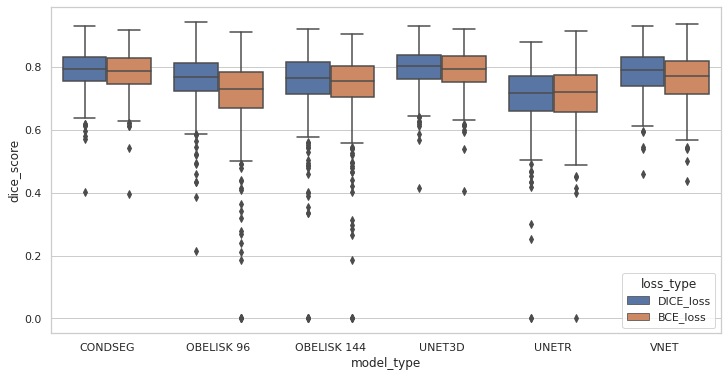

In [109]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x="model_type", y=f"{metric}_score", data=data, hue="loss_type", ax=ax)
#ax = sns.swarmplot(x="model_type", y="DICE_score", data=data, hue="loss_type", color=".25")

In [110]:
together_data

model_type  loss_type  dice_score
0         CONDSEG  DICE_loss    0.791963
1         CONDSEG  DICE_loss    0.864665
2         CONDSEG  DICE_loss    0.814427
3         CONDSEG  DICE_loss    0.826728
4         CONDSEG  DICE_loss    0.803631
5         CONDSEG  DICE_loss    0.880142
6         CONDSEG  DICE_loss    0.837523
7         CONDSEG  DICE_loss    0.819311
8         CONDSEG  DICE_loss    0.891705
9         CONDSEG  DICE_loss    0.819584
10        CONDSEG  DICE_loss    0.817080
11        CONDSEG  DICE_loss    0.814831
12        CONDSEG  DICE_loss    0.759683
13        CONDSEG  DICE_loss    0.876040
14        CONDSEG  DICE_loss    0.792438
15        CONDSEG  DICE_loss    0.821215
16        CONDSEG  DICE_loss    0.838710
17        CONDSEG  DICE_loss    0.746747
18        CONDSEG  DICE_loss    0.795196
19        CONDSEG  DICE_loss    0.762999
20        CONDSEG  DICE_loss    0.815511
21        CONDSEG  DICE_loss    0.783821
22        CONDSEG  DICE_loss    0.876101
23        CONDSEG  DICE_loss    0.912714
24        CONDSEG  DICE_loss    0.838293
25        CONDSEG  DICE_loss    0.868244
26        CONDSEG  DICE_loss    0.775515
27        CONDSEG  DICE_loss    0.804566
28        CONDSEG  DICE_loss    0.847001
29        CONDSEG  DICE_loss    0.893579
30        CONDSEG  DICE_loss    0.740020
31        CONDSEG  DICE_loss    0.904500
32        CONDSEG  DICE_loss    0.838963
33        CONDSEG  DICE_loss    0.810072
34        CONDSEG  DICE_loss    0.786874
35        CONDSEG  DICE_loss    0.812662
36        CONDSEG  DICE_loss    0.906472
37        CONDSEG  DICE_loss    0.723266
38        CONDSEG  DICE_loss    0.892957
39        CONDSEG  DICE_loss    0.893672
40        CONDSEG  DICE_loss    0.838395
41        CONDSEG  DICE_loss    0.842325
42        CONDSEG  DICE_loss    0.778712
43        CONDSEG  DICE_loss    0.913953
44        CONDSEG  DICE_loss    0.783383
45        CONDSEG  DICE_loss    0.804117
46        CONDSEG  DICE_loss    0.851719
47        CONDSEG  DICE_loss    0.892739
48        CONDSEG  DICE_loss    0.860114
49        CONDSEG  DICE_loss    0.767210
50        CONDSEG  DICE_loss    0.865289
51        CONDSEG  DICE_loss    0.863889
52        CONDSEG  DICE_loss    0.817064
53        CONDSEG  DICE_loss    0.870505
54        CONDSEG  DICE_loss    0.850356
55        CONDSEG  DICE_loss    0.876148
56        CONDSEG  DICE_loss    0.820372
57        CONDSEG  DICE_loss    0.875840
58        CONDSEG  DICE_loss    0.908680
59        CONDSEG  DICE_loss    0.874430
60        CONDSEG  DICE_loss    0.778226
61        CONDSEG  DICE_loss    0.823227
62        CONDSEG  DICE_loss    0.843105
63        CONDSEG  DICE_loss    0.850950
64        CONDSEG  DICE_loss    0.866451
65        CONDSEG  DICE_loss    0.849351
66        CONDSEG  DICE_loss    0.756072
67        CONDSEG  DICE_loss    0.844277
68        CONDSEG  DICE_loss    0.839714
69        CONDSEG  DICE_loss    0.783333
70        CONDSEG  DICE_loss    0.814342
71        CONDSEG  DICE_loss    0.805598
72        CONDSEG  DICE_loss    0.821171
73        CONDSEG  DICE_loss    0.812649
74        CONDSEG  DICE_loss    0.807487
75        CONDSEG  DICE_loss    0.793657
76        CONDSEG  DICE_loss    0.813928
77        CONDSEG  DICE_loss    0.818565
78        CONDSEG  DICE_loss    0.665534
79        CONDSEG  DICE_loss    0.579070
80        CONDSEG  DICE_loss    0.760345
81        CONDSEG  DICE_loss    0.799519
82        CONDSEG  DICE_loss    0.817627
83        CONDSEG  DICE_loss    0.749232
84        CONDSEG  DICE_loss    0.836019
85        CONDSEG  DICE_loss    0.745602
86        CONDSEG  DICE_loss    0.753572
87        CONDSEG  DICE_loss    0.875650
88        CONDSEG  DICE_loss    0.720677
89        CONDSEG  DICE_loss    0.871797
90        CONDSEG  DICE_loss    0.829071
91        CONDSEG  DICE_loss    0.814619
92        CONDSEG  DICE_loss    0.759866
93        CONDSEG  DICE_loss    0.776802
94        CONDSEG  DICE_loss    0.661364
95        CONDSEG  DICE_loss    0.777239
96        CONDSEG  DICE_loss  

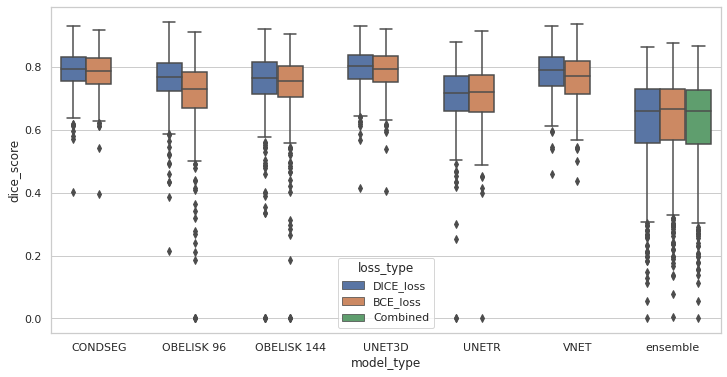

In [111]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x="model_type", y=f"{metric}_score", hue="loss_type", data=together_data, ax=ax)
#ax = sns.swarmplot(x="model_type", y="DICE_score", data=data, hue="loss_type", color=".25")

In [42]:
dice_plot_keys

['model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26',
 'model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14',
 'model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628117846_Wed_Aug_04_2021_hr_18_min_57',
 'model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18',
 'model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28',
 'model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22']

In [43]:
list(zip(*[list(post_df_dict[fn][metric].values) 
                                          for i,fn in enumerate(dice_plot_keys)]))

[(0.7919626054756268,
  0.815651324624588,
  0.7961680333306796,
  0.8254101305232906,
  0.7459239918769945,
  0.8205734187449468),
 (0.8646654368606407,
  0.8481408358012504,
  0.8936778279843973,
  0.8629330642448706,
  0.834804329725229,
  0.902472154305895),
 (0.8144269066233958,
  0.7975272727272726,
  0.7945651493331664,
  0.8177310737808037,
  0.7996729354047425,
  0.8129745669001105),
 (0.8267276422764228,
  0.8009401847949424,
  0.7491224139218762,
  0.8350435457445892,
  0.7838869487533501,
  0.7956310265381005),
 (0.803631317219845,
  0.8230690711126233,
  0.7707531049960471,
  0.8330497901780651,
  0.8516654171575452,
  0.8150470219435736),
 (0.8801417615617011,
  0.8833401332789337,
  0.8858774439976301,
  0.8835149667883947,
  0.8229399976423435,
  0.8622336517266717),
 (0.8375230905148181,
  0.8195619422876347,
  0.8134638965165881,
  0.8784970541371772,
  0.7072558373085613,
  0.8509943603443159),
 (0.8193113835083462,
  0.7585901130569719,
  0.7943054110832364,
  0.785

In [47]:
metric = "false_neg"
series_dice_data = pd.DataFrame(list(zip(*[list(post_df_dict[fn][metric].values) 
                                          for i,fn in enumerate(dice_plot_keys)])), 
                                columns=[rename2(k) for k in dice_plot_keys])
display(series_dice_data)

CONDSEG  OBELISK 96  OBELISK 144    UNET3D     UNETR      VNET
0    0.128407    0.107296     0.066638  0.078968  0.141101  0.118520
1    0.034818    0.035006     0.040391  0.039498  0.061587  0.067203
2    0.003789    0.010646     0.001652  0.003067  0.029412  0.005052
3    0.207630    0.197890     0.261251  0.213961  0.216558  0.243182
4    0.274407    0.242247     0.300837  0.233058  0.169677  0.253420
..        ...         ...          ...       ...       ...       ...
479  0.306077    0.345335     0.321427  0.333284  0.359826  0.324412
480  0.269410    0.287866     0.306706  0.256258  0.271107  0.244485
481  0.174271    0.229807     0.191533  0.183621  0.237918  0.194435
482  0.306325    0.246108     0.285639  0.276635  0.319083  0.248462
483  0.070129    0.187304     0.130872  0.043533  0.199724  0.051186

[484 rows x 6 columns]

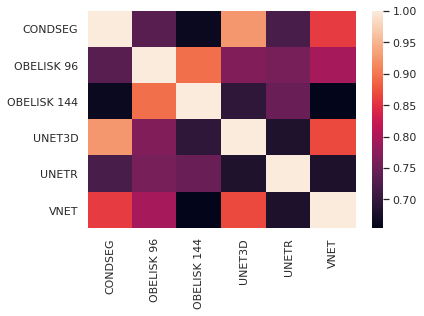

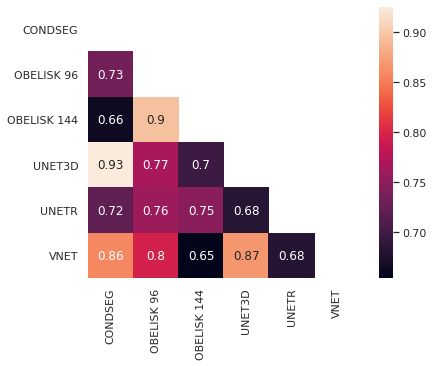

In [48]:
corr = series_dice_data.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

# upper triangualar
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True)

In [49]:
# corr matrix

flights = sns.load_dataset("flights")
display(flights.head())
flights = flights.pivot("month", "year", "passengers")
display(flights.head())

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472

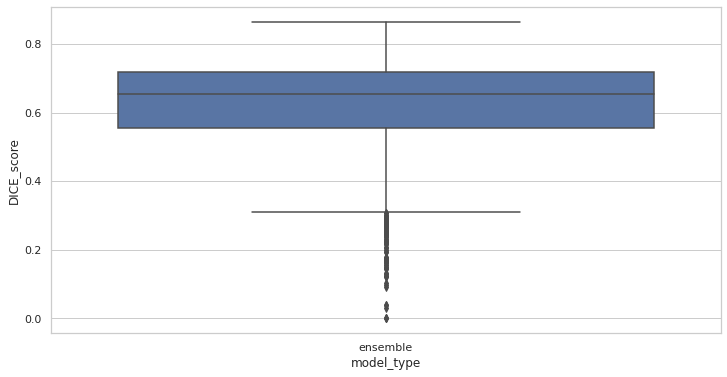

In [66]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x="model_type", y="DICE_score", data=ensemble_data, ax=ax)
#ax = sns.swarmplot(x="model_type", y="DICE_score", data=data, hue="loss_type", color=".25")

In [114]:
# Models to Ensemble
def ensrc_old():
    models_to_ensemble = [
        # UNET DICE, VNET DICE, UNET BCE, VNET BCE, OBELISK DICE, OBELISK BCE, CONDSEG DICE, CONDSEG BCE
        "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18",
        "model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978137_Tue_Aug_03_2021_hr_04_min_08",
        "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18",
        "model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10",
        "model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04",
        "model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07",
    #     "model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26",
    #     "model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26"
    ]

    n = "_and_".join([get_model_id(model_fn) for model_fn in models_to_ensemble])
    print(f"{run_src}/model_ensemble/{n}")
ensrc_old()

/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble/time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1627963440_and_time_1627963631


In [124]:
time_dirs = [d for d in os.listdir("/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble") if d.startswith("time")]

In [125]:
time_dirs

['time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1628097973_and_time_1628097978',
 'time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1627963440_and_time_1627963631']

In [127]:
old_ensemble_src = "/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble" + "/" + time_dirs[-1]

In [126]:
os.listdir("/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble" + "/" + time_dirs[-1])

['bce_preds_batch_71_bs_5.pkl',
 'all_preds_batch_89_bs_5.pkl',
 'all_preds_batch_55_bs_5.pkl',
 'all_preds_batch_78_bs_5.pkl',
 'bce_preds_batch_63_bs_5.pkl',
 'bce_preds_batch_93_bs_5.pkl',
 'bce_preds_batch_23_bs_5.pkl',
 'dice_preds_batch_36_bs_5.pkl',
 'all_preds_batch_59_bs_5.pkl',
 'all_preds_batch_56_bs_5.pkl',
 'dice_preds_batch_69_bs_5.pkl',
 'dice_preds_batch_76_bs_5.pkl',
 'bce_preds_batch_74_bs_5.pkl',
 'dice_preds_batch_52_bs_5.pkl',
 'dice_preds_batch_25_bs_5.pkl',
 'bce_preds_batch_94_bs_5.pkl',
 'bce_preds_batch_91_bs_5.pkl',
 'bce_preds_batch_24_bs_5.pkl',
 'ensemble_dice_df.pkl',
 'dice_preds_batch_40_bs_5.pkl',
 'dice_preds_batch_57_bs_5.pkl',
 'bce_preds_batch_80_bs_5.pkl',
 'all_preds_batch_5_bs_5.pkl',
 'bce_preds_batch_88_bs_5.pkl',
 'dice_preds_batch_63_bs_5.pkl',
 'bce_preds_batch_25_bs_5.pkl',
 'dice_preds_batch_91_bs_5.pkl',
 'bce_preds_batch_22_bs_5.pkl',
 'all_preds_batch_70_bs_5.pkl',
 'bce_preds_batch_30_bs_5.pkl',
 'dice_preds_batch_96_bs_5.pkl',
 'bce_

In [131]:

ensemble_data = \
    [{"model_type": "ensemble",  "loss_type":  "BCE_loss", f"{metric}_score":val} for val in ensemble_bce_df[metric].values] + \
    [{"model_type": "ensemble", "loss_type":  "DICE_loss", f"{metric}_score":val} for val in ensemble_dice_df[metric].values] + \
    [{"model_type": "ensemble",  "loss_type":  "Combined", f"{metric}_score":val} for val in ensemble_all_df[metric].values]

ensemble_df = pd.DataFrame(ensemble_data)

#old_ensemble_src = "gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble/time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1627963440_and_time_1627963631"
old_ensemble_all_df = pd.read_pickle(f"{old_ensemble_src}/ensemble_all_df.pkl")
old_ensemble_dice_df = pd.read_pickle(f"{old_ensemble_src}/ensemble_dice_df.pkl")
old_ensemble_bce_df = pd.read_pickle(f"{old_ensemble_src}/ensemble_bce_df.pkl")
# model_src = f"{run_src}/{model_name}"

old_ensemble_data = \
    [{"model_type": "ensemble",  "loss_type":  "BCE_loss", f"{metric}_score":val} for val in old_ensemble_bce_df[metric].values] + \
    [{"model_type": "ensemble", "loss_type":  "DICE_loss", f"{metric}_score":val} for val in old_ensemble_dice_df[metric].values] + \
    [{"model_type": "ensemble",  "loss_type":  "Combined", f"{metric}_score":val} for val in old_ensemble_all_df[metric].values]

old_ensemble_df = pd.DataFrame(old_ensemble_data)

both_ensemble = pd.DataFrame(ensemble_data + old_ensemble_data)

In [129]:
ensemble_src, old_ensemble_src

('/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble/time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1628097973_and_time_1628097978',
 '/gpfs/data/oermannlab/private_data/DeepPit/runs/model_ensemble/time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1627963440_and_time_1627963631')

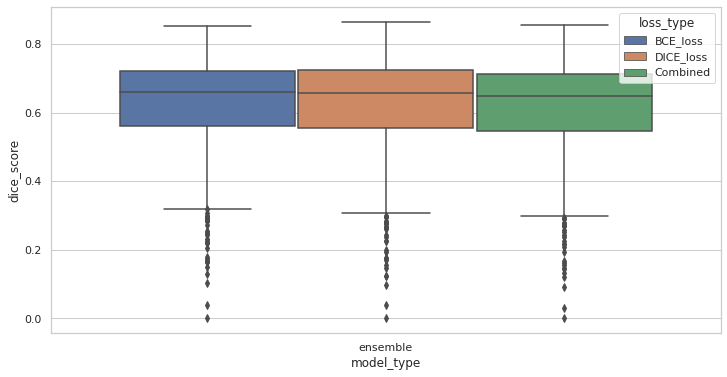

In [133]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x="model_type", y=f"{metric}_score", hue="loss_type", data=old_ensemble_df, ax=ax)
#ax = sns.swarmplot(x="model_type", y="DICE_score", data=data, hue="loss_type", color=".25")

In [142]:
diff_df = ensemble_df["dice_score"] - old_ensemble_df["dice_score"]

In [144]:
diff_df.mean(), diff_df.max()

(0.008201695920086237, 0.0912673865368907)

In [ ]:
plt.hist(diff_df)

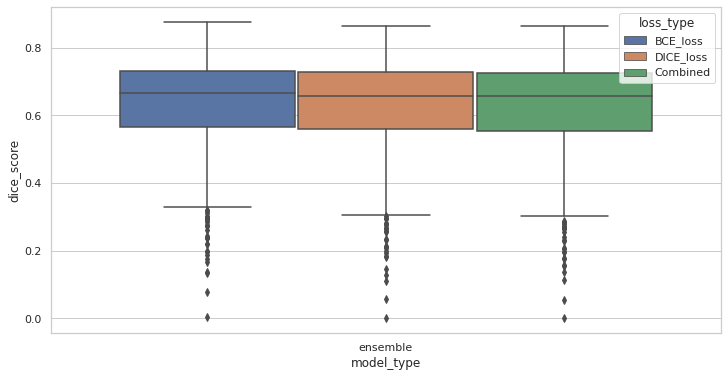

In [134]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.boxplot(x="model_type", y=f"{metric}_score", hue="loss_type", data=ensemble_df, ax=ax)
#ax = sns.swarmplot(x="model_type", y="DICE_score", data=data, hue="loss_type", color=".25")

In [107]:
# load ensemble preds
import re

# Models to Ensemble
models_to_ensemble = [
    # UNET DICE, VNET DICE, UNET BCE, VNET BCE, OBELISK DICE, OBELISK BCE, CONDSEG DICE, CONDSEG BCE
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18",
    "model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978137_Tue_Aug_03_2021_hr_04_min_08",
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18",
    "model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10",
#    "model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04",
#    "model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07",
     "model_CONDSEG_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097973_Wed_Aug_04_2021_hr_13_min_26",
     "model_CONDSEG_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1628097978_Wed_Aug_04_2021_hr_13_min_26"
]

def get_model_id(model_fn):
    """ model ids = time string """
    return re.search("(time_\d+)", model_fn).groups(0)[0]

ensemble_name = "_and_".join([get_model_id(model_fn) for model_fn in models_to_ensemble])
ensemble_src = f"{run_src}/model_ensemble/{ensemble_name}"

print(ensemble_name)

# Items as dict 
items  = all_test_lbl_items
itemsd = getd(items)

# create batches
bs        = 5
batches = [itemsd[i:min(i+bs, len(itemsd))] for i in range(0,len(itemsd),bs)]


# load preds
ensemble_all_majority_vote = []
ensemble_bce_majority_vote = []
ensemble_dice_majority_vote = []

start = time.time()
for i in range(len(batches)):
    with open(f"{ensemble_src}/dice_preds_batch_{i}_bs_{bs}.pkl", 'rb') as handle:
        ensemble_dice_majority_vote += pickle.load(handle)

    with open(f"{ensemble_src}/bce_preds_batch_{i}_bs_{bs}.pkl", 'rb') as handle:
        ensemble_bce_majority_vote += pickle.load(handle)

    with open(f"{ensemble_src}/all_preds_batch_{i}_bs_{bs}.pkl", 'rb') as handle:
        ensemble_all_majority_vote += pickle.load(handle)
        
elapsed = time.time() - start
print(f"Elapsed: {elapsed:0.2f} s")

time_1627971508_and_time_1627978137_and_time_1627971506_and_time_1627978233_and_time_1628097973_and_time_1628097978
Elapsed: 10.64 s


In [90]:
print(len(ensemble_all_majority_vote), len(ensemble_bce_majority_vote), len(ensemble_dice_majority_vote))

484 484 484


In [92]:
# get dice scores Elapsed: 1206.66 s
from fastai.basics import Pipeline

from helpers.general import torch2sitk, sitk2torch
from helpers.transforms_simplified import get_train_valid_transforms
from helpers.postprocess import eval_measure #eval_pred # takes pred and computes statistics df

# Labels (Transforms)

# for condseg
train_itemsd = getd(train_items) # for condseg atlas choice

val_tfm_dict = {}
for condseg_bool in (True, False):
    for full_res,pixdim in ((96,1.5),(144,1.0)):
        val_tfm_dict[f"full_res_{full_res}_pixdim_{pixdim}_do_condseg_{condseg_bool}"] = \
            get_train_valid_transforms(items=train_itemsd, pixdim=pixdim, full_res=full_res, do_condseg=condseg_bool)[1]

  
start = time.time()

val_tfms = val_tfm_dict["full_res_96_pixdim_1.5_do_condseg_False"]

# get dice scores
ensemble_bce_scores  = []
ensemble_dice_scores = []
ensemble_all_scores  = []

# 1sec per item => 10 min
for i,item in enumerate(itemsd):
    label = Pipeline(val_tfms)(item)[1].squeeze(0) # undo B axis
    label = torch2sitk(label.byte()) # both label and each vote are full_res size
    ensemble_bce_scores.append(eval_measure(label, torch2sitk(ensemble_bce_majority_vote[i].byte())))
    ensemble_dice_scores.append(eval_measure(label, torch2sitk(ensemble_dice_majority_vote[i].byte())))
    ensemble_all_scores.append(eval_measure(label, torch2sitk(ensemble_all_majority_vote[i].byte())))
    #ensemble_bce_scores += eval_pred(label, ensemble_bce_majority_vote[i])
    
elapsed = time.time() - start
print(f"Elapsed: {elapsed:0.2f} s")

Elapsed: 1206.66 s


In [7]:
os.listdir(data_src)

['saved_landmarks',
 'saved_models',
 'sample_other_dsets',
 'Labels',
 'saved_transformed_labels',
 'saved_dset_metadata',
 'saved_rigid_reg2',
 'saved_rigid_reg',
 'runs',
 'saved_preds',
 'PitMRdata']

# Convert

In [6]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [8]:
from helpers.time import get_time_id

In [13]:
import re
def get_month_date():
    s = get_time_id()
    return re.search("_(.*)_2021", s).groups(0)[0]

In [14]:
from nbconvert import HTMLExporter
import codecs
import nbformat

notebook_name = nb_name
output_file_name = notebook_name[:-6] + "_viz_stats_" + get_month_date() + '.html'

exporter = HTMLExporter()
output_notebook = nbformat.read(notebook_name, as_version=4)

output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(output_file_name, 'w', encoding='utf-8').write(output)

NameError: name 'nb_name' is not defined

In [8]:
os.path.isdir(f"{data_src}/saved_transformed_labels")

True

In [5]:
# import shutil 
# val_str = "full_res_96_pixdim_1.5_do_condseg_False"
# transformed_labels_src = f"{data_src}/saved_transformed_labels/{val_str}"

# Path(transformed_labels_src).mkdir(parents=True, exist_ok=True)

# source_dir = f"{data_src}/saved_transformed_labels"
# target_dir = f"{data_src}/saved_transformed_labels/{val_str}"
    
# file_names = [f for f in os.listdir(source_dir) if f.startswith("transformed_labels_batch_")]
    
# print(len(file_names))
# for file_name in file_names:
#     shutil.move(os.path.join(source_dir, file_name), target_dir)

In [14]:
from fastai.basics import Pipeline

from helpers.general import torch2sitk, sitk2torch
from helpers.transforms_simplified import get_train_valid_transforms

# Items as dict 
items  = all_test_lbl_items
itemsd = getd(items)

# create batches
bs        = 5
batches = [itemsd[i:min(i+bs, len(itemsd))] for i in range(0,len(itemsd),bs)]
  
# for condseg
train_itemsd = getd(train_items) # for condseg atlas choice


val_tfm_dict = {}
for condseg_bool in (True, False):
    for full_res,pixdim in ((96,1.5),(144,1.0)):
        val_tfm_dict[f"full_res_{full_res}_pixdim_{pixdim}_do_condseg_{condseg_bool}"] = \
            get_train_valid_transforms(items=train_itemsd, pixdim=pixdim, full_res=full_res, do_condseg=condseg_bool)[1]
  
print(val_tfm_dict)

{'full_res_96_pixdim_1.5_do_condseg_True': <monai.transforms.compose.Compose object at 0x7f85205620f0>, 'full_res_144_pixdim_1.0_do_condseg_True': <monai.transforms.compose.Compose object at 0x7f5f6a2218d0>, 'full_res_96_pixdim_1.5_do_condseg_False': <monai.transforms.compose.Compose object at 0x7f5f6a221c88>, 'full_res_144_pixdim_1.0_do_condseg_False': <monai.transforms.compose.Compose object at 0x7f5f5c9bf128>}


In [19]:
from fastai.basics import Pipeline

from helpers.general import torch2sitk, sitk2torch
from helpers.transforms_simplified import get_train_valid_transforms

#transformed_labels_src = f"{data_src}/saved_transformed_labels" +++ val_str

# Items as dict 
items  = all_test_lbl_items
itemsd = getd(items)

# create batches
bs        = 5
batches = [itemsd[i:min(i+bs, len(itemsd))] for i in range(0,len(itemsd),bs)]
  
# for condseg
train_itemsd = getd(train_items) # for condseg atlas choice

val_tfm_dict = {}
for condseg_bool in (True, False):
    for full_res,pixdim in ((96,1.5),(144,1.0)):
        val_tfm_dict[f"full_res_{full_res}_pixdim_{pixdim}_do_condseg_{condseg_bool}"] = \
            get_train_valid_transforms(items=train_itemsd, pixdim=pixdim, full_res=full_res, do_condseg=condseg_bool)[1]

#val_str = "full_res_144_pixdim_1.0_do_condseg_False"
#val_str = "full_res_96_pixdim_1.5_do_condseg_False"
#val_str = "full_res_96_pixdim_1.5_do_condseg_True"
val_str = "full_res_144_pixdim_1.0_do_condseg_True"
val_tfms = val_tfm_dict[val_str]

transformed_labels_src = f"{data_src}/saved_transformed_labels/{val_str}"
Path(transformed_labels_src).mkdir(parents=True, exist_ok=True)

for i,batch in enumerate(batches):
    labels = Pipeline(val_tfms)(batch)

    # save model outputs
    with open(f"{transformed_labels_src}/transformed_labels_batch_{i}_bs_{bs}.pkl", 'wb') as handle:
        pickle.dump(labels, handle)

In [94]:
ensemble_all_scores

[{'dice': 0.7706885009526753,
  'false_neg': 0.3098773402194964,
  'false_pos': 0.12744869402985073,
  'IoU': 0.6269269436997319,
  'hausdorff_dist': 4.123105625617661},
 {'dice': 0.15826158261582615,
  'false_neg': 0.8592781625956981,
  'false_pos': 0.8192037470725996,
  'IoU': 0.08593054318788958,
  'hausdorff_dist': 14.696938456699069},
 {'dice': 0.4457868458361586,
  'false_neg': 0.5755370348632468,
  'false_pos': 0.5306334371754933,
  'IoU': 0.2868247798841913,
  'hausdorff_dist': 11.045361017187261},
 {'dice': 0.27205332245120045,
  'false_neg': 0.7824904839586732,
  'false_pos': 0.6368917937545389,
  'IoU': 0.15744312367157365,
  'hausdorff_dist': 14.628738838327793},
 {'dice': 0.6353588667839581,
  'false_neg': 0.5126643598615916,
  'false_pos': 0.08746922379162887,
  'IoU': 0.4655867768595041,
  'hausdorff_dist': 10.954451150103322},
 {'dice': 0.7973330897798887,
  'false_neg': 0.33692845207352273,
  'false_pos': 0.00022904260192395785,
  'IoU': 0.6629708383961118,
  'hausdorf

In [95]:
len(ensemble_all_scores)

484

In [101]:
ensemble_all_df = pd.read_pickle(f"{ensemble_src}/ensemble_all_df.pkl")
ensemble_dice_df = pd.read_pickle(f"{ensemble_src}/ensemble_dice_df.pkl")
ensemble_bce_df = pd.read_pickle(f"{ensemble_src}/ensemble_bce_df.pkl")
# model_src = f"{run_src}/{model_name}"

In [99]:
ensemble_all_df  = pd.DataFrame(ensemble_all_scores)
ensemble_dice_df = pd.DataFrame(ensemble_dice_scores)
ensemble_bce_df  = pd.DataFrame(ensemble_bce_scores)

for df in (ensemble_all_df, ensemble_dice_df, ensemble_bce_df):
    df["image"] = [item["image"] for item in itemsd]
    df["label"] = [item["label"] for item in itemsd]

# # save
ensemble_all_df.to_pickle(f"{ensemble_src}/ensemble_all_df.pkl")
ensemble_dice_df.to_pickle(f"{ensemble_src}/ensemble_dice_df.pkl")
ensemble_bce_df.to_pickle(f"{ensemble_src}/ensemble_bce_df.pkl")
# model_src = f"{run_src}/{model_name}"
# pre_df.to_pickle(f"{model_src}/pre_lcc_df.pkl")
# post_df.to_pickle(f"{model_src}/post_lcc_df.pkl")

In [100]:
ensemble_all_df

dice  false_neg  false_pos       IoU  hausdorff_dist  \
0    0.770689   0.309877   0.127449  0.626927        4.123106   
1    0.158262   0.859278   0.819204  0.085931       14.696938   
2    0.445787   0.575537   0.530633  0.286825       11.045361   
3    0.272053   0.782490   0.636892  0.157443       14.628739   
4    0.635359   0.512664   0.087469  0.465587       10.954451   
5    0.797333   0.336928   0.000229  0.662971        5.099020   
6    0.486708   0.629971   0.289143  0.321622       14.696938   
7    0.665254   0.463573   0.124486  0.498412        7.874008   
8    0.753138   0.328027   0.143395  0.604027        8.306624   
9    0.490140   0.567980   0.433671  0.324626       11.090537   
10   0.302873   0.748844   0.618588  0.178462       14.352700   
11   0.341362   0.719517   0.564006  0.205808       14.560220   
12   0.197385   0.820768   0.780371  0.109499       13.000000   
13   0.762980   0.351294   0.073877  0.616789        8.306624   
14   0.730327   0.417648   0.020878  0.575209        8.544004   
15   0.831634   0.215366   0.115375  0.711793        4.123106   
16   0.538766   0.558106   0.309963  0.368706       12.206556   
17   0.734765   0.365670   0.127011  0.580734        7.615773   
18   0.480190   0.658212   0.193048  0.315954       15.264338   
19   0.778242   0.214839   0.228555  0.636986        4.123106   
20   0.467028   0.636519   0.346926  0.304656       14.899664   
21   0.512144   0.615676   0.232646  0.344216       14.798649   
22   0.717639   0.433542   0.021104  0.559623        7.874008   
23   0.726879   0.426898   0.006558  0.570942        6.480741   
24   0.546849   0.586162   0.194144  0.376319       14.177447   
25   0.660816   0.456116   0.158203  0.493446       11.180340   
26   0.230632   0.810896   0.704467  0.130347       16.278821   
27   0.623635   0.401570   0.348945  0.453102        8.306624   
28   0.631079   0.401942   0.332040  0.461005        8.124038   
29   0.725406   0.425495   0.016184  0.569127        6.403124   
30   0.503893   0.642723   0.145405  0.336803       16.031220   
31   0.731773   0.396915   0.069721  0.577005        7.874008   
32   0.650889   0.502191   0.060079  0.482457        9.433981   
33   0.318046   0.759266   0.531494  0.189093       15.099669   
34   0.648723   0.410537   0.278769  0.480082        7.071068   
35   0.434397   0.630731   0.472583  0.277463       13.190906   
36   0.320033   0.724072   0.619081  0.190499       15.165751   
37   0.282153   0.798420   0.529972  0.164248       17.720045   
38   0.763911   0.368863   0.032567  0.618007        6.708204   
39   0.367667   0.699791   0.525773  0.225240       15.329710   
40   0.637590   0.475547   0.187032  0.467987        8.944272   
41   0.385998   0.659975   0.553654  0.239156       11.575837   
42   0.338789   0.721249   0.568211  0.203941       15.264338   
43   0.402527   0.669891   0.484353  0.251978       11.180340   
44   0.592269   0.565424   0.070416  0.420726       14.282857   
45   0.472072   0.556609   0.495279  0.308963       12.165525   
46   0.802560   0.287726   0.080943  0.670230        6.324555   
47   0.660472   0.506753   0.000757  0.493063        7.348469   
48   0.730823   0.412748   0.032688  0.575825        8.124038   
49   0.440569   0.582050   0.534223  0.282519        7.874008   
50   0.378771   0.675002   0.546134  0.233632       15.427249   
51   0.277765   0.787424   0.599380  0.161282       16.031220   
52   0.705067   0.440320   0.047504  0.544482        8.660254   
53   0.379979   0.711423   0.443881  0.234552       14.866069   
54   0.414807   0.682863   0.400591  0.261676       13.379088   
55   0.498511   0.588795   0.367116  0.332011       12.206556   
56   0.376277   0.658769   0.580655  0.231737       14.177447   
57   0.734018   0.404804   0.042706  0.579801        7.071068   
58   0.479524   0.620287   0.349483  0.315377       14.035669   
59   0.386226   0.671346   0.531748  0.239331       13.490738   
60   0.728998   0.291339   0.249462  0.57356

In [53]:
 eval_measure(torch2sitk(label.byte()), torch2sitk(ensemble_bce_majority_vote[i].byte()))

{'dice': 0.7744326547189928,
 'false_neg': 0.296596882781518,
 'false_pos': 0.1385814321210752,
 'IoU': 0.6318972659486329,
 'hausdorff_dist': 4.242640687119285}

In [ ]:
# ensemble model



In [59]:
def rename2(fn):
    model_name2 = Path(fn).name
    model_type2 = get_param(model_name2, "model_", "_loss")

    if "loss_bs" in model_name:
        loss_type2  = get_param(model_name2, "loss_", "_bs")
    else:
        loss_type2  = get_param(model_name2, "loss_", "_full_res")

    full_res2   = get_param_default(model_name2, "full_res_", "_pixdim", 96)
    pixdim2     = get_param_default(model_name2, "pixdim_", "_do_simple", 1.5)
    do_simple2  = get_param_default(model_name2, "do_simple_", "_do_flip", False)
    do_flip2    = get_param_default(model_name2, "do_flip_", "_bs", True)
    
    if model_type2 != "OBELISKHYBRID": 
        return f"{model_type2}_{loss_type2}_{do_simple2}"
    else:
        return f"{model_type2}_{full_res2}_{loss_type2}_{do_simple2}"

In [20]:
info_df[info_df["date"]=="Aug_03"]

model       loss simple  res  dice_median    date  \
14  OBELISKHYBRID   BCE_loss  False   96     0.705151  Aug_03   
15  OBELISKHYBRID   BCE_loss   True   96     0.751874  Aug_03   
16  OBELISKHYBRID   BCE_loss   True   96     0.727850  Aug_03   
12  OBELISKHYBRID  DICE_loss  False   96     0.761874  Aug_03   
13  OBELISKHYBRID  DICE_loss   True   96     0.778801  Aug_03   
18  OBELISKHYBRID  DICE_loss   True   96     0.768885  Aug_03   
25         UNET3D   BCE_loss  False   96     0.758320  Aug_03   
26         UNET3D   BCE_loss   True   96     0.793643  Aug_03   
27         UNET3D   BCE_loss   True   96     0.789306  Aug_03   
28         UNET3D  DICE_loss   True   96     0.801602  Aug_03   
29         UNET3D  DICE_loss  False   96     0.751888  Aug_03   
30         UNET3D  DICE_loss   True   96     0.801770  Aug_03   
9           UNETR   BCE_loss   True   96     0.719779  Aug_03   
3           UNETR  DICE_loss   True   96     0.715899  Aug_03   
4           UNETR  DICE_loss  False   96     0.590909  Aug_03   
2            VNET   BCE_loss   True   96     0.783891  Aug_03   
1            VNET  DICE_loss  False   96     0.776276  Aug_03   
11           VNET  DICE_loss   True   96     0.795087  Aug_03   
32           VNET  DICE_loss   True   96     0.790150  Aug_03   

                                                                                                                                                    fn  
14   model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011517_Tue_Aug_03_2021_hr_13_min_25  
15    model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07  
16    model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14  
12  model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011517_Tue_Aug_03_2021_hr_13_min_25  
13   model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04  
18   model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14  
25          model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40  
26           model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18  
27           model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07  
28          model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07  
29         model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24  
30          model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18  
9            model_UNETR_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628028739_Tue_Aug_03_2021_hr_18_min_12  
3           model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_False_bs_2_epochs_60_time_1628008122_Tue_Aug_03_2021_hr_12_min_28  
4           model_UNETR_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628014748_Tue_Aug_03_2021_hr_14_min_19  
2              model_VNET_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978233_Tue_Aug_03_2021_hr_04_min_10  
1            model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time

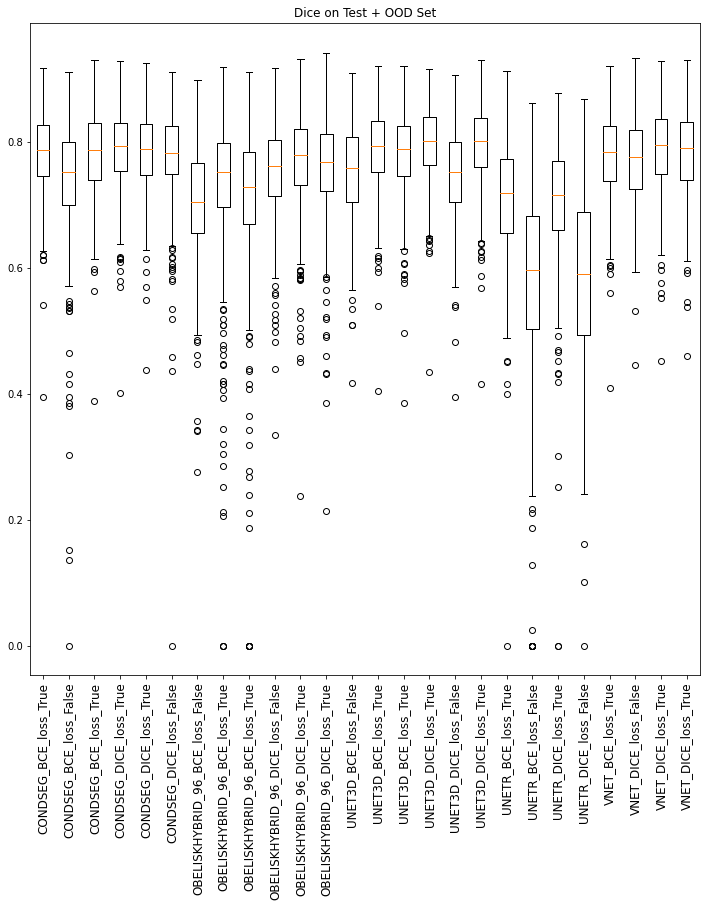

In [23]:
plot_keys =  info_df[info_df["date"].isin([f"Aug_0{x}" for x in range(3,10)])].fn.values
xtickNames = [rename2(fn) for fn in plot_keys]
data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
fig, ax = plt.subplots(figsize=(12,12))
ax.set_title('Dice on Test + OOD Set')
#ax.set_title('VNET: BCE (simple and all) vs DICE')
ax.boxplot(data)
ax.set_xticklabels(xtickNames, rotation=90, fontsize=12)

plt.show()

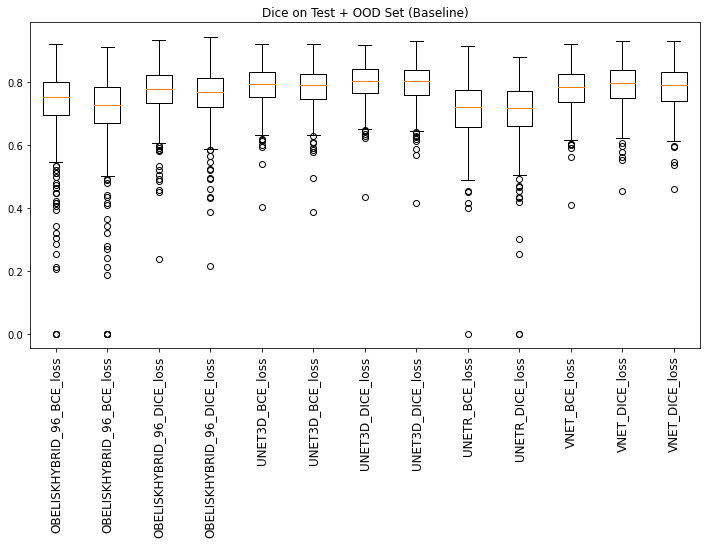

In [22]:
plot_keys =  info_df[info_df["date"]=="Aug_03"].fn.values
plot_keys = [key for key in plot_keys if "do_simple_True" in key]
xtickNames = [rename2(fn)[:-5] for fn in plot_keys]
data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
fig, ax = plt.subplots(figsize=(12,6))
ax.set_title('Dice on Test + OOD Set (Baseline)')
#ax.set_title('VNET: BCE (simple and all) vs DICE')
ax.boxplot(data)
ax.set_xticklabels(xtickNames, rotation=90, fontsize=12)

plt.show()

In [7]:
keys = sorted(list(post_df_dict.keys()))
print(*keys, sep="\n")

key = keys[0]
post_df = post_df_dict[key]

model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955068_Mon_Aug_02_2021_hr_21_min_44
model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955447_Mon_Aug_02_2021_hr_21_min_50
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628011517_Tue_Aug_03_2021_hr_13_min_25
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14
model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627954920_Mon_Aug_02_2021_hr_21_min_42
model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955472_Mon_Aug

In [6]:
unet3d_keys = [key for key in keys if "UNET3D" in key]
print(*unet3d_keys, sep="\n")

unet_plot_keys = [
    
    # BCE, simple and all
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40",
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07",
    
    # Dice, simple and all
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24",
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07"
]

# BCE, simple; BCE, all; BCE, simple (better) x2; Dice, all; Dice, simple x2;  

model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_flip_True_bs_1_epochs_60_time_1627944352_Mon_Aug_02_2021_hr_18_min_45
model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40
model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07
model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971506_Tue_Aug_03_2021_hr_02_min_18
model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24
model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07
model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627971508_Tue_Aug_03_2021_hr_02_min_18


model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14
model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_flip_True_bs_1_epochs_60_time_1627945286_Mon_Aug_02_2021_hr_19_min_01
model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04
model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964080_Tue_Aug_03_2021_hr_00_min_14


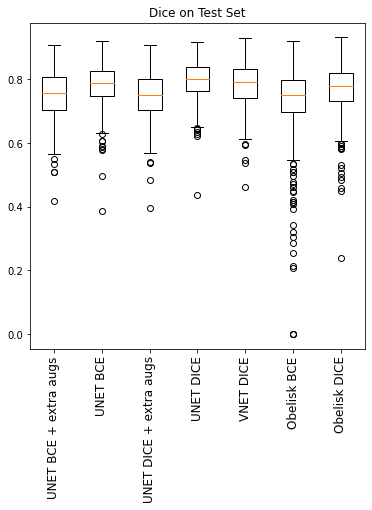

In [28]:
ob_keys = [key for key in keys if "OB" in key]
print(*ob_keys, sep="\n")

ob_plot_keys = [
    # BCE, simple
    "model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07",
    
    # DICE, simple
    "model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963440_Tue_Aug_03_2021_hr_00_min_04"
]

vnet_plot_keys = [
    # DICE, sime  
    "model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22",
    ]

unet_plot_keys = [
    
    # BCE, simple and all
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40",
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07",
    
    # Dice, simple and all
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24",
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07"
]

ob_xtickNames = ['Obelisk BCE', 'Obelisk DICE']
vnet_xtickNames = ['VNET DICE']
unet_xtickNames = ['UNET BCE + extra augs', 'UNET BCE', 'UNET DICE + extra augs', 'UNET DICE']


plot_keys = unet_plot_keys + vnet_plot_keys + ob_plot_keys
data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
fig, ax = plt.subplots(figsize=(6,6))
ax.set_title('Dice on Test Set')
#ax.set_title('VNET: BCE (simple and all) vs DICE')
ax.boxplot(data)

#xtickNames = ['BCE + extra augs', 'BCE', 'DICE + extra augs', 'DICE']
xtickNames = unet_xtickNames + vnet_xtickNames + ob_xtickNames
ax.set_xticklabels(xtickNames, rotation=90, fontsize=12)

plt.show()

model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22


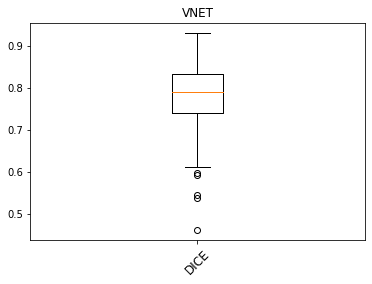

In [21]:
vnet_keys = [key for key in keys if "VNET" in key]
print(*vnet_keys, sep="\n")

vnet_plot_keys = [
    # DICE, sime  
    "model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22",
    ]

plot_keys = vnet_plot_keys

data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
fig, ax = plt.subplots()
ax.set_title('VNET')
#ax.set_title('VNET: BCE (simple and all) vs DICE')
ax.boxplot(data)

#xtickNames = ['BCE + extra augs', 'BCE', 'DICE + extra augs', 'DICE']
xtickNames = ['DICE']
ax.set_xticklabels(xtickNames, rotation=45, fontsize=12)

plt.show()
# BCE, simple; BCE, all; BCE, simple (better) x2; Dice, all; Dice, simple x2;  

In [7]:
test_idxs  = [idx for idx,i in enumerate(items) if "ABIDE" in i[0]] 
ppmi_idxs  = [idx for idx,i in enumerate(items) if dset_dict["PPMI"] in i[0]]
icmb_idxs  = [idx for idx,i in enumerate(items) if "ICMB" in i[1]]
adni_idxs  = [idx for idx,i in enumerate(items) if "ADNI1_full" in i[1]]
aibl_idxs  = [idx for idx,i in enumerate(items) if "AIBL" in i[1]]
abvib_idxs = [idx for idx,i in enumerate(items) if "ABVIB" in i[1]]

plot_keys = [
    
    # BCE, simple and all
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628008844_Tue_Aug_03_2021_hr_12_min_40",
    "model_UNET3D_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970860_Tue_Aug_03_2021_hr_02_min_07",
    
    # Dice, simple and all
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_False_do_flip_True_bs_2_epochs_60_time_1628007881_Tue_Aug_03_2021_hr_12_min_24",
    "model_UNET3D_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627970836_Tue_Aug_03_2021_hr_02_min_07"
]

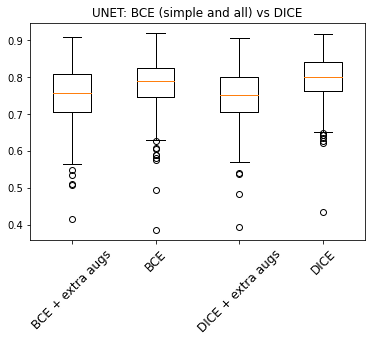

In [12]:
data = [[v for i,v in enumerate(post_df_dict[key]["dice"].values)] for key in plot_keys]
fig, ax = plt.subplots()
ax.set_title('UNET: BCE (simple and all) vs DICE')
ax.boxplot(data)

xtickNames = ['BCE + extra augs', 'BCE', 'DICE + extra augs', 'DICE']
ax.set_xticklabels(xtickNames, rotation=45, fontsize=12)

plt.show()

In [ ]:
np_indiv_dices = post_df["dice"].values

test_idxs  = [idx for idx,i in enumerate(items) if "ABIDE" in i[0]] 
ppmi_idxs  = [idx for idx,i in enumerate(items) if dset_dict["PPMI"] in i[0]]
icmb_idxs  = [idx for idx,i in enumerate(items) if "ICMB" in i[1]]
adni_idxs  = [idx for idx,i in enumerate(items) if "ADNI1_full" in i[1]]
aibl_idxs  = [idx for idx,i in enumerate(items) if "AIBL" in i[1]]
abvib_idxs = [idx for idx,i in enumerate(items) if "ABVIB" in i[1]]

# print(len(test_idxs))
# print(len(ppmi_idxs))
# print(len(icmb_idxs))
# print(len(adni_idxs))
# print(len(aibl_idxs))
# print(len(abvib_idxs))
# print(len(test_items), len(valid_items), len(train_items))

names = ["ABIDE", "PPMI", "ICMB", "ADNI", "AIBL", "ABVIB"]
idxs  = [test_idxs, ppmi_idxs, icmb_idxs, adni_idxs, aibl_idxs, abvib_idxs]

print_df = []

# overall dice
print_df.append({
    "dset":"Overall",
    "median_dice":np.median(np_indiv_dices),
    "mean_dice":np_indiv_dices.mean(),
    "std_dice":np_indiv_dices.std()
})

for name,name_idxs in zip(names, idxs):
    subset_idxs = np.array([np_indiv_dices[i] for i in name_idxs])
    print_df.append({"dset":name,"median_dice":np.median(subset_idxs),"mean_dice":subset_idxs.mean(),"std_dice":subset_idxs.std()})

print_df = pd.DataFrame(print_df)

In [88]:
from helpers.general import rm_prefix

# check
done = [str(model_fn) 
        for model_fn in model_fns 
        if os.path.isfile(f"{str(model_fn)}/post_lcc_df.pkl") and "Aug_03" in str(model_fn)
       ]
#print(*rm_prefix(done, prefix=run_src, do_sort=True), sep="\n")
print(f"DONE: {len(done)}")

for done_fn in done:
    model_name = Path(done_fn).name
    #print(model_name)
    model_src = f"{run_src}/{model_name}"
    check_post_df  = pd.read_pickle(f"{model_src}/post_lcc_df.pkl")
    check_pre_df   = pd.read_pickle(f"{model_src}/pre_lcc_df.pkl")
    check_stats_df = pd.read_pickle(f"{model_src}/stats_df.pkl")
    
    if len(check_post_df) != len(itemsd):
        print(done_fn)
        print("Len", len(check_post_df))
        print("*" * 50)
    #display(check_post_df)
    #display(check_pre_df)
    #display(check_stats_df)

DONE: 11


In [80]:
# from helpers.general import rm_prefix
# print(*rm_prefix(todo, prefix=run_src), sep="\n")
print(*rm_prefix(todo, prefix=run_src, do_sort=True), sep="\n")

model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955068_Mon_Aug_02_2021_hr_21_min_44
model_OBELISKHYBRID_loss_BCE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955447_Mon_Aug_02_2021_hr_21_min_50
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627963631_Tue_Aug_03_2021_hr_00_min_07
model_OBELISKHYBRID_loss_BCE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627964070_Tue_Aug_03_2021_hr_00_min_14
model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627954920_Mon_Aug_02_2021_hr_21_min_42
model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955472_Mon_Aug_02_2021_hr_21_min_51
model_OBELISKHYBRID_loss_DICE_loss_full_res_96_pixdim_1.5_do_flip_True_bs_1_epochs_60_time_1627945286_Mon_Aug_02_2021_hr_19_

In [50]:
#import shutil
#print(os.path.isfile(f"{model_fns[0]}/model.pth"))
#shutil.rmtree(model_fns[0])

In [51]:
# import shutil
# for i,fn in enumerate(model_fns):
#     if not os.path.isfile(f"{fn}/model.pth"):
#         print(i,fn)
#         shutil.rmtree(fn)

In [52]:
# # Choices

# if not do_task:
#     model_names = {
#         # pixdim 1.5, full_res 96
#         "unet_bce": "model_UNET3D_loss_BCE_loss_bs_1_epochs_60_time_1627647477_Fri_Jul_30_2021_hr_08_min_17",
#         "obelisk_bce": "model_OBELISKHYBRID_loss_BCE_loss_bs_1_epochs_60_time_1627823459_Sun_Aug_01_2021_hr_09_min_10",
#         "vnet_bce": "model_VNET_loss_BCE_loss_bs_1_epochs_60_time_1627823149_Sun_Aug_01_2021_hr_09_min_05",
#         "unetr_bce": "model_UNETR_loss_BCE_loss_bs_1_epochs_60_time_1627830873_Sun_Aug_01_2021_hr_11_min_14",

#         "obelisk_bce_144": "model_OBELISKHYBRID_loss_BCE_loss_bs_1_epochs_60_time_1627865816_Sun_Aug_01_2021_hr_20_min_56",
#         "obelisk_dice_144": "model_OBELISKHYBRID_loss_DICE_loss_bs_1_epochs_60_time_1627865811_Sun_Aug_01_2021_hr_20_min_56",
#     }

#     model_name = model_names["obelisk_dice_144"]
#     full_res = 144
#     pixdim   = 1.0
#     do_flip = True

#     full_res = tuple(full_res for _ in range(3))
#     pixdim   = tuple(pixdim   for _ in range(3))

#     print(f"Full res: {full_res}, Pixdim: {pixdim}")

In [53]:
# clear cache
import gc
from helpers.general import print_hardware_stats

gc.collect()

if not str(device)=="cpu":
    torch.cuda.empty_cache()
    print_hardware_stats()
    

In [10]:
# Transforms
from helpers.transforms_simplified import get_train_valid_transforms, monai_tfms2str

# for condseg
train_itemsd = getd(train_items) # for condseg atlas choice

val_tfm_dict = {}
for condseg_bool in (True, False):
    for full_res,pixdim in ((96,1.5),(144,1.0)):
        val_tfm_dict[f"full_res_{full_res}_pixdim_{pixdim}_do_condseg_{condseg_bool}"] = \
            get_train_valid_transforms(items=train_itemsd, pixdim=pixdim, full_res=full_res, do_condseg=condseg_bool)[1]

val_tfms = val_tfm_dict["full_res_96_pixdim_1.5_do_condseg_False"]
print(f"val tfms: ", *val_tfms.transforms, sep="\n")

val tfms: 
UndoDict(['image', 'label'])


In [54]:
from helpers.general            import get_param
from helpers.model_loss_choices import get_model, get_loss

model   = get_model(model_type, full_res)
loss_fn = get_loss(loss_type) 

# print
print("Model name: ", model_name)
print(f"Model type: {model_type}. Loss type: {loss_type}.")
# Dataloaders

# Fastai + distributed training
from fastai              import *
from fastai.torch_basics import *
from fastai.basics       import *
from fastai.distributed  import *

# time it - 18s for 484 items
start = time.time()

# tls, dls, cuda
bs  = 5
tls = TfmdLists(itemsd, val_tfms)
dls = tls.dataloaders(bs=bs, after_batch=[], num_workers=num_workers, drop_last=False)

if not str(device)=="cpu":
    dls = dls.cuda()

# end timer
elapsed = time.time() - start
print(f"Elapsed time: {elapsed:.2f} s for {len(itemsd)} items")

# Learner
import gc
gc.collect()
from helpers.losses import dice_score
learn = Learner(dls       = dls, 
                model     = model, 
                loss_func = loss_fn,
                metrics   = dice_score)

# load model fname w/o .pth extension
learn.load(f"{run_src}/{model_name}/model")

if not str(device)=="cpu":
    learn.model = learn.model.cuda()
else:
    learn.model = learn.model.to(device)
#learn.model.eval()

# all predictions, 67 items, 4 workers, 15sec
# Elapsed: 326.07 s for 484 items.
# start = time.time()

# predictions = []
# targets     = []
# val_batch_iter = iter(dls.train)
# for n in range(int(len(itemsd[:20]) / bs)):
#     xb,yb = next(val_batch_iter)
#     preds = learn.model(xb.cpu())
#     predictions.append(preds)
#     targets.append(yb.cpu())
#     break
    
# #predictions, targets = learn.get_preds(dl=dls.train)
# elapsed = time.time() - start

# print(f"Elapsed: {elapsed:0.2f} s for {len(itemsd)} items.")

val tfms: 
UndoDict(['image', 'label'])
Model name:  model_OBELISKHYBRID_loss_DICE_loss_full_res_144_pixdim_1.0_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627955472_Mon_Aug_02_2021_hr_21_min_51
Model type: OBELISKHYBRID. Loss type: DICE_loss.
Elapsed time: 1.86 s for 484 items


In [28]:
# i = 6
# data = dls.train_ds[i]
# #print(data[0].shape, data[1].shape)
# # print(mask2bbox(np.asarray(data[1].squeeze(0))))

# # with torch.no_grad():
# #     outputs = model(data[0].unsqueeze(1).to(device)).cpu()

# # #print(outputs.shape)
# # print(mask2bbox(np.asarray(outputs.argmax(1).squeeze(0))))

# # input = outputs.argmax(1)
# target = data[1].unsqueeze(1)

# # iflat = input.contiguous().view(-1)
# tflat = target.contiguous().view(-1)
# # intersection = (iflat * tflat).sum()
# # dice_val = ((2. * intersection) /
# #            (iflat.sum() + tflat.sum()))

# # print("Dice", dice_score(outputs, data[0].unsqueeze(1)), dice_val)
# # print("*"*50)

# print(tflat.min())

In [29]:
# i = 6
# print(dls.train_ds[i][1].shape)
# print(val_tfms(itemsd[i])[1].shape)
# print(dls.train_ds[i][1].min(), val_tfms(itemsd[i])[1].min())

# assert np.array_equal(np.asarray(dls.train_ds[i][1]), np.asarray(val_tfms(itemsd[i])[1]))

In [30]:
# from monai.transforms import Compose
# i = 6
# t = val_tfms(itemsd[i])
# #t = Compose(val_tfms.transforms[:8])(itemsd[i])["label"]
# print(t[1].min())

In [31]:
# from helpers.losses import dice_score

In [32]:
# # check
# from helpers.preprocess import mask2bbox
# for i in range(484):
#     data = dls.train_ds[i]
#     #print(data[0].shape, data[1].shape)
#     #print(mask2bbox(np.asarray(data[1].squeeze(0))))

#     with torch.no_grad():
#         outputs = model(data[0].unsqueeze(1).to(device)).cpu()

#     #print(outputs.shape)
#     #print(mask2bbox(np.asarray(outputs.argmax(1).squeeze(0))))
    
#     dice_val = dice_score(outputs, data[1].unsqueeze(1))
    
#     input_mr   = data[0].squeeze(0).cpu()
#     output_seg = outputs.argmax(1).squeeze(0).cpu().byte()
#     target_seg = data[1].squeeze(1).squeeze(0).cpu().byte()

#     f = sitk.LabelOverlapMeasuresImageFilter()
#     f.Execute(torch2sitk(target_seg), torch2sitk(output_seg))

#     dice_val2 = f.GetDiceCoefficient()
#     false_neg_val = f.GetFalseNegativeError() 
#     false_pos_val = f.GetFalsePositiveError()
    
#     if false_neg_val > 1.0 or false_pos_val > 1.0:
# #     if dice_val.item() < 0.20:
#         print("idx ", i)
#         print("Dice", dice_val, dice_val2)
#         print("False pos", false_pos_val, "False neg", false_neg_val)
#         print(mask2bbox(np.asarray(data[1].squeeze(0))))
#         print(mask2bbox(np.asarray(outputs.argmax(1).squeeze(0))))
#         print("*"*50)

In [33]:
# f = sitk.LabelOverlapMeasuresImageFilter()
# f.Execute(torch2sitk(output_seg), torch2sitk(target_seg))

# label all zeros => huge proportion of labelled negative are falsely labelled negative => but no false positives
# n. labelled negative/ n. ground truth negative

# # False Neg: proportion ground truth positives that are labelled neg = 100% = (# label neg / total # gt pos)
# # False Pos: proportion ground truth negs that are labelled pos = 0% (# label pos / total # gt neg)
# dice_val_opp = f.GetDiceCoefficient()
# false_neg_val_opp = f.GetFalseNegativeError() 
# false_pos_val_opp = f.GetFalsePositiveError()

# # false pos rate = #false pos/(#false pos + #true neg)
# print(dice_val_opp, false_neg_val_opp, false_pos_val_opp)

In [34]:
# i = 127
# data = dls.train_ds[i]
# with torch.no_grad():
#     outputs = model(data[0].unsqueeze(1).to(device)).cpu()

In [35]:
# input_mr   = data[0].squeeze(0).cpu()
# output_seg = outputs.argmax(1).squeeze(0).cpu().byte()
# target_seg = data[1].squeeze(1).squeeze(0).cpu().byte()

# f = sitk.LabelOverlapMeasuresImageFilter()
# f.Execute(torch2sitk(target_seg), torch2sitk(output_seg))

# dice_val = f.GetDiceCoefficient()
# false_neg_val = f.GetFalseNegativeError() 
# false_pos_val = f.GetFalsePositiveError()

In [36]:
# print(dice_val)
# print(false_neg_val)
# print(false_pos_val)

In [37]:
# input_mr   = data[0].squeeze(0).cpu()
# output_seg = outputs.argmax(1).squeeze(0).cpu()
# target_seg = data[1].squeeze(1).squeeze(0).cpu()

# input_mr = np.asarray(input_mr)
# output_seg = np.asarray(output_seg)
    
# # bbox 112-115

# # target (57, 87, 77, 108, 62, 83)
# # pred (112, 115, 66, 68, 41, 44)

# # for sag_idx in range(112,115):
# #     fig, axes = plt.subplots(1,3)

# #     axes[0].imshow(np.rot90(input_mr[sag_idx]), cmap=plt.cm.gray)
# #     axes[0].imshow(np.rot90(output_seg[sag_idx]), alpha=0.5)

# #     axes[1].imshow(np.rot90(output_seg[sag_idx]))
# #     plt.show()

# for sag_idx in range(60,61):
#     fig, axes = plt.subplots(1,3)

#     axes[0].imshow(np.rot90(input_mr[sag_idx]), cmap=plt.cm.gray)
    
#     axes[1].imshow(np.rot90(input_mr[sag_idx]), cmap=plt.cm.gray)
#     axes[1].imshow(np.rot90(target_seg[sag_idx]), alpha=0.5)

#     axes[2].imshow(np.rot90(target_seg[sag_idx]))
#     plt.show()

In [38]:
from helpers.losses import dice, dice_score

In [39]:
# i = 6
# data = dls.train_ds[i]
# #print(data[0].shape, data[1].shape)
# print(mask2bbox(np.asarray(data[1].squeeze(0))))

# with torch.no_grad():
#     outputs = model(data[0].unsqueeze(1).to(device)).cpu()

# #print(outputs.shape)
# print(mask2bbox(np.asarray(outputs.argmax(1).squeeze(0))))

# input = outputs.argmax(1)
# target = data[1].unsqueeze(1)

# iflat = input.contiguous().view(-1)
# tflat = target.contiguous().view(-1)
# intersection = (iflat * tflat).sum()
# dice_val = ((2. * intersection) /
#            (iflat.sum() + tflat.sum()))

# print("Dice", dice_score(outputs, data[1].unsqueeze(1)), dice_val)
# print("*"*50)

# Post-processing

1. Largest Connect Label

In [40]:
# source sitk 36_Microscopy_Colocalization_Distance_Analysis.html
def get_largest_connected_component(binary_seg):
    # tensor to sitk
    #binary_seg = sitk.GetImageFromArray(binary_seg)
    
    # connected components in sitkSeg
    labeled_seg = sitk.ConnectedComponent(binary_seg)

    # re-order labels according to size (at least 1_000 pixels = 10x10x10)
    labeled_seg = sitk.RelabelComponent(labeled_seg, minimumObjectSize=1000, sortByObjectSize=True)

    # return segm of largest label
    binary_seg = labeled_seg == 1
    
    return binary_seg
    # sitk to tensor
    #return torch.tensor(sitk.GetArrayFromImage(binary_seg))
    
# eval metrics
# evaluate
filters = [sitk.LabelOverlapMeasuresImageFilter(), sitk.HausdorffDistanceImageFilter()]
methods = [
    [
        sitk.LabelOverlapMeasuresImageFilter.GetDiceCoefficient, 
        sitk.LabelOverlapMeasuresImageFilter.GetFalseNegativeError, 
        sitk.LabelOverlapMeasuresImageFilter.GetFalsePositiveError
    ],
    [sitk.HausdorffDistanceImageFilter.GetHausdorffDistance]
]

names = [
    ["dice", "false_neg", "false_pos"],
    ["hausdorff_dist"]
]

# d{"dice": x, "Hausdorff": y, "false pos": z}
def eval_measure(ground_truth, after_registration, names_todo=None):
    if isinstance(names_todo, str): names_todo = [names_todo]
        
    d = {}
    for f,method_list, name_list in zip(filters, methods, names):
        for m,n in zip(method_list, name_list):
            if not names_todo or n in names_todo:
                try:
                    #f.Execute(ground_truth, after_registration)
                    f.Execute(after_registration, ground_truth)
                    val = m(f)
                    
                except Exception as e:
                    print(e)
                    val = np.NaN
                d[n] = val
    return d

def torch2sitk(t): return sitk.GetImageFromArray(torch.transpose(t, 0, 2))
def sitk2torch(o): return torch.transpose(torch.tensor(sitk.GetArrayFromImage(o)), 0, 2)

# both pre and post lcc
def eval_measure2(label, pred, names_todo=None):
    label = torch2sitk(label.squeeze(0).byte())
    pred  = torch2sitk(pred.argmax(0).byte())
    pred_lcc = get_largest_connected_component(pred)
    return eval_measure(label, pred, names_todo), eval_measure(label, pred_lcc, names_todo)

In [42]:
# set model to evaluate model
learn.model.eval()

# device = torch.device("cuda:0")

# pre & post LCC
pre_df  = []
post_df = []

start = time.time()

# deactivate autograd engine and reduce memory usage and speed up computations
for data in dls.train:
#     start_small = time.time()

    # print("in loop")
    
    inputs = [i.to(device) for i in data[:-1]]
    labels = data[-1].cpu()

    # print("before no grad")
    with torch.no_grad():
        outputs = model(*inputs).cpu()
        
    # print("after no grad")
    # calculate metrics pre-LCC and post-LCC
    pre_metrics, post_metrics = zip(*[eval_measure2(labels[i], outputs[i])
                                      for i in range(len(labels))
                                     ])
    pre_df  += pre_metrics
    post_df += post_metrics
    
    # clean up memory
    del inputs
    del labels
    del outputs
    
    gc.collect()
    
    if str(device) != "cpu":
        torch.cuda.empty_cache()
        gc.collect()
        torch.cuda.empty_cache()
    # print_hardware_stats()

#     elapsed_small = time.time() - start_small
#     print(f"Elapsed: {elapsed_small:0.2f} s")

    # break

elapsed = time.time() - start
print(f"Elapsed: {elapsed:0.2f} s for {len(itemsd)} items.")
# y_true = y_true.cpu().numpy()  
# _, y_pred = torch.max(all_outputs, 1)
# y_pred = y_pred.cpu().numpy()
# y_pred_prob = F.softmax(all_outputs, dim=1).cpu().numpy()

Exception thrown in SimpleITK HausdorffDistanceImageFilter_Execute: /tmp/SimpleITK-build/ITK-prefix/include/ITK-5.2/itkDirectedHausdorffDistanceImageFilter.hxx:145:
ITK ERROR: pixelcount is equal to 0


KeyboardInterrupt: 

In [ ]:
# for df in (pre_df, post_df):
#     # non-intersecting
#     for col in ("false_neg",):
#         df.loc[df[col]>1.0, col] = 1.0

In [ ]:
# for df in (pre_df, post_df):
#     for col in ("dice", "false_neg", "false_pos", "hausdorff_dist"):
#         df.loc[df[col]=='-99', col] = np.NaN

In [ ]:
pre_df  = pd.DataFrame(pre_df)
post_df = pd.DataFrame(post_df)

# save
model_src = f"{run_src}/{model_name}"
pre_df.to_pickle(f"{model_src}/pre_lcc_df.pkl")
post_df.to_pickle(f"{model_src}/post_lcc_df.pkl")

for name_lst in names:
    for name in name_lst:
        pre_mean  = pre_df[name].mean()
        post_mean = post_df[name].mean()
        delta = post_mean - pre_mean
        print(f"{name}: diff = {delta:0.4f} ({pre_mean: 0.4f} ==> {post_mean:0.4f})")

In [32]:
# diff_dff = post_df - pre_df
# display(diff_dff[diff_dff["hausdorff_dist"].isna()])

In [33]:
# pd.set_option('display.max_rows', 230)
# display(diff_dff[diff_dff["false_pos"] < 0].sort_values(by=['dice'], ascending=False))

In [34]:
# diff_dff[diff_dff["dice"]!=0.0]["dice"].hist()

In [ ]:
# col = "false_pos"
# diff_dff[diff_dff[col]!=0.0][col].hist()

In [ ]:
# col = "false_neg"
# diff_dff[diff_dff[col]!=0.0][col].hist(), diff_dff[diff_dff[col]!=0.0][col].mean()

(<AxesSubplot:>, 0.7846837995383205)

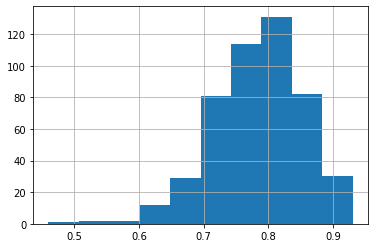

In [35]:
post_df["dice"].hist(), post_df["dice"].mean()

In [36]:
model_name

'model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22'

In [37]:
np_indiv_dices = post_df["dice"].values

test_idxs  = [idx for idx,i in enumerate(items) if "ABIDE" in i[0]] 
ppmi_idxs  = [idx for idx,i in enumerate(items) if dset_dict["PPMI"] in i[0]]
icmb_idxs  = [idx for idx,i in enumerate(items) if "ICMB" in i[1]]
adni_idxs  = [idx for idx,i in enumerate(items) if "ADNI1_full" in i[1]]
aibl_idxs  = [idx for idx,i in enumerate(items) if "AIBL" in i[1]]
abvib_idxs = [idx for idx,i in enumerate(items) if "ABVIB" in i[1]]

# print(len(test_idxs))
# print(len(ppmi_idxs))
# print(len(icmb_idxs))
# print(len(adni_idxs))
# print(len(aibl_idxs))
# print(len(abvib_idxs))
# print(len(test_items), len(valid_items), len(train_items))

names = ["ABIDE", "PPMI", "ICMB", "ADNI", "AIBL", "ABVIB"]
idxs  = [test_idxs, ppmi_idxs, icmb_idxs, adni_idxs, aibl_idxs, abvib_idxs]

print_df = []

# overall dice
print_df.append({
    "dset":"Overall",
    "median_dice":np.median(np_indiv_dices),
    "mean_dice":np_indiv_dices.mean(),
    "std_dice":np_indiv_dices.std()
})

for name,name_idxs in zip(names, idxs):
    subset_idxs = np.array([np_indiv_dices[i] for i in name_idxs])
    print_df.append({"dset":name,"median_dice":np.median(subset_idxs),"mean_dice":subset_idxs.mean(),"std_dice":subset_idxs.std()})

print_df = pd.DataFrame(print_df)

# save
print_df.to_pickle(f"{model_src}/stats_df.pkl")

print_df = print_df.style.set_caption(f"{model_name}")
display(print_df)

In [38]:
print(model_name)

model_VNET_loss_DICE_loss_full_res_96_pixdim_1.5_do_simple_True_do_flip_True_bs_2_epochs_60_time_1627978943_Tue_Aug_03_2021_hr_04_min_22


In [40]:
# # check
# check_post_df  = pd.read_pickle(f"{model_src}/post_lcc_df.pkl")
# check_pre_df   = pd.read_pickle(f"{model_src}/pre_lcc_df.pkl")
# check_stats_df = pd.read_pickle(f"{model_src}/stats_df.pkl")
# display(check_post_df)
# display(check_pre_df)
# display(check_stats_df)

dice  false_neg  false_pos  hausdorff_dist
0    0.785099   0.206190   0.223423        4.000000
1    0.769434   0.028537   0.363032        5.000000
2    0.764499   0.244717   0.226057        5.196152
3    0.847752   0.218248   0.074077        4.123106
4    0.743173   0.050343   0.389556        5.830952
..        ...        ...        ...             ...
479  0.813515   0.112400   0.249156        3.316625
480  0.746359   0.112157   0.356230        5.000000
481  0.787007   0.168078   0.253307        4.472136
482  0.741431   0.293437   0.220081        6.708204
483  0.795882   0.294799   0.086675        4.358899

[484 rows x 4 columns]

dice  false_neg  false_pos  hausdorff_dist
0    0.785099   0.206190   0.223423        4.000000
1    0.769434   0.028537   0.363032        5.000000
2    0.764499   0.244717   0.226057        5.196152
3    0.847752   0.218248   0.074077        4.123106
4    0.743173   0.050343   0.389556        5.830952
..        ...        ...        ...             ...
479  0.813515   0.112400   0.249156        3.316625
480  0.746359   0.112157   0.356230        5.000000
481  0.769915   0.168078   0.283489       17.000000
482  0.741431   0.293437   0.220081        6.708204
483  0.795882   0.294799   0.086675        4.358899

[484 rows x 4 columns]

dset  median_dice  mean_dice  std_dice
0  Overall     0.790150   0.784684  0.068106
1    ABIDE     0.779982   0.784664  0.066853
2     PPMI     0.794584   0.796741  0.066593
3     ICMB     0.786057   0.776571  0.063204
4     ADNI     0.794392   0.786449  0.067568
5     AIBL     0.791552   0.777907  0.080166
6    ABVIB     0.787818   0.781662  0.058581

In [ ]:
# targets     = torch.cat(y_true, dim=0)
# predictions = torch.cat(outputs, dim=0)

In [ ]:
# start = time.time()

# predictions = []
# targets     = []
# val_batch_iter = iter(dls.train)
# for n in range(int(len(itemsd) / bs)):
#     xb,yb = next(val_batch_iter)
#     preds = learn.model(xb.cpu())
#     predictions.append(preds)
#     targets.append(yb.cpu())
#     print("next", n)
    
#     del xb
#     del yb
#     del preds
    
# #predictions, targets = learn.get_preds(dl=dls.train)
# elapsed = time.time() - start

# print(f"Elapsed: {elapsed:0.2f} s for {len(itemsd)} items.")

In [ ]:
# # 30 sec for 67 test items (2 CPU workers)
# do_validate = False # True # False # True
# if do_validate:
#     start = time.time()
#     print(learn.validate(ds_idx=0))
#     elapsed = time.time() - start
#     print(f"Elapsed: {elapsed:0.2f} s for {(len(itemsd))} items.")
    
# print("Pred mask", predictions.shape, "Target (x = y = MR)", targets.shape)
# print("Pred mask", predictions[0].shape, "Target", targets[0].shape)

# do_masks = False # True # False # True
# if do_masks:
#     from helpers.preprocess import batch_get_bbox

#     # Elapsed 65.148959 s
#     start = time.time()

#     # get masks and probs
#     pred_masks = torch.argmax(predictions, dim=1).byte()
#     pred_bboxs = batch_get_bbox(pred_masks)
#     gt_bboxs   = batch_get_bbox(targets)
#     #pred_probs = np.asarray(predictions.softmax(1)[:,1].cpu())

#     elapsed = time.time() - start
#     print(f"Elapsed {elapsed:2f} s")

# Test set: Prediction Dice Distribution

In [ ]:
# from monai.losses import DiceLoss

# dice_loss = DiceLoss(
#     include_background=False, 
#     to_onehot_y=False, 
#     sigmoid=False, 
#     softmax=False, 
#     other_act=None, 
#     squared_pred=False, 
#     jaccard=False, 
#     reduction="none", 
#     smooth_nr=0, #1e-05, 
#     smooth_dr=0, #1e-05, 
#     batch=False)

# # dice_loss_soft = DiceLoss(
# #     include_background=False, 
# #     to_onehot_y=False, 
# #     sigmoid=True, 
# #     softmax=False, 
# #     other_act=None, 
# #     squared_pred=False, 
# #     jaccard=False, 
# #     reduction="none", 
# #     smooth_nr=0, #1e-05, 
# #     smooth_dr=0, #1e-05, 
# #     batch=False)

# start = time.time()

# indiv_dices = dice_loss(predictions.argmax(1).unsqueeze(1), targets)
# #indiv_dices = dice_loss_soft(predictions[:,1].unsqueeze(1), targets)
# indiv_dices = [1-dice_loss for dice_loss in indiv_dices]
# elapsed = time.time() - start

# print(f"Elapsed: {elapsed:0.2f} s for {len(targets)} items.")

In [ ]:
# start = time.time()

# # sort dices from low to high
# #sorted_dice_idxs  = sorted(range(len(indiv_dices)), key=lambda i:indiv_dices[i].item()) 
# np_indiv_dices = np.array([indiv_dices[i].item() for i in range(len(indiv_dices))])

# # plot
# fig1, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
# ax0.hist(np_indiv_dices, bins="auto")
# ax1.boxplot(np_indiv_dices)

# fig1.suptitle("Dice Score (ABIDE test set + Cross label items)")
# plt.show()

# # time
# elapsed = time.time() - start
# print(f"Elapsed: {elapsed:0.2f} s for {len(targets)} items.")

# test_idxs  = [idx for idx,i in enumerate(items) if "ABIDE" in i[0]] 
# ppmi_idxs  = [idx for idx,i in enumerate(items) if dset_dict["PPMI"] in i[0]]
# icmb_idxs  = [idx for idx,i in enumerate(items) if "ICMB" in i[1]]
# adni_idxs  = [idx for idx,i in enumerate(items) if "ADNI1_full" in i[1]]
# aibl_idxs  = [idx for idx,i in enumerate(items) if "AIBL" in i[1]]
# abvib_idxs = [idx for idx,i in enumerate(items) if "ABVIB" in i[1]]

# # print(len(test_idxs))
# # print(len(ppmi_idxs))
# # print(len(icmb_idxs))
# # print(len(adni_idxs))
# # print(len(aibl_idxs))
# # print(len(abvib_idxs))
# # print(len(test_items), len(valid_items), len(train_items))

# names = ["ABIDE", "PPMI", "ICMB", "ADNI", "AIBL", "ABVIB"]
# idxs  = [test_idxs, ppmi_idxs, icmb_idxs, adni_idxs, aibl_idxs, abvib_idxs]

# df = []

# # overall dice
# df.append({
#     "dset":"overall",
#     "median_dice":np.median(np_indiv_dices),
#     "mean_dice":np_indiv_dices.mean(),
#     "std_dice":np_indiv_dices.std()
# })

# for name,name_idxs in zip(names, idxs):
#     subset_idxs = np.array([indiv_dices[i].item() for i in name_idxs])
#     df.append({"dset":name,"median_dice":np.median(subset_idxs),"mean_dice":subset_idxs.mean(),"std_dice":subset_idxs.std()})

# import pandas as pd
# df = pd.DataFrame(df)

# model_src = f"{run_src}/{model_name}"
# df.to_pickle(f"{model_src}/test_dices.pkl")

# torch.save(predictions, f"{model_src}/test_preds.pt")
# torch.save(targets, f"{model_src}/test_targs.pt")
# torch.save(indiv_dices, f"{model_src}/test_dices.pt")

In [ ]:
# df

In [ ]:
# ax = df.plot.bar(x="dset",rot=0)

In [ ]:
# names = ["ABIDE", "PPMI", "ICMB", "ADNI", "AIBL", "ABVIB"]
# idxs  = [test_idxs, ppmi_idxs, icmb_idxs, adni_idxs, aibl_idxs, abvib_idxs]

# for name,name_idxs in zip(names, idxs):
#     subset_idxs = np.array([indiv_dices[i].item() for i in name_idxs])
#     print(name, ": ", "Median dice: ", np.median(subset_idxs), "Mean",subset_idxs.mean(), "+- std", subset_idxs.std())

In [ ]:
# np.median([1,2,3,4,5])

# Shape of Largest connected component

In [ ]:
# lccs = [sitk2torch(get_largest_connected_component(torch2sitk(x.byte()))) for x in pred_masks]

In [ ]:
# len(lccs), lccs[0].shape

In [ ]:
# lccs_all = torch.stack(lccs, dim=0)
# print(lccs_all.shape)

In [ ]:
# lccs_all.shape

In [ ]:
# lccs_all[:20].unsqueeze(1).shape

In [ ]:
# from helpers.isoperim import get_iso_ratio

In [ ]:
# start = time.time()
# pred_ratios = get_iso_ratio(predictions)
# elapsed = time.time() - start
# print(f"Elapsed: {elapsed:0.2f} s.")

In [ ]:
# start = time.time()
# lcc_ratios = get_iso_ratio(lccs_all.unsqueeze(1))
# elapsed = time.time() - start
# print(f"Elapsed: {elapsed:0.2f} s.")

In [ ]:
# targets.shape

In [ ]:
# start = time.time()
# target_ratios = get_iso_ratio(targets)
# elapsed = time.time() - start
# print(f"Elapsed: {elapsed:0.2f} s.")

In [ ]:
# fig, axes = plt.subplots(3,2, figsize=(12,12))
# axes[0,0].hist(np.asarray(target_ratios))
# axes[0,0].set_title("Target Isoperimetric ratio")
# axes[0,1].boxplot(np.asarray(target_ratios))

# axes[1,0].hist(np.asarray(ratios))
# axes[1,0].set_title("Largest Connected Component Isoperimetric ratio")
# axes[1,1].boxplot(np.asarray(ratios))

# diff = ratios - target_ratios
# axes[2,0].hist(np.asarray(diff))
# axes[2,0].set_title("Difference in Isoperimetric ratio")
# axes[2,1].boxplot(np.asarray(diff))

In [ ]:
# ratios

In [ ]:
# prediction_ratios = get_isoperimetric_ratio(*get_vol_sa(get_largest_connected_component()

In [ ]:
# target_ratios     = get_isoperimetric_ratio(*get_vol_sa(targets))
# prediction_ratios = get_isoperimetric_ratio(*get_vol_sa(predictions))

# _, axes = plt.subplots(1,2)
# axes[0].hist(np.asarray(target_ratios))
# axes[1].hist(np.asarray(prediction_ratios))
# axes[0].set_title("Target Isometric Ratio")
# axes[1].set_title("Pred Isometric Ratio")

# Convert

In [46]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [47]:
from nbconvert import HTMLExporter
import codecs
import nbformat

notebook_name = nb_name
output_file_name = notebook_name[:-6] + "_viz_table" + '.html'

exporter = HTMLExporter()
output_notebook = nbformat.read(notebook_name, as_version=4)

output, resources = exporter.from_notebook_node(output_notebook)
codecs.open(output_file_name, 'w', encoding='utf-8').write(output)

# Isoperimetric ratios

# Probs

In [ ]:
# probs = predictions.softmax(1)[:,1]
# print(f"Probs", probs.shape)

In [ ]:
# from matplotlib import colors

# prob_cmap  = "GnBu" #"hot" https://matplotlib.org/stable/tutorials/colors/colormaps.html 
# bin_cmap1  = colors.ListedColormap(['white', 'yellow'])
# bin_cmap2  = colors.ListedColormap(['white', 'red'])

# for idx in sorted_dice_idxs[:10]:

#     print(f"Worst idx: {idx}. mr: {items[idx][0][len(data_src)+1:]}")
    
#     gt_bbox   = gt_bboxs[idx]
#     pred_bbox = pred_bboxs[idx]
    
#     gt_map    = targets[idx].squeeze()
#     prob_map  = probs[idx]
#     pred_mask = pred_masks[idx]

#     # max difference
#     d = torch.abs(gt_map-prob_map)

#     # along axis 0,1,2
#     a0 = torch.sum(torch.sum(d, dim=2), dim=1)
#     a1 = torch.sum(torch.sum(d, dim=2), dim=0)
#     a2 = torch.sum(torch.sum(d, dim=1), dim=0)
#     a0max, a0_idx = torch.max(a0), torch.argmax(a0)
#     a1max, a1_idx = torch.max(a1), torch.argmax(a1)
#     a2max, a2_idx = torch.max(a2), torch.argmax(a2)
    
#     # plot
#     fig, axes = plt.subplots(3,4, figsize=(12,12))
#     for i in range(3):
#         max_diff_idx = [a0_idx, a1_idx, a2_idx][i]
        
#         gt_slice, prob_slice, pred_slice = [np.take(np.asarray(m), max_diff_idx, axis=i) for m in (gt_map, prob_map, pred_mask)]
        
#         axes[i,0].imshow(gt_slice,   cmap=bin_cmap1)
#         axes[i,0].imshow(pred_slice, cmap=bin_cmap2, alpha=0.5)
#         axes[i,1].imshow(gt_slice,   cmap=bin_cmap1)
#         im  = axes[i,2].imshow(prob_slice, cmap=prob_cmap, interpolation='nearest')  
#         im2 = axes[i,3].imshow(np.log(prob_slice), cmap=prob_cmap, interpolation='nearest')  

#         axes[i,0].set_title(f"Slice {max_diff_idx} (Axis {i})")
#         axes[i,1].set_title(f"GT map")
#         axes[i,2].set_title(f"Prob map")
#         axes[i,3].set_title(f"Log Prob map")
        
#         # colorbar
#         fig.colorbar(im,  ax=axes[i,2])
#         fig.colorbar(im2, ax=axes[i,3])

#     plt.show()

# Viz worst

In [ ]:
# import SimpleITK as sitk
# from helpers.viz import viz_axis, viz_compare_inputs, viz_compare_outputs

In [ ]:
# from helpers.general import round_tuple

In [ ]:
# worst_idx = low_dice_idxs[0]
# best_idx  = sorted_dice_idxs[-1]
# print("Worst. Idx = ", worst_idx, "Dice: ", indiv_dices[worst_idx], items[worst_idx][0]); print()
# print("Best. Idx = ", best_idx, "Dice: ",   indiv_dices[best_idx], items[best_idx][0])

# # get dirs
# worst_fn = items[worst_idx][0]
# best_fn  = items[best_idx][0]

# print(f"Worst fname: {worst_fn[len(data_src):]}"); print()
# print(f"best fname: {best_fn[len(data_src):]}")

# for fn in (worst_fn, best_fn):
#     # get stated direction
#     sitk_obj = sitk.ReadImage(fn, sitk.sitkFloat32)
#     sitk_dir = sitk_obj.GetDirection()

#     # get stated orientation
#     orient = sitk.DICOMOrientImageFilter()
#     sitk_ori = orient.GetOrientationFromDirectionCosines(sitk_dir)
    
#     # print
#     print(f"Dir {round_tuple(sitk_dir)}, Ori {sitk_ori}")

# def get_input(idx):
#     mr1,mk1 = tls[idx]
#     return mr1.squeeze(), mk1.squeeze()

# input1 = get_input(worst_idx)
# input2 = get_input(best_idx)
    
# for axis in range(3):
#     viz_compare_inputs(input1, input2, axis=axis)

In [ ]:
# from helpers.viz import get_mid_range

In [ ]:
# from matplotlib import colors
# bin_cmap2  = colors.ListedColormap(['white', 'yellow'])

In [ ]:
# # intensity

# worst_idxs = sorted_dice_idxs[:5]
# best_idxs  = sorted_dice_idxs[-5:]

# _, axes = plt.subplots(10,3, figsize=(6,12))

# for i in range(5):
#     w_idx = worst_idxs[i]
#     b_idx = best_idxs[i]
    
#     input1 = get_input(w_idx)
#     input2 = get_input(b_idx)

#     bbox1 = gt_bboxs[w_idx]
#     bbox2 = gt_bboxs[b_idx]
    
#     # plot
#     for axis in range(3):
#         start_idx1, end_idx1 = get_mid_range(bbox1, axis, nslices=1)
#         start_idx2, end_idx2 = get_mid_range(bbox2, axis, nslices=1)
        
#         # WORST: mid-slice in axis
#         axes[2*i, axis].imshow(np.take(np.rot90(input1[0]), start_idx1, axis=axis)) #, cmap=plt.cm.gray)
#         #axes[2*i, axis].imshow(np.take(np.rot90(input1[1]), start_idx1, axis=axis), cmap=bin_cmap2, alpha=0.5)
        
#         # BEST: mid-slice in axis
#         axes[2*i+1, axis].imshow(np.take(np.rot90(input2[0]), start_idx2, axis=axis)) #, cmap=plt.cm.gray)
#         #axes[2*i+1, axis].imshow(np.take(np.rot90(input2[1]), start_idx2, axis=axis), cmap=bin_cmap2, alpha=0.5)

# plt.show()

In [ ]:
# # intensity hist

# worst_idxs = sorted_dice_idxs[:5]
# best_idxs  = sorted_dice_idxs[-5:]

# #fig = plt.figure(constrained_layout=True)

# fig, axes = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True)
# fig.suptitle('MR Intensity Histogram')

# axes[0,0].set_yscale('log')
# axes[0,2].set_title("Worst")
# axes[1,2].set_title("Best")
# # subfigs = fig.subfigures(nrows=2, ncols=1)
# # subfigs[0].suptitle(f'Worst');
# # subfigs[1].suptitle(f'Best')

# # axs = []
# # for subfig in subfigs:
# #     # create 1x3 subplots per subfig
# #     axs.append(subfig.subplots(nrows=1, ncols=5))
# # axs = np.asarray(axs)    
# # #, axes = plt.subplots(2,5, figsize=(6,12))

# for i in range(5):
#     w_idx = worst_idxs[i]
#     b_idx = best_idxs[i]
    
#     input1 = get_input(w_idx)
#     input2 = get_input(b_idx)

#     mr1, mk1 = input1
#     mr2, mk2 = input2
    
#     mr1, mk1 = np.asarray(mr1), np.asarray(mk1)
#     mr2, mk2 = np.asarray(mr2), np.asarray(mk2)
    
#     # plot
    
#     axes[0,i].hist(mr1[mr1>0].reshape(-1,))
#     axes[1,i].hist(mr2[mr2>0].reshape(-1,))
    
# plt.show()

# Viz all worst

In [ ]:
# #for n_worst in range(len(low_dice_idxs)):
# for n_worst in range(len(low_dice_idxs)):
#     idx = low_dice_idxs[n_worst]

#     mr, mk       = get_input(idx)
#     pred, target = predictions[idx], targets[idx].squeeze()

#     dice = dice_score(pred.unsqueeze(0), target.unsqueeze(0).unsqueeze(0))
    
#     print(f"Worst #{n_worst}. Dice {dice:.3f}")
#     print(f"fn: {items[idx][0][len(data_src)+1:]}")
#     print(f"*"*100)
    
#     print("GT bbox and Pred bbox: ", gt_bboxs[idx], pred_bboxs[idx])

#     viz_compare_outputs(mr, target, pred)

# End

In [ ]:
print("Done")